In [2]:
%load_ext autoreload
%autoreload 2

### General imports
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.offsetbox import AnchoredText
from matplotlib.patches import Patch
import copy
import matplotlib
import pandas as pd
pd.options.mode.chained_assignment = None
from glob import glob
import os

### To rotate into stream coordinates
import astropy.units as u
from gala.coordinates import GD1Koposov10
from astropy.coordinates import SkyCoord

### Analysis tools
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from scipy.spatial import distance_matrix

### Specific functions
import sys
sys.path.append('../python')
from functions import *

### Define save folder
save_folder = "../plots"
if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

        Use @ instead. [gala.coordinates.sgr]
        Use @ instead. [gala.coordinates.orphan]
        Use @ instead. [gala.coordinates.magellanic_stream]


# Figure 1: Example Gaia patch

First, load the DataFrame with information from one circular patch of Gaia DR2: 

In [3]:
df_fullpatch = pd.read_hdf("../gaia_data/gd1_1_patch.h5")

Then, make the plot:

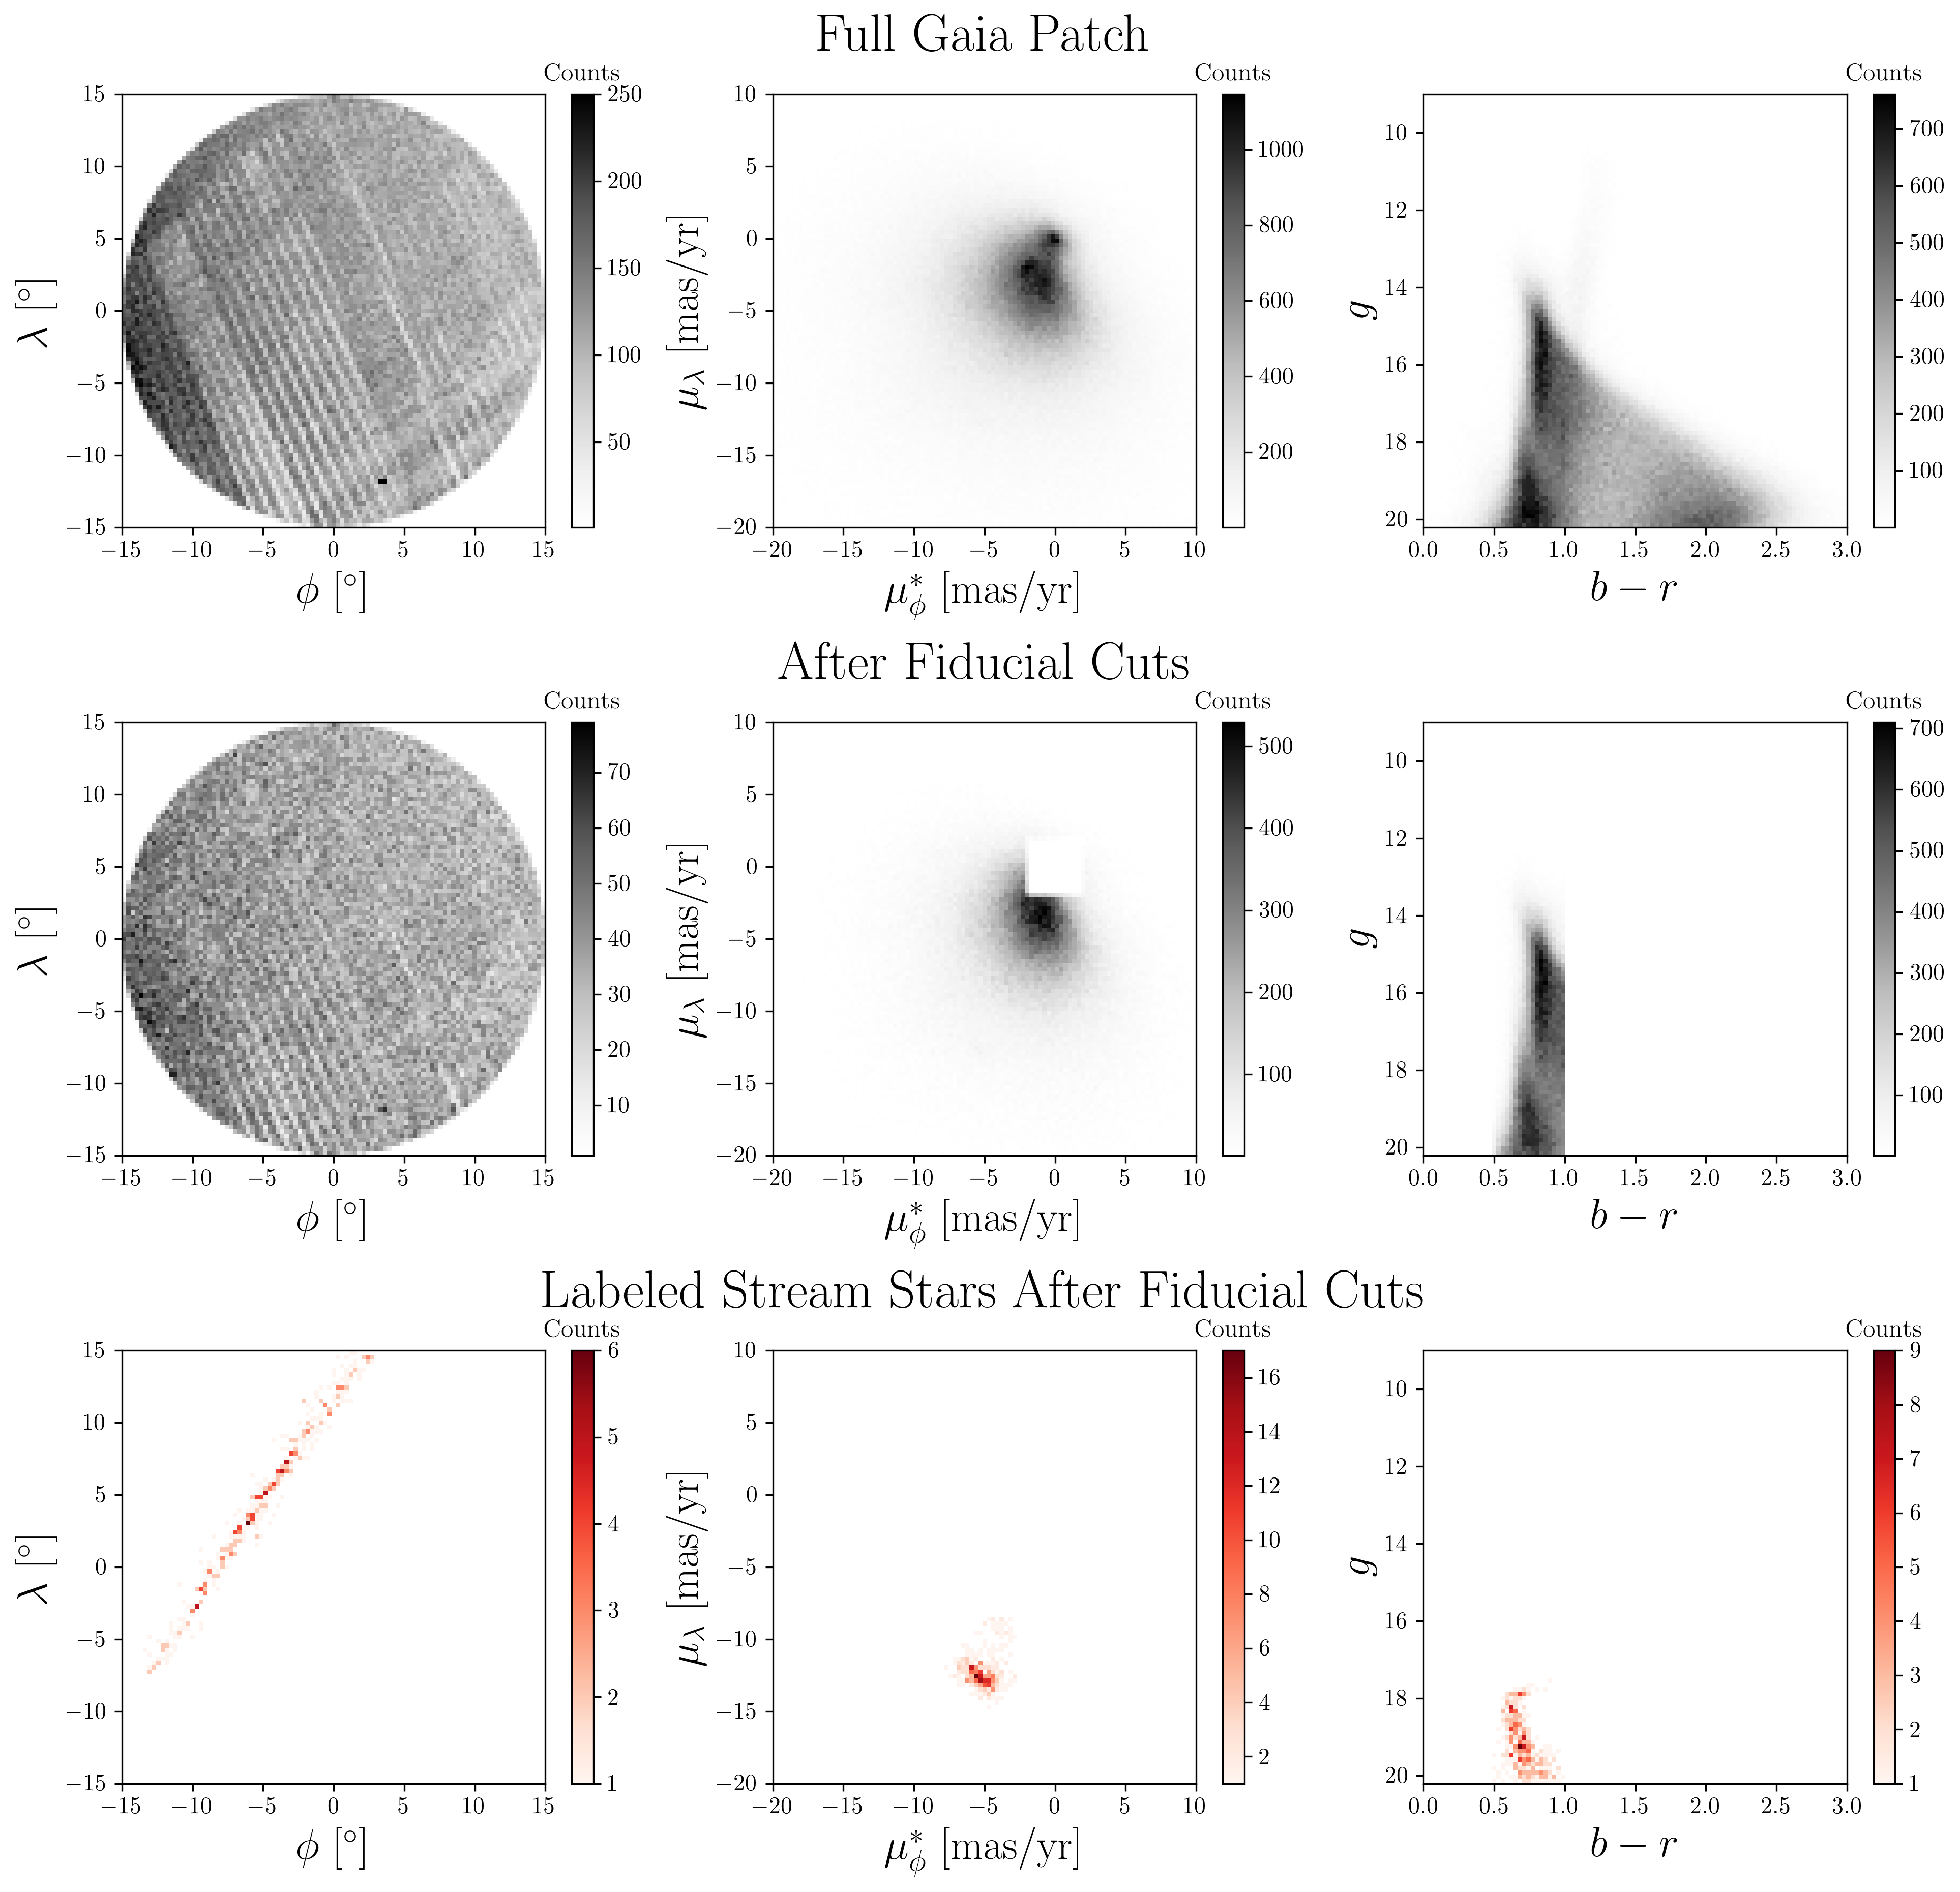

In [5]:
fig = plt.figure(figsize=(13,12.5), dpi=300, tight_layout=True)

cmap = 'Greys'
bins_0 = (np.linspace(-15,15,100), np.linspace(-15,15,100))
bins_1 = (np.linspace(-20,10,100), np.linspace(-20,10,100))
bins_2 = (np.linspace(0,3,100),np.linspace(9,20.2,100))

df = df_fullpatch

ax = fig.add_subplot(331)
h = ax.hist2d(df['ϕ'], df['λ'], cmap=cmap, cmin=1, vmax=250, bins=bins_0)
ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
ax.set_xlim(-15,15);
ax.set_ylim(-15,15);
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(332)
h = ax.hist2d(df['μ_ϕcosλ'], df['μ_λ'], cmap=cmap, cmin=1, bins=bins_1)
ax.set_xlim(-20,10)
ax.set_ylim(-20,10)
ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);
ax.set_title('Full Gaia Patch', fontsize=25, pad=20)

ax = fig.add_subplot(333)
h = ax.hist2d(df['b-r'], df['g'], cmap=cmap, cmin=1, bins=bins_2)
ax.set_xlabel(r'$b-r$',fontsize=20)
ax.set_ylabel(r'$g$',fontsize=20)
ax.set_xlim(0,3)
ax.invert_yaxis()
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

df = fiducial_cuts(df)

ax = fig.add_subplot(334)
h = ax.hist2d(df['ϕ'], df['λ'], cmap=cmap, cmin=1, bins=bins_0)
ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
ax.set_xlim(-15,15);
ax.set_ylim(-15,15);
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(335)
h = ax.hist2d(df['μ_ϕcosλ'], df['μ_λ'], cmap=cmap, cmin=1, bins=bins_1)
ax.set_xlim(-20,10)
ax.set_ylim(-20,10)
ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);
ax.set_title('After Fiducial Cuts', fontsize=25, pad=20)

ax = fig.add_subplot(336)
h = ax.hist2d(df['b-r'], df['g'], cmap=cmap, cmin=1, bins=bins_2)
ax.set_xlabel(r'$b-r$',fontsize=20)
ax.set_ylabel(r'$g$',fontsize=20)
ax.set_xlim(0,3)
ax.set_ylim(9,20.2)
ax.invert_yaxis()
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(337)
h = ax.hist2d(df[df.stream]['ϕ'], df[df.stream]['λ'], cmap='Reds', bins=bins_0, cmin=1)
ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
ax.set_xlim(-15,15);
ax.set_ylim(-15,15);
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(338)
h = ax.hist2d(df[df.stream]['μ_ϕcosλ'], df[df.stream]['μ_λ'], cmap='Reds', cmin=1, bins=bins_1)
ax.set_xlim(-20,10)
ax.set_ylim(-20,10)
ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);
ax.set_title('Labeled Stream Stars After Fiducial Cuts', fontsize=25, pad=20)

ax = fig.add_subplot(339)
h = ax.hist2d(df[df.stream]['b-r'], df[df.stream]['g'], cmap='Reds', cmin=1, bins=bins_2)
ax.set_xlabel(r'$b-r$',fontsize=20)
ax.set_ylabel(r'$g$',fontsize=20)
ax.set_xlim(0,3)
ax.set_ylim(9,20.2)
ax.invert_yaxis()
c = fig.colorbar(h[3], ax=ax);
c.ax.set_title('Counts', fontsize=12);

plt.savefig(os.path.join(save_folder,"input_variables.pdf"))

In [51]:
12.5/3

4.166666666666667

In [63]:
# fig = plt.figure(figsize=(13,4.2), dpi=300, tight_layout=True)

# cmap = 'Greys'
# bins_0 = (np.linspace(-15,15,100), np.linspace(-15,15,100))
# bins_1 = (np.linspace(-20,10,100), np.linspace(-20,10,100))
# bins_2 = (np.linspace(0,3,100),np.linspace(9,20.2,100))

# df = df_fullpatch

# ax = fig.add_subplot(131)
# h = ax.hist2d(df['ϕ'], df['λ'], cmap=cmap, cmin=1, vmax=250, bins=bins_0)
# h = ax.hist2d(df[df.stream]['ϕ'], df[df.stream]['λ'], cmap='Reds', bins=bins_0, cmin=1)
# ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
# ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
# ax.set_xlim(-15,15);
# ax.set_ylim(-15,15);
# c = fig.colorbar(h[3], ax=ax)
# c.ax.set_title('Counts', fontsize=12);

# ax = fig.add_subplot(132)
# h = ax.hist2d(df['μ_ϕcosλ'], df['μ_λ'], cmap=cmap, cmin=1, bins=bins_1)
# h = ax.hist2d(df[df.stream]['μ_ϕcosλ'], df[df.stream]['μ_λ'], cmap='Reds', cmin=1, bins=bins_1)
# ax.set_xlim(-20,10)
# ax.set_ylim(-20,10)
# ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
# ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
# c = fig.colorbar(h[3], ax=ax)
# c.ax.set_title('Counts', fontsize=12);
# ax.set_title('Full Gaia Patch', fontsize=25, pad=20)

# ax = fig.add_subplot(133)
# h = ax.hist2d(df['b-r'], df['g'], cmap=cmap, cmin=1, bins=bins_2)
# h = ax.hist2d(df[df.stream]['b-r'], df[df.stream]['g'], cmap='Reds', cmin=1, bins=bins_2)
# ax.set_xlabel(r'$b-r$',fontsize=20)
# ax.set_ylabel(r'$g$',fontsize=20)
# ax.set_xlim(0,3)
# ax.invert_yaxis()
# c = fig.colorbar(h[3], ax=ax)
# c.ax.set_title('Counts', fontsize=12);

# Figure 2: Schematic of CWoLa (no plot)

# Figure 3: Show signal & sideband regions

Total counts: SR = 14,016, SB = 30,836
Signal region has 336 stream and 13,680 bkg events (2.46%).
Sideband region has 402 stream and 44,450 bkg events (0.90%).
f_sig = 2.7X f_sideband.


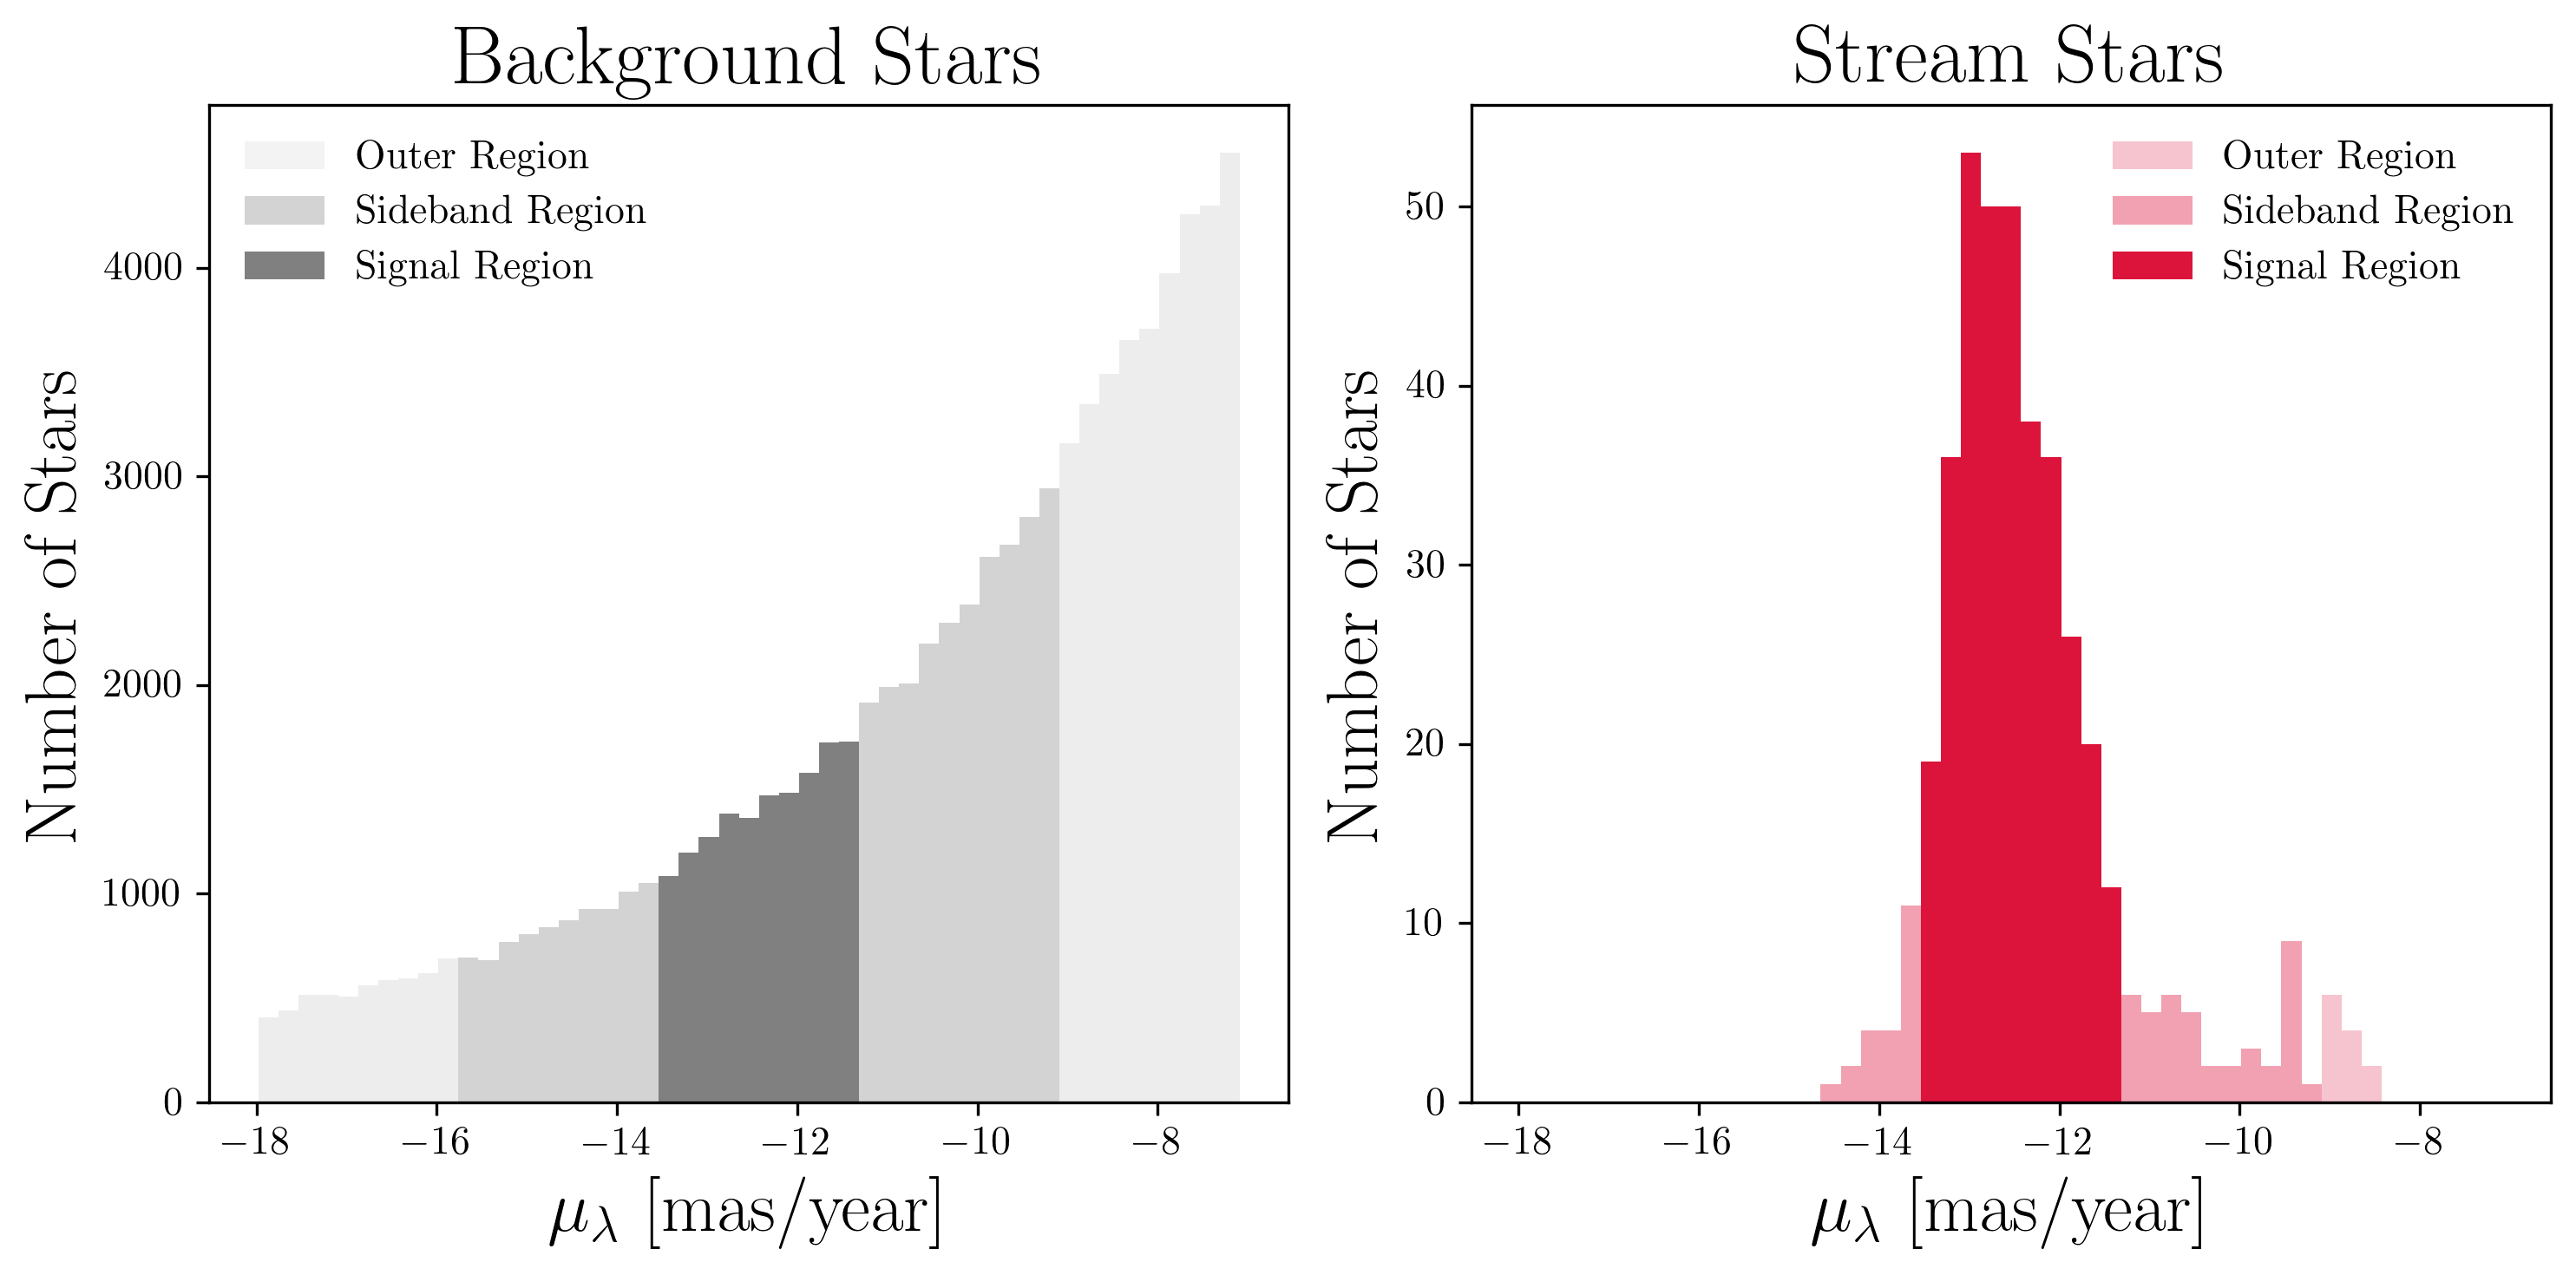

In [7]:
sr_factor = 1
sb_factor = 3

sb_min = df[df.stream]["μ_λ"].median()-sb_factor*df[df.stream]["μ_λ"].std()
sb_max = df[df.stream]["μ_λ"].median()+sb_factor*df[df.stream]["μ_λ"].std()
sr_min = df[df.stream]["μ_λ"].median()-sr_factor*df[df.stream]["μ_λ"].std()
sr_max = df[df.stream]["μ_λ"].median()+sr_factor*df[df.stream]["μ_λ"].std()

df_slice = df[(df["μ_λ"] >= sb_min) & (df["μ_λ"] <= sb_max)]
df_slice['label'] = np.where(((df_slice["μ_λ"] >= sr_min) & (df_slice["μ_λ"] <= sr_max)), 1, 0)

sr = df_slice[df_slice.label == 1]
sb = df_slice[df_slice.label == 0]
print("Total counts: SR = {:,}, SB = {:,}".format(len(sr), len(sb)))

outer_region = df[(df["μ_λ"] < sb_min) | (df["μ_λ"] > sb_max)]
sb = df[(df["μ_λ"] >= sb_min) & (df["μ_λ"] <= sb_max)]
sr = df[(df["μ_λ"] >= sr_min) & (df["μ_λ"] <= sr_max)]    

try: n_sig_stream_stars = sr.stream.value_counts()[True]
except: n_sig_stream_stars = 0
try: n_sideband_stream_stars = sb.stream.value_counts()[True]
except: n_sideband_stream_stars = 0
try: n_sig_bkg_stars = sr.stream.value_counts()[False]
except: n_sig_bkg_stars = 0
try: n_sideband_bkg_stars = sb.stream.value_counts()[False]
except: n_sideband_bkg_stars = 0

print("Signal region has {:,} stream and {:,} bkg events ({:.2f}%).".format(n_sig_stream_stars, n_sig_bkg_stars,100*n_sig_stream_stars/n_sig_bkg_stars))
print("Sideband region has {:,} stream and {:,} bkg events ({:.2f}%).".format(n_sideband_stream_stars, n_sideband_bkg_stars, 100*n_sideband_stream_stars/n_sideband_bkg_stars))
print("f_sig = {:.1f}X f_sideband.".format(n_sig_stream_stars/n_sig_bkg_stars/(n_sideband_stream_stars/n_sideband_bkg_stars)))

### Make the plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5), dpi=300, tight_layout=True) 
bins = np.linspace(sb_min - (sr_min - sb_min), sb_max + (sb_max - sr_max), 50)

ax = axs[0]
N, bins, patches = ax.hist(df[df.stream == False]["μ_λ"], edgecolor='None', bins=bins)
for i in range(len(patches)):
    if bins[i] < sb_min or bins[i] > sb_max:
        patches[i].set_alpha(0.4)
        patches[i].set_fc('lightgray')
    elif (sb_min <= bins[i] and bins[i] < sr_min) or (sr_max < bins[i] and bins[i] <= sb_max):
        patches[i].set_fc('lightgray')
    elif sr_min <= bins[i] and bins[i] <= sr_max:
        patches[i].set_fc('gray')
        
custom_legend = [Patch(facecolor='lightgray', alpha=0.25, label='Outer Region'),
                 Patch(facecolor='lightgray', alpha=1, label='Sideband Region'),
                 Patch(facecolor='gray', alpha=1, label='Signal Region'),
                ]
ax.set_title('Background Stars', fontsize=23)
ax.set_xlabel(r'$\mu_\lambda$ [mas/year]', fontsize=20)
ax.set_ylabel('Number of Stars', fontsize=20)
ax.legend(handles=custom_legend, loc="upper left", frameon=False);

ax = axs[1]
N, bins, patches = ax.hist(df[df.stream == True]["μ_λ"], edgecolor='None', bins=bins)
for i in range(len(patches)):
    if bins[i] < sb_min or bins[i] > sb_max:
        patches[i].set_alpha(0.25)
        patches[i].set_fc('crimson')
    elif (sb_min <= bins[i] and bins[i] < sr_min) or (sr_max < bins[i] and bins[i] <= sb_max):
        patches[i].set_alpha(0.4)
        patches[i].set_fc('crimson')
    elif sr_min <= bins[i] and bins[i] <= sr_max:
        patches[i].set_fc('crimson')
        
custom_legend = [Patch(facecolor='crimson', alpha=0.25, label='Outer Region'),
                 Patch(facecolor='crimson', alpha=0.4, label='Sideband Region'),
                 Patch(facecolor='crimson', alpha=1, label='Signal Region'),
                ]
ax.set_title('Stream Stars', fontsize=23)
ax.set_xlabel(r'$\mu_\lambda$ [mas/year]', fontsize=20)
ax.set_ylabel('Number of Stars', fontsize=20)
ax.legend(handles=custom_legend, frameon=False);
plt.savefig(os.path.join(save_folder,"mu_lambda.pdf"))    

# Figure 4: show that signal and sideband are statistically identical

Plots:   0%|          | 0/6 [00:00<?, ?it/s]/tmp/ipykernel_17336/2980573112.py:32: RuntimeWarning: invalid value encountered in double_scalars
  sig_ratio = [x/y for x,y in zip(sig_sr_density[0],sig_sb_density[0])]
/tmp/ipykernel_17336/2980573112.py:35: RuntimeWarning: divide by zero encountered in divide
  sig_yerr = np.sqrt(1/sig_sb_counts[0] + 1/sig_sr_counts[0])
Plots: 100%|██████████| 6/6 [00:00<00:00, 31.30it/s]


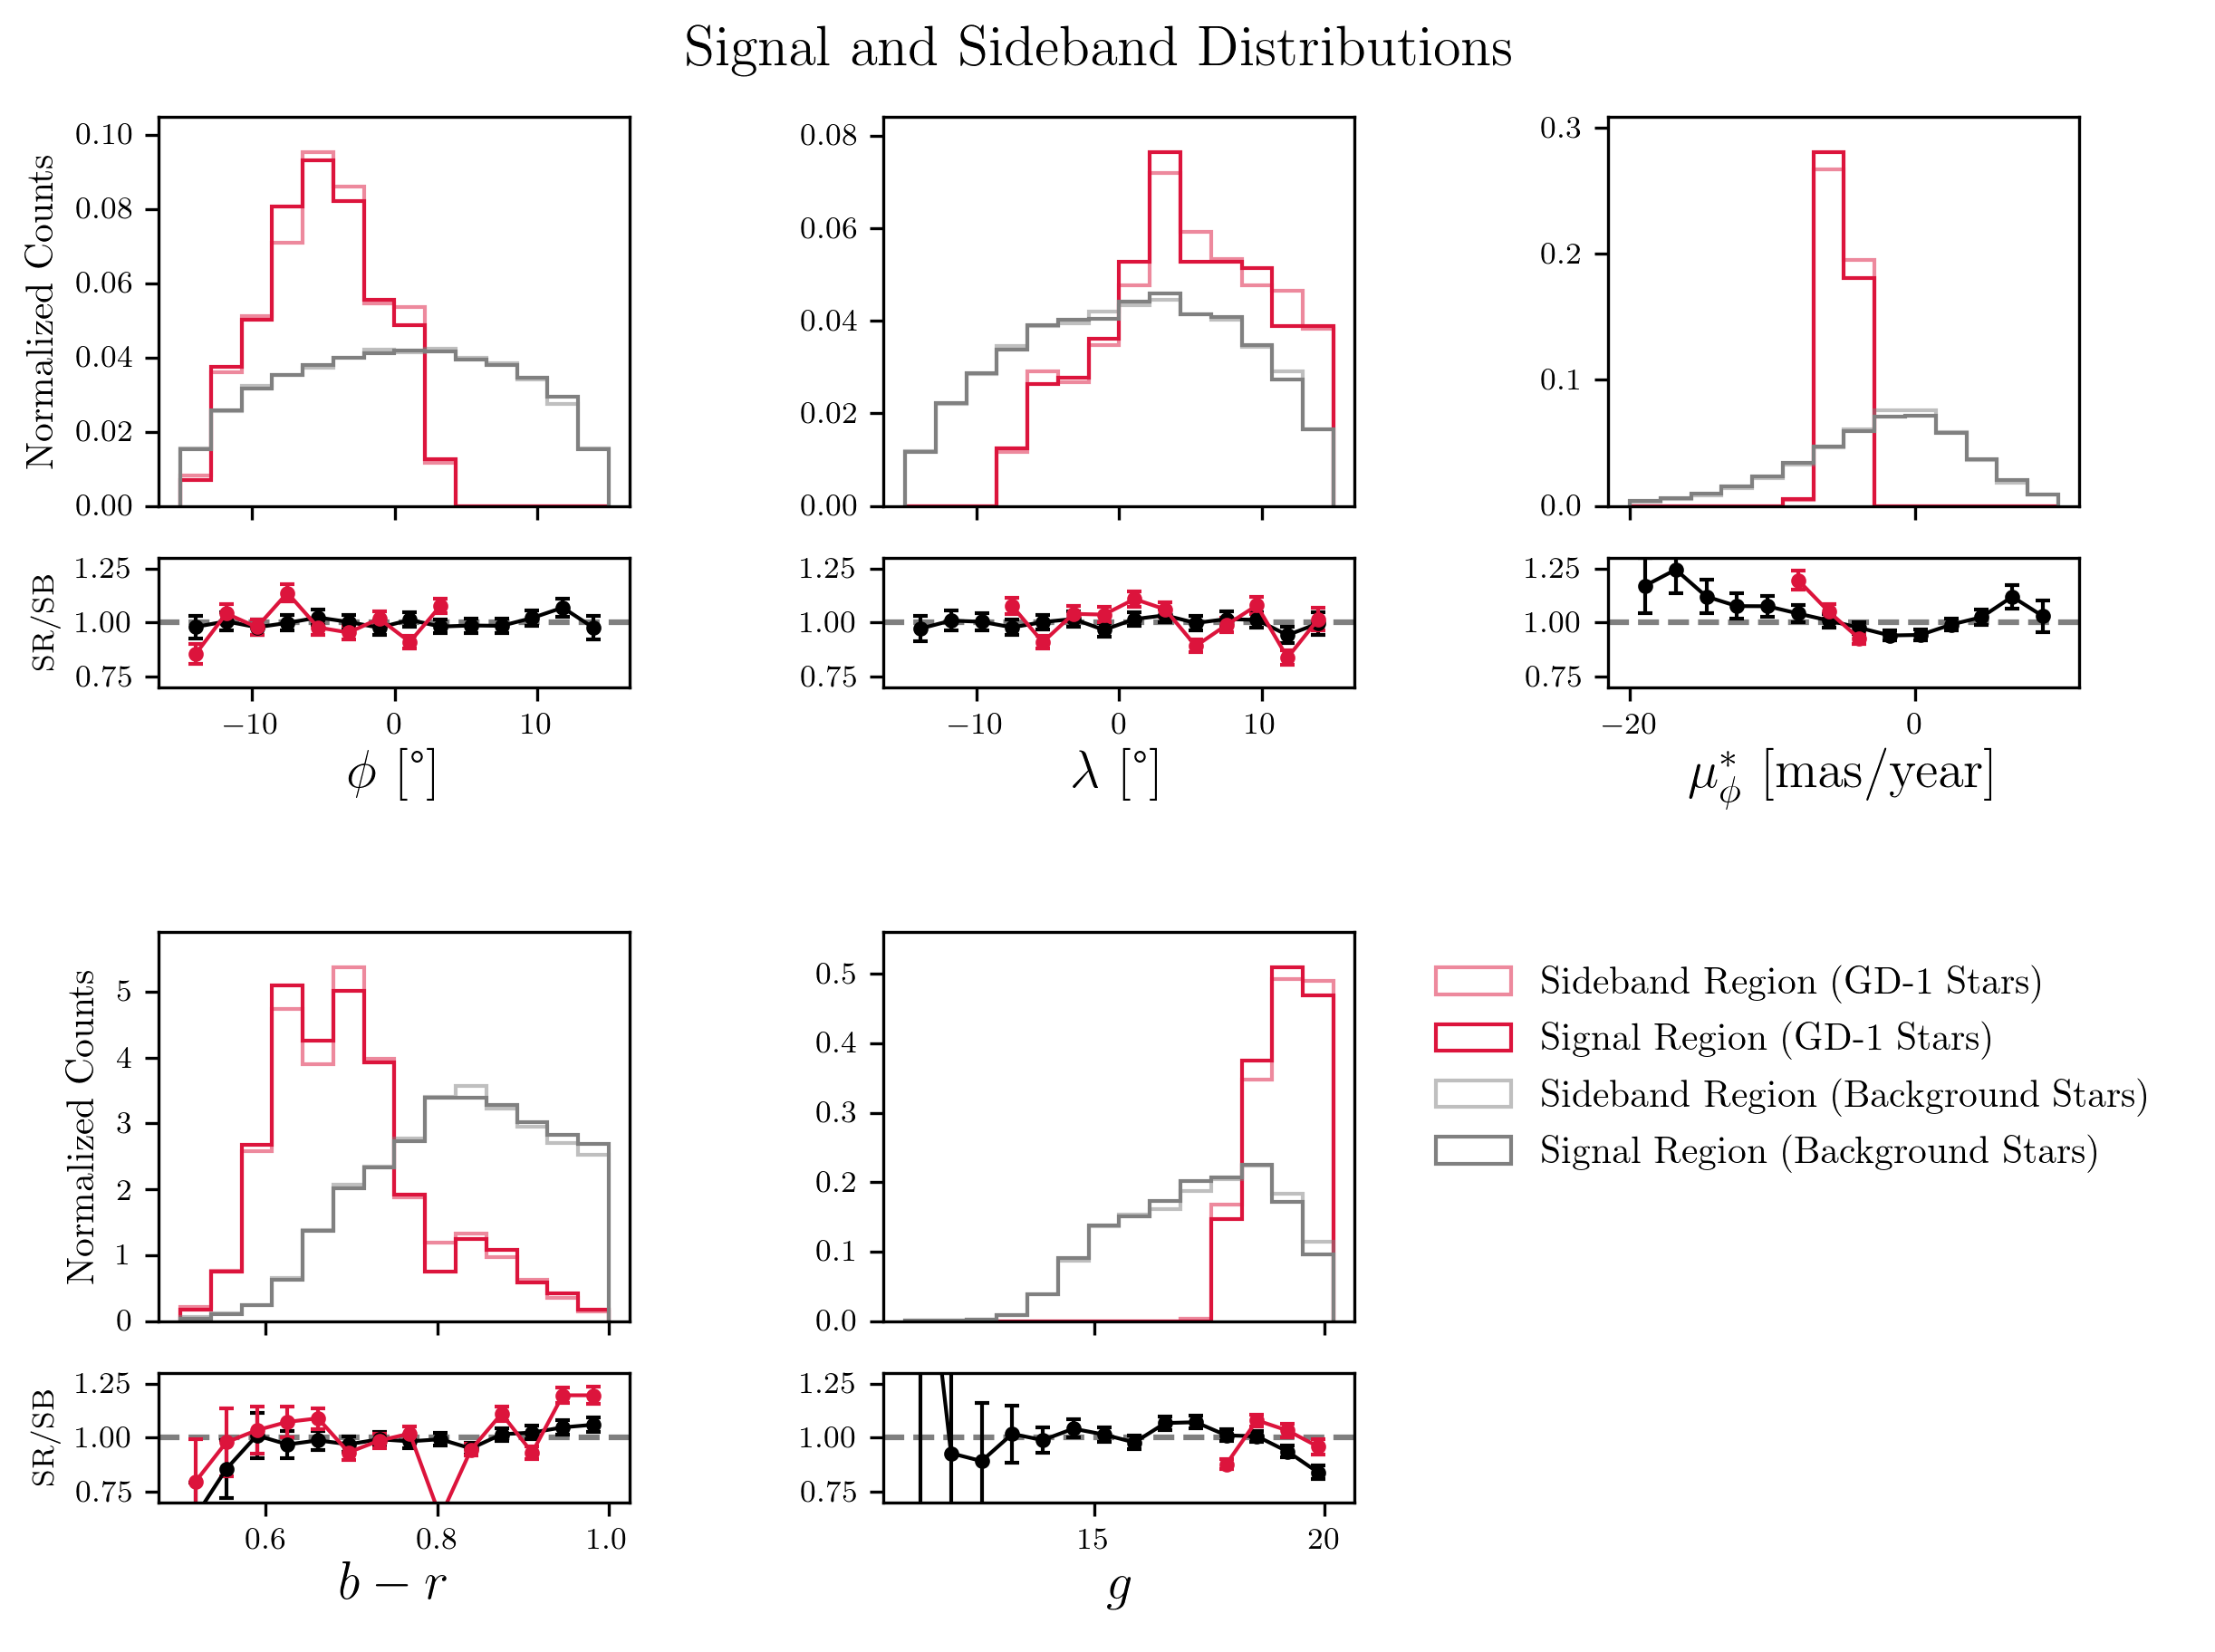

In [8]:
fig = plt.figure(dpi=300, figsize=(8,6))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
subfigs = fig.subfigures(2, 3)

vars = ['ϕ', 'λ', 'μ_ϕcosλ', 'b-r', 'g']
labels = [r'$\phi$ [\textdegree]', r'$\lambda$ [\textdegree]', r'$\mu_\phi^*$ [mas/year]', r'$b-r$', r'$g$']

for i, subfig in enumerate(tqdm(subfigs.flat, desc="Plots")):
    try: 
        var = vars[i]
    except: 
        continue
        
    subfig.subplots_adjust(hspace=0.2, bottom=0.15, top=0.85, left=0.2, right=0.85)    
            
    axs = subfig.subplots(2, 1, sharex=True, sharey=False, gridspec_kw = {'height_ratios':[3, 1]})
    if var == 'μ_ϕcosλ': 
        bins = np.linspace(-20,10,15);
    else:
        bins = np.linspace(sb[sb.stream==False][var].min(), sb[sb.stream==False][var].max(), 15)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    sig_sb_density = axs[0].hist(sb[sb.stream == True][var], bins = bins, histtype="step", density=True, label="Sideband Region (GD-1 Stars)", alpha=0.5, color='crimson');
    sig_sr_density = axs[0].hist(sr[sr.stream == True][var], bins = bins, histtype="step", density=True, label="Signal Region (GD-1 Stars)", color='crimson');
    sb_density = axs[0].hist(sb[sb.stream == False][var], bins = bins, histtype="step", density=True, label="Sideband Region (Background Stars)", alpha = 0.5, color='gray');
    sr_density = axs[0].hist(sr[sr.stream == False][var], bins = bins, histtype="step", density=True, label="Signal Region (Background Stars)", color='gray');
    sig_sb_counts =  np.histogram(sb[sb.stream == True][var], bins = bins);
    sig_sr_counts =  np.histogram(sr[sr.stream == True][var], bins = bins);
    sb_counts =  np.histogram(sb[sb.stream == False][var], bins = bins);
    sr_counts =  np.histogram(sr[sr.stream == False][var], bins = bins);
    ratio = [x/y for x,y in zip(sr_density[0],sb_density[0])]
    yerr = np.sqrt(1/sb_counts[0] + 1/sr_counts[0])
    sig_ratio = [x/y for x,y in zip(sig_sr_density[0],sig_sb_density[0])]
    sig_ratio = np.array(sig_ratio)
    sig_ratio[sig_ratio == 0] = np.nan
    sig_yerr = np.sqrt(1/sig_sb_counts[0] + 1/sig_sr_counts[0])
    sig_mask = ~np.isnan(sig_ratio) # only plot the bins that aren't NaN for signal
        
    if i % 3 == 0: 
        axs[0].set_ylabel('Normalized Counts', labelpad=4);
        axs[1].set_ylabel('SR/SB', labelpad=4, fontsize=8);
    axs[1].axhline(y=1, color='k', linestyle="dashed", alpha=0.5)
    axs[1].errorbar(bin_centers, ratio, yerr=ratio*yerr, marker=".", capsize=2, linewidth=1, color='black')
    axs[1].errorbar(np.array(bin_centers)[sig_mask], sig_ratio[sig_mask], yerr=sig_ratio[sig_mask]*yerr[sig_mask], capsize=2, marker=".", linewidth=1, color='crimson')
    axs[1].set_xlabel(labels[i], labelpad=2, fontsize=14);
    axs[0].set_ylim(0, 1.1*np.max([sig_sb_density[0],sig_sr_density[0]]));
    axs[1].set_ylim(0.7,1.3);
    axs[1].xaxis.set_tick_params(labelsize=8)
    axs[0].yaxis.set_tick_params(labelsize=8)
    axs[1].yaxis.set_tick_params(labelsize=8)

    if i == 4: axs[0].legend(fontsize=10, frameon=False, bbox_to_anchor=(1.1, 1.0));

plt.suptitle("Signal and Sideband Distributions", y=0.98, fontsize=15);
plt.savefig(os.path.join(save_folder,"sr_sb_equiv.pdf"))

# Figure 5: Full GD-1 scan

First, the raw combined result...


9,021 true GD-1 stars pass fiducial cuts.
5,250 stars are identified by CWoLa, of which 2,769 belong to GD-1.

Purity = 53% in top CWoLa-identified stars
Completeness = 31% vs. all of GD-1


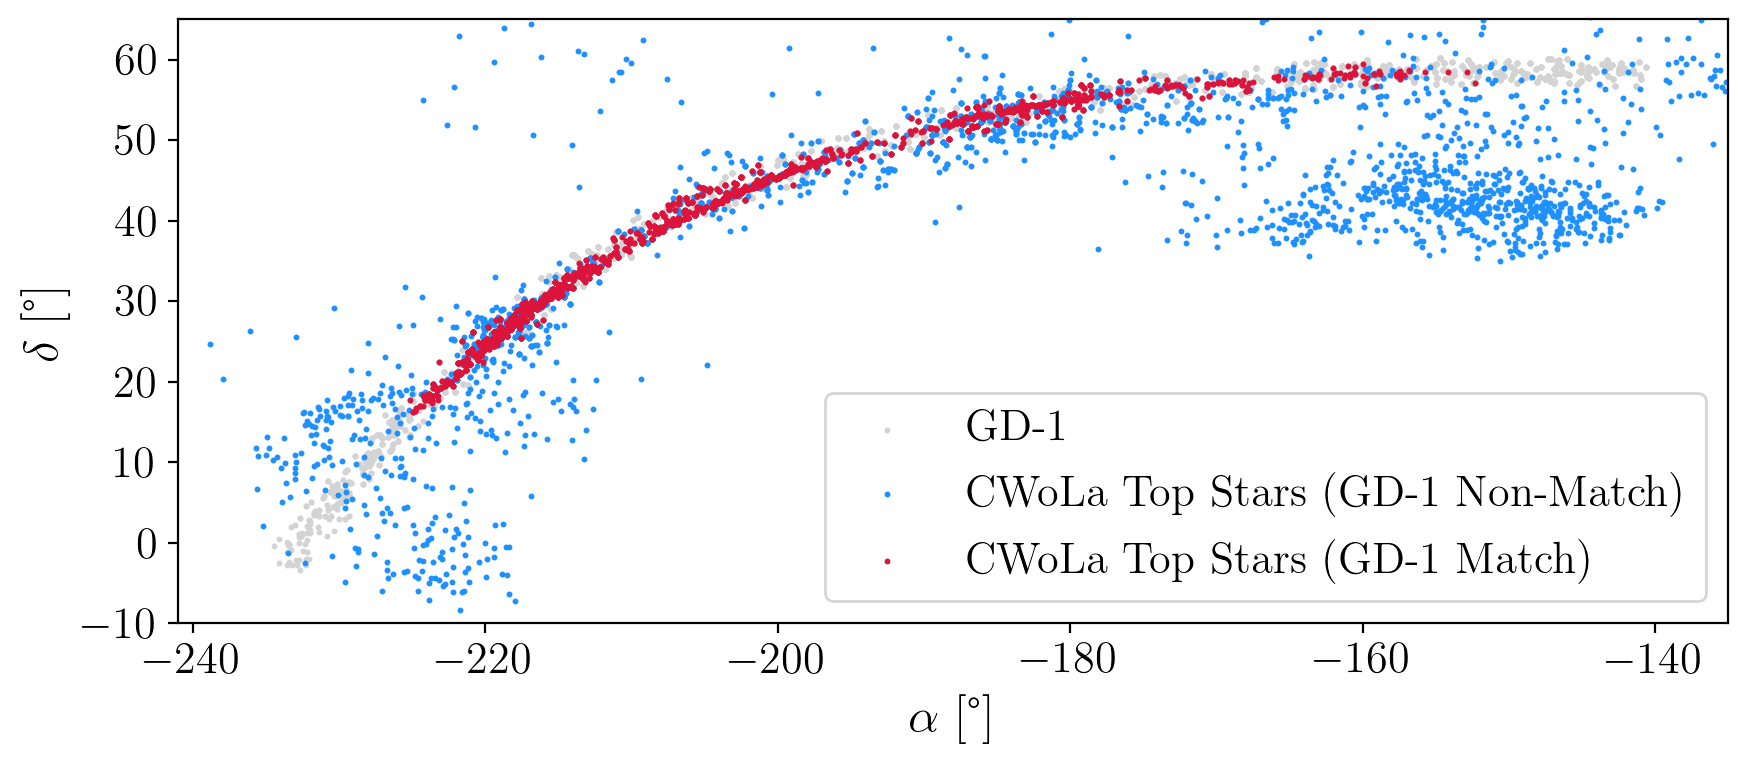

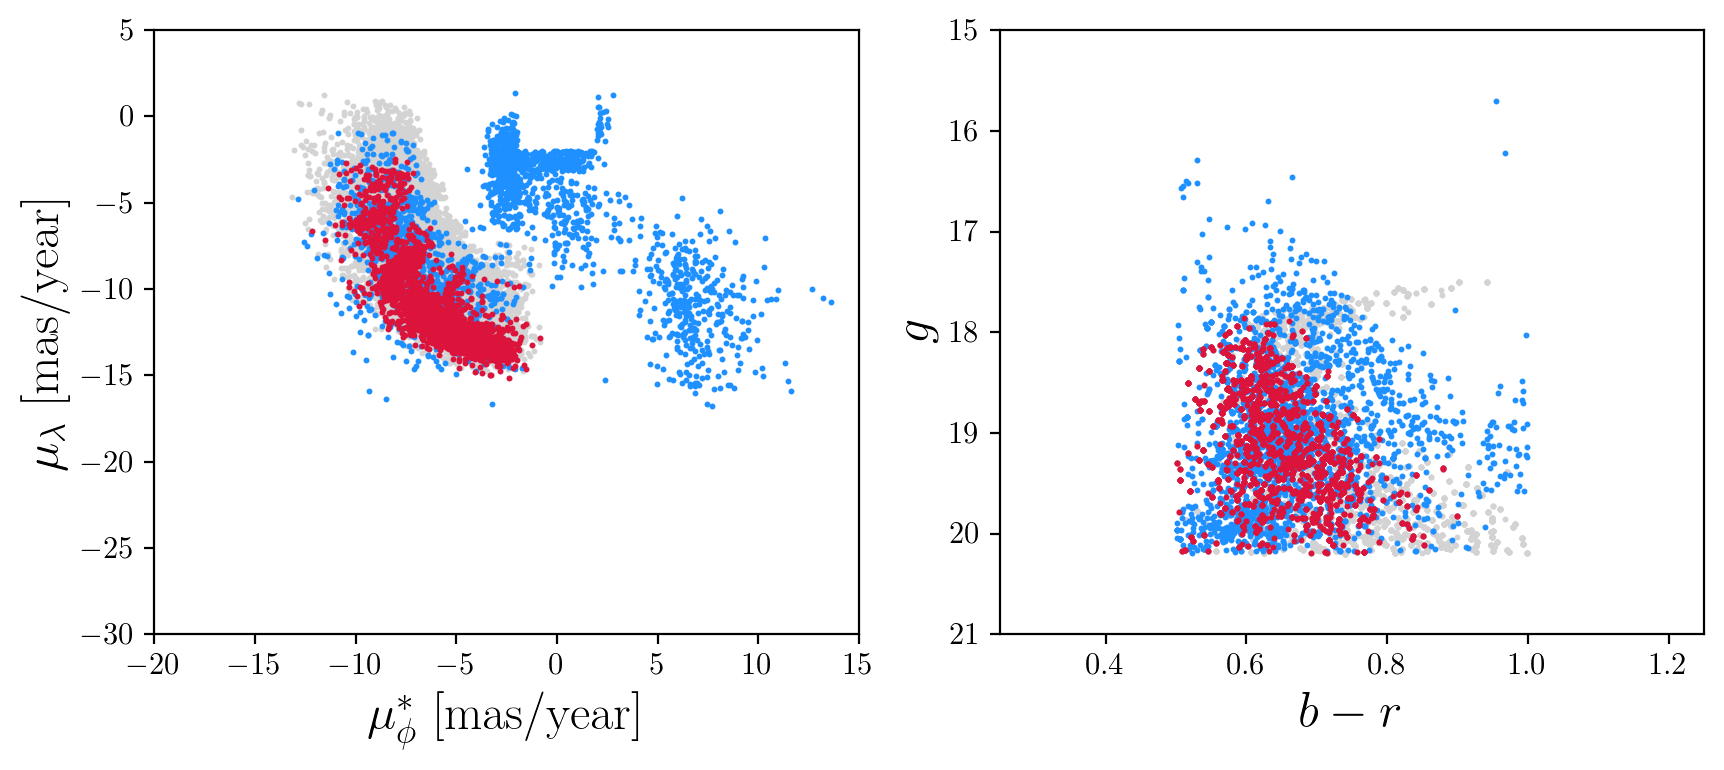

In [10]:
all_gd1_stars = []
all_cwola_stars = []
n_top_stars = 250

df_all = pd.read_hdf("../gaia_data/gd1_21_patches_cwola.h5") 

for patch in df_all.patch_id.unique():
    test = df_all[df_all.patch_id == patch]
    test = fiducial_cuts(test)
    all_gd1_stars.append(test[test.stream])    
    patch_top_stars = test.sort_values('nn_score',ascending=False)[:n_top_stars]
    all_cwola_stars.append(patch_top_stars)
    
all_gd1_stars = pd.concat([df for df in all_gd1_stars])
all_cwola_stars = pd.concat([df for df in all_cwola_stars])

all_gd1_stars['α'] = all_gd1_stars['α']-360
all_cwola_stars['α'] = all_cwola_stars['α']-360
    
markersize = 5
plt.figure(dpi=200, figsize=(10,4))
plt.scatter(all_gd1_stars.α_wrapped - 360, all_gd1_stars.δ, marker='.', s=markersize, 
            color="lightgray", label="GD-1")
plt.scatter(all_cwola_stars[all_cwola_stars.stream == False].α_wrapped - 360, all_cwola_stars[all_cwola_stars.stream == False].δ, marker='.', s=markersize, 
             color='dodgerblue',  label="CWoLa Top Stars (GD-1 Non-Match)")
plt.scatter(all_cwola_stars[all_cwola_stars.stream].α_wrapped - 360, all_cwola_stars[all_cwola_stars.stream].δ, marker='.', s=markersize, 
            color="crimson", label="CWoLa Top Stars (GD-1 Match)")
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"$\alpha$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\delta$ [\textdegree]", fontsize=18);
plt.xlim(-241,-135);
plt.ylim(-10,65);

print("\n{:,} true GD-1 stars pass fiducial cuts.".format(all_gd1_stars.shape[0]))
print("{:,} stars are identified by CWoLa, of which {:,} belong to GD-1.".format(all_cwola_stars.shape[0], len(all_cwola_stars[all_cwola_stars.stream])))

print("\nPurity = {:.0f}% in top CWoLa-identified stars".format(100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_cwola_stars)))
print("Completeness = {:.0f}% vs. all of GD-1".format(100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_gd1_stars)))

markersize = 5
fig, axs = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(10,4))

ax = axs[0]
ax.scatter(all_gd1_stars['μ_ϕcosλ'], all_gd1_stars.μ_λ, marker='.', s=markersize, 
            color="lightgray", label="GD-1")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==False]['μ_ϕcosλ'], all_cwola_stars[all_cwola_stars.stream==False].μ_λ, marker='.', s=markersize, 
              color='dodgerblue', label="CWoLa Top Stars (Non-Match)")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==True]['μ_ϕcosλ'], all_cwola_stars[all_cwola_stars.stream==True].μ_λ, marker='.', s=markersize, 
             color="crimson", label="CWoLa Top Stars (Match)")
ax.set_xlabel(r"$\mu_\phi^*$ [mas/year]", fontsize=18);
ax.set_ylabel(r"$\mu_\lambda$ [mas/year]", fontsize=18);
ax.set_xlim(-20,15);
ax.set_ylim(-30,5);

ax = axs[1]
ax.scatter(all_gd1_stars['b-r'], all_gd1_stars.g, marker='.', s=markersize, 
            color="lightgray", label="GD-1")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==False]['b-r'], all_cwola_stars[all_cwola_stars.stream==False].g, marker='.', s=markersize, 
            color='dodgerblue', label="CWoLa Top Stars (Non-Match)")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==True]['b-r'], all_cwola_stars[all_cwola_stars.stream==True].g, marker='.', s=markersize, 
            color='crimson', label="CWoLa Top Stars (Match)")
ax.set_xlabel(r"$b-r$", fontsize=18);
ax.set_ylabel(r"$g$", fontsize=18);
ax.set_xlim(0.25,1.25);
ax.set_ylim(15,21);
ax.invert_yaxis()

Then, apply k-means clustering...

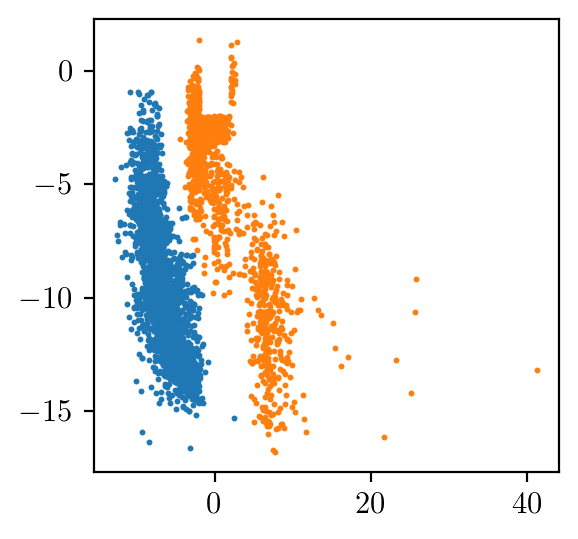

In [11]:
plt.figure(figsize=(3,3), dpi=200)
df = all_cwola_stars
X = np.array(df[['μ_ϕcosλ', 'μ_λ']])

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.scatter(df['μ_ϕcosλ'][kmeans.labels_ == 0], 
            df['μ_λ'][kmeans.labels_ == 0], marker='.', s=markersize);
plt.scatter(df['μ_ϕcosλ'][kmeans.labels_ == 1], 
            df['μ_λ'][kmeans.labels_ == 1], marker='.', s=markersize);
plt.scatter(df['μ_ϕcosλ'][kmeans.labels_ == 2], 
            df['μ_λ'][kmeans.labels_ == 2], marker='.', s=markersize);

### Choose the cluster with the largest number of stars
all_cwola_stars = all_cwola_stars[kmeans.labels_ == np.argmax([np.sum(kmeans.labels_ == 0), np.sum(kmeans.labels_ == 1)])]

### We're gonna want to save a version of this with duplicates included for the patch-by-patch plot
all_cwola_stars_with_duplicates = all_cwola_stars.copy()
all_gd1_stars_with_duplicates = all_gd1_stars.copy()

### Remove duplicates
all_gd1_stars.reset_index(inplace=True)
all_gd1_stars.drop_duplicates(subset = 'index')
all_gd1_stars.drop_duplicates(subset=['α','δ', 'μ_α', 'μ_δ', 'b-r', 'g'], inplace=True)

all_cwola_stars.reset_index(inplace=True)
all_cwola_stars.drop_duplicates(subset = 'index')
all_cwola_stars.drop_duplicates(subset=['α','δ', 'μ_α', 'μ_δ', 'b-r', 'g'], inplace=True)

Then, make the rainbow plot using the largest cluster...


1,498 true GD-1 stars pass fiducial cuts.
1,360 stars are identified by CWoLa, of which 760 belong to GD-1.

Purity = 56% in top CWoLa-identified stars
Completeness = 51% vs. all of GD-1


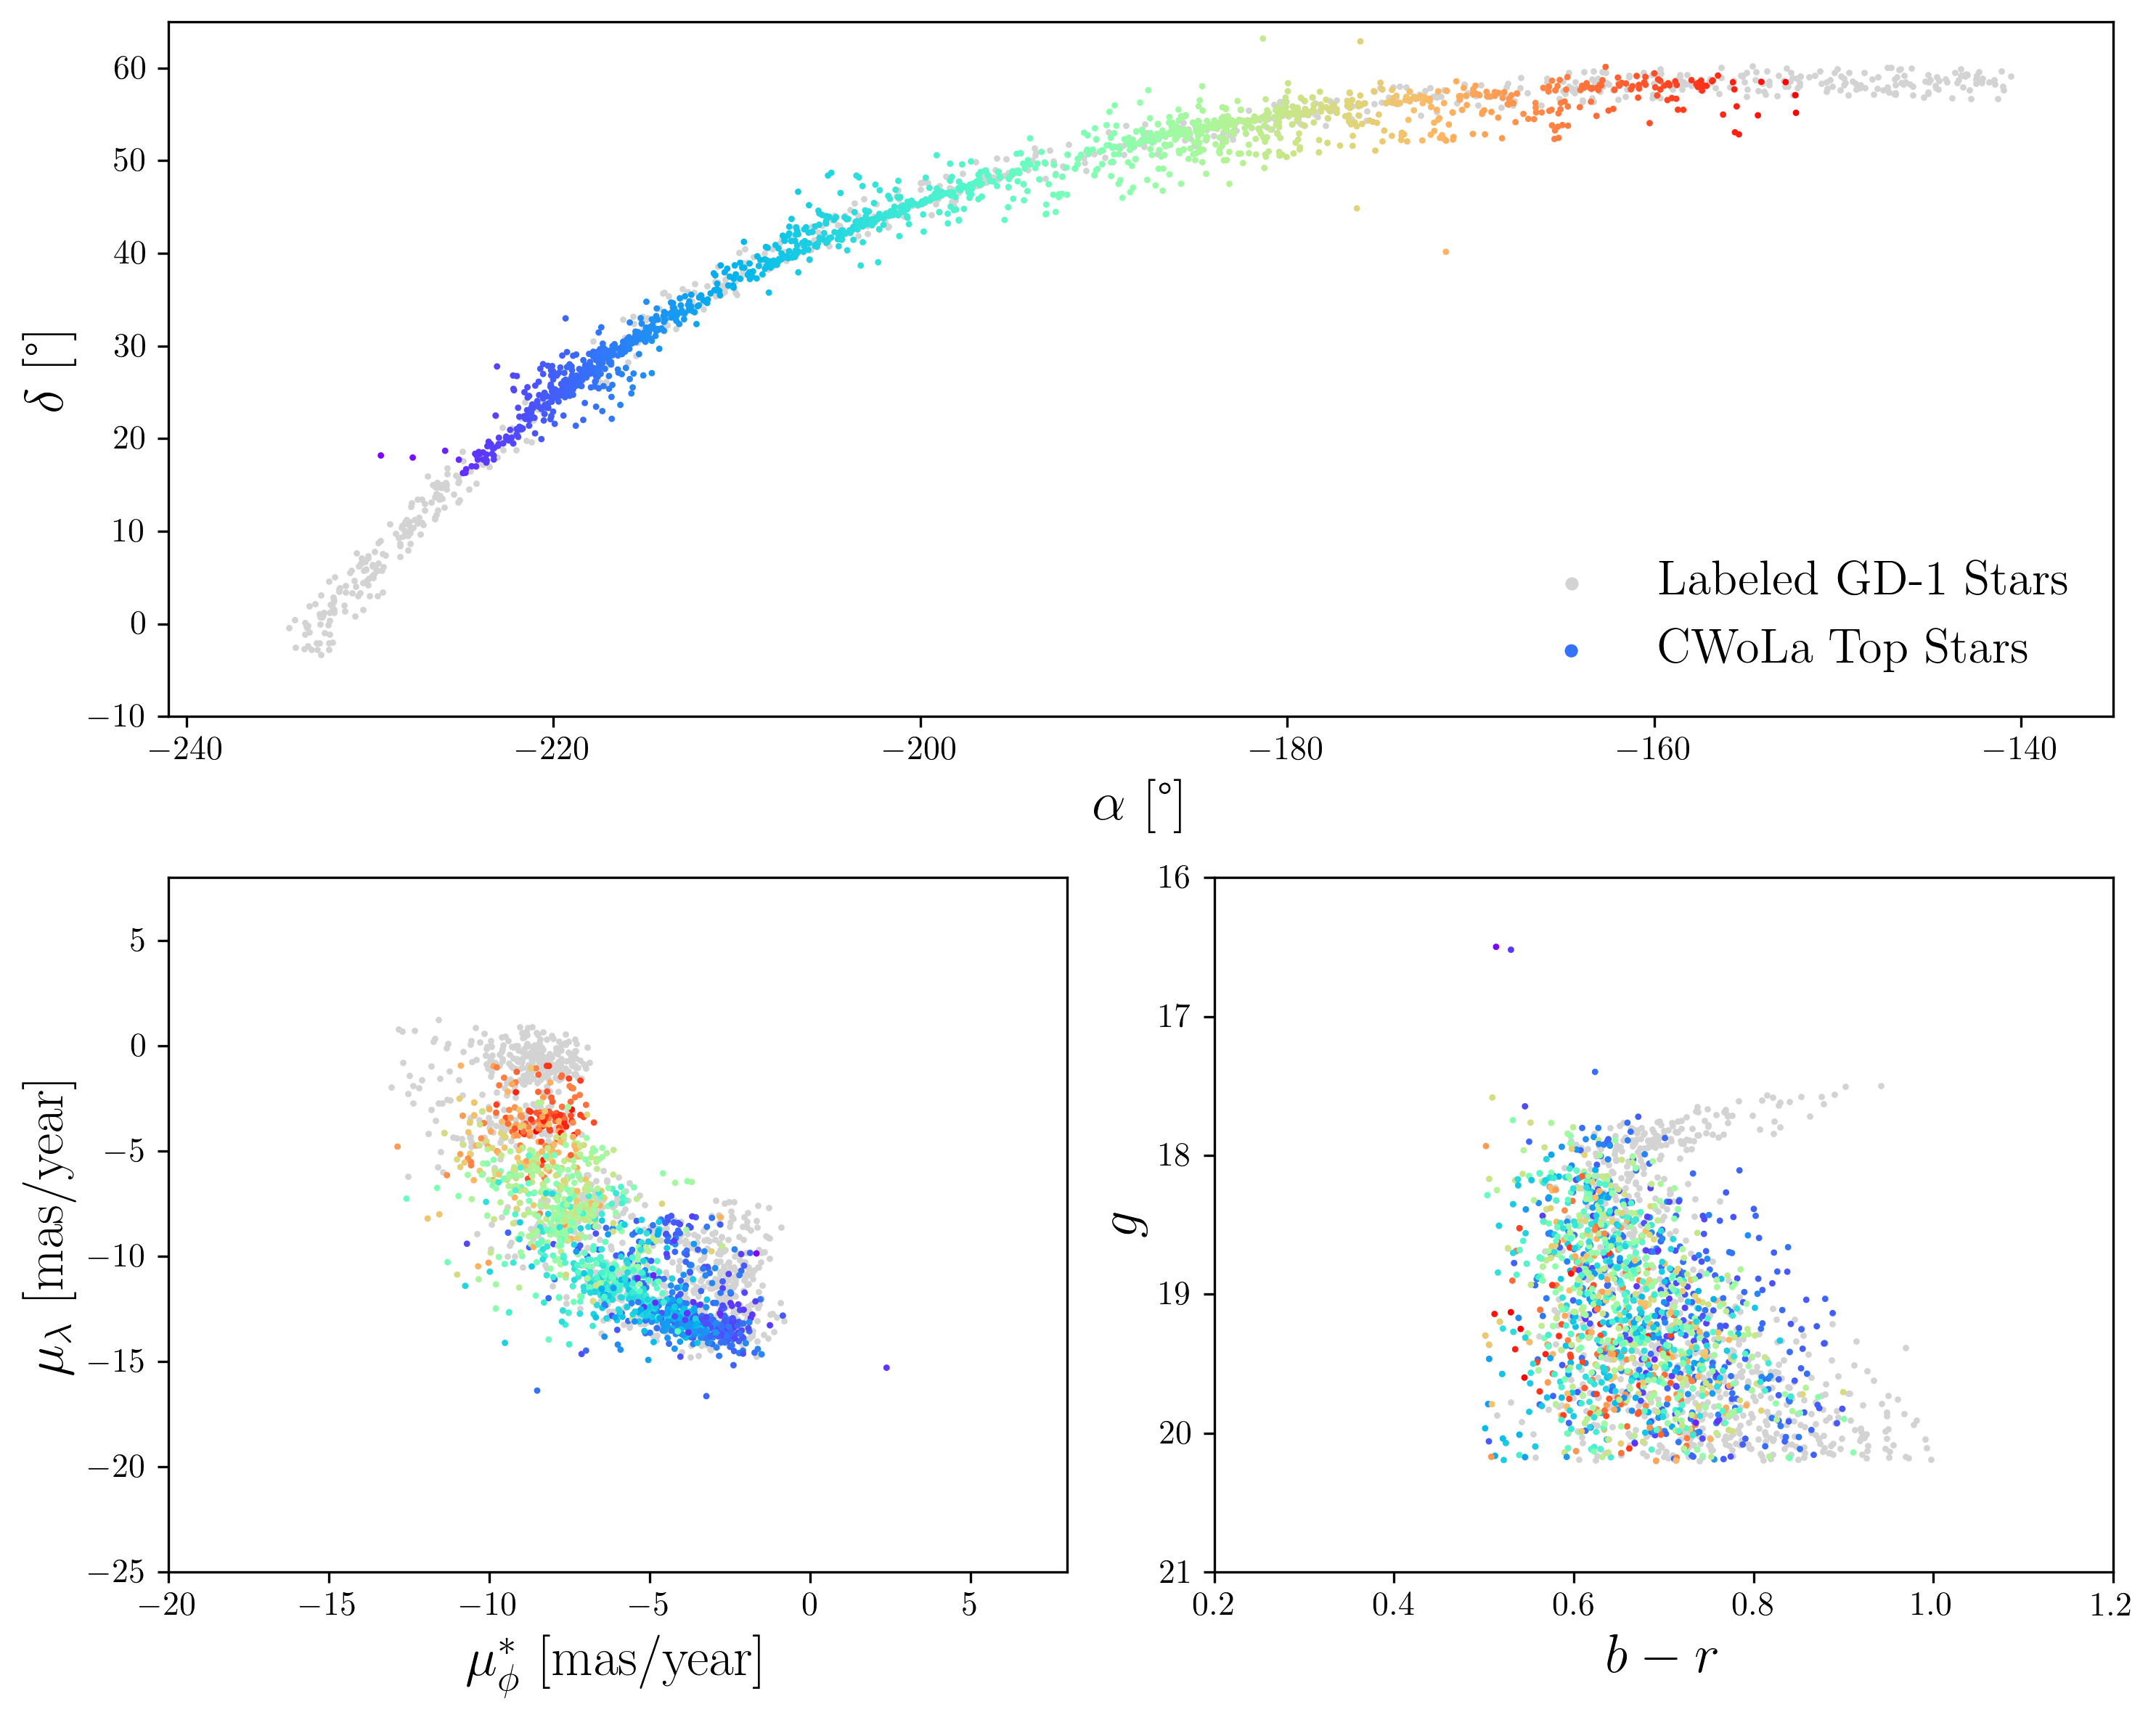

In [14]:
print("\n{:,} true GD-1 stars pass fiducial cuts.".format(all_gd1_stars.shape[0]))
print("{:,} stars are identified by CWoLa, of which {:,} belong to GD-1.".format(all_cwola_stars.shape[0], len(all_cwola_stars[all_cwola_stars.stream])))

purity = 100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_cwola_stars)
completeness = 100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_gd1_stars)

print("\nPurity = {:.0f}% in top CWoLa-identified stars".format(purity))
print("Completeness = {:.0f}% vs. all of GD-1".format(completeness))

fig = plt.figure(figsize=(10,8), dpi=300, tight_layout=True)
gs = GridSpec(2,2) # 2 rows, 3 columns

ax1 = fig.add_subplot(gs[0,:]) # Second row, span all columns
ax2 = fig.add_subplot(gs[1,0]) # First row, first column
ax3 = fig.add_subplot(gs[1,1]) # First row, second column

markersize = 5
ax1.scatter(all_gd1_stars.α_wrapped - 360, all_gd1_stars.δ, marker='.', s=markersize, color="lightgray", label="Labeled GD-1 Stars")
ax1.scatter(all_cwola_stars.α_wrapped - 360, all_cwola_stars.δ, marker='.', s=markersize, c=all_cwola_stars.α_wrapped - 360, cmap='rainbow',  
            label="CWoLa Top Stars")
ax1.legend(fontsize=16, frameon=False, markerscale=3, loc="lower right")
ax1.set_xlabel(r"$\alpha$ [\textdegree]", fontsize=18);
ax1.set_ylabel(r"$\delta$ [\textdegree]", fontsize=18);
ax1.set_xlim(-241,-135);
ax1.set_ylim(-10,65);

ax2.scatter(all_gd1_stars['μ_ϕcosλ'], all_gd1_stars.μ_λ, marker='.', s=markersize, color="lightgray", label="GD-1")
ax2.scatter(all_cwola_stars['μ_ϕcosλ'], all_cwola_stars.μ_λ, marker='.', s=markersize, 
              c=all_cwola_stars.α_wrapped - 360, cmap='rainbow', label="CWoLa Top Stars")
ax2.set_xlabel(r"$\mu_\phi^*$ [mas/year]", fontsize=18);
ax2.set_ylabel(r"$\mu_\lambda$ [mas/year]", fontsize=18);
ax2.set_xlim(-20,8);
ax2.set_ylim(-25,8);

ax3.scatter(all_gd1_stars['b-r'], all_gd1_stars.g, marker='.', s=markersize, color="lightgray", label="GD-1")
ax3.scatter(all_cwola_stars['b-r'], all_cwola_stars.g, marker='.', s=markersize, 
            c=all_cwola_stars.α_wrapped - 360, cmap='rainbow', label="CWoLa Top Stars")
ax3.set_xlabel(r"$b-r$", fontsize=18);
ax3.set_ylabel(r"$g$", fontsize=18);
ax3.set_xlim(0.2,1.2);
ax3.set_ylim(16,21);
ax3.invert_yaxis()
plt.savefig(os.path.join(save_folder,'rainbow.pdf'))

# (Appendix) Figure 13: Patch-by-patch result

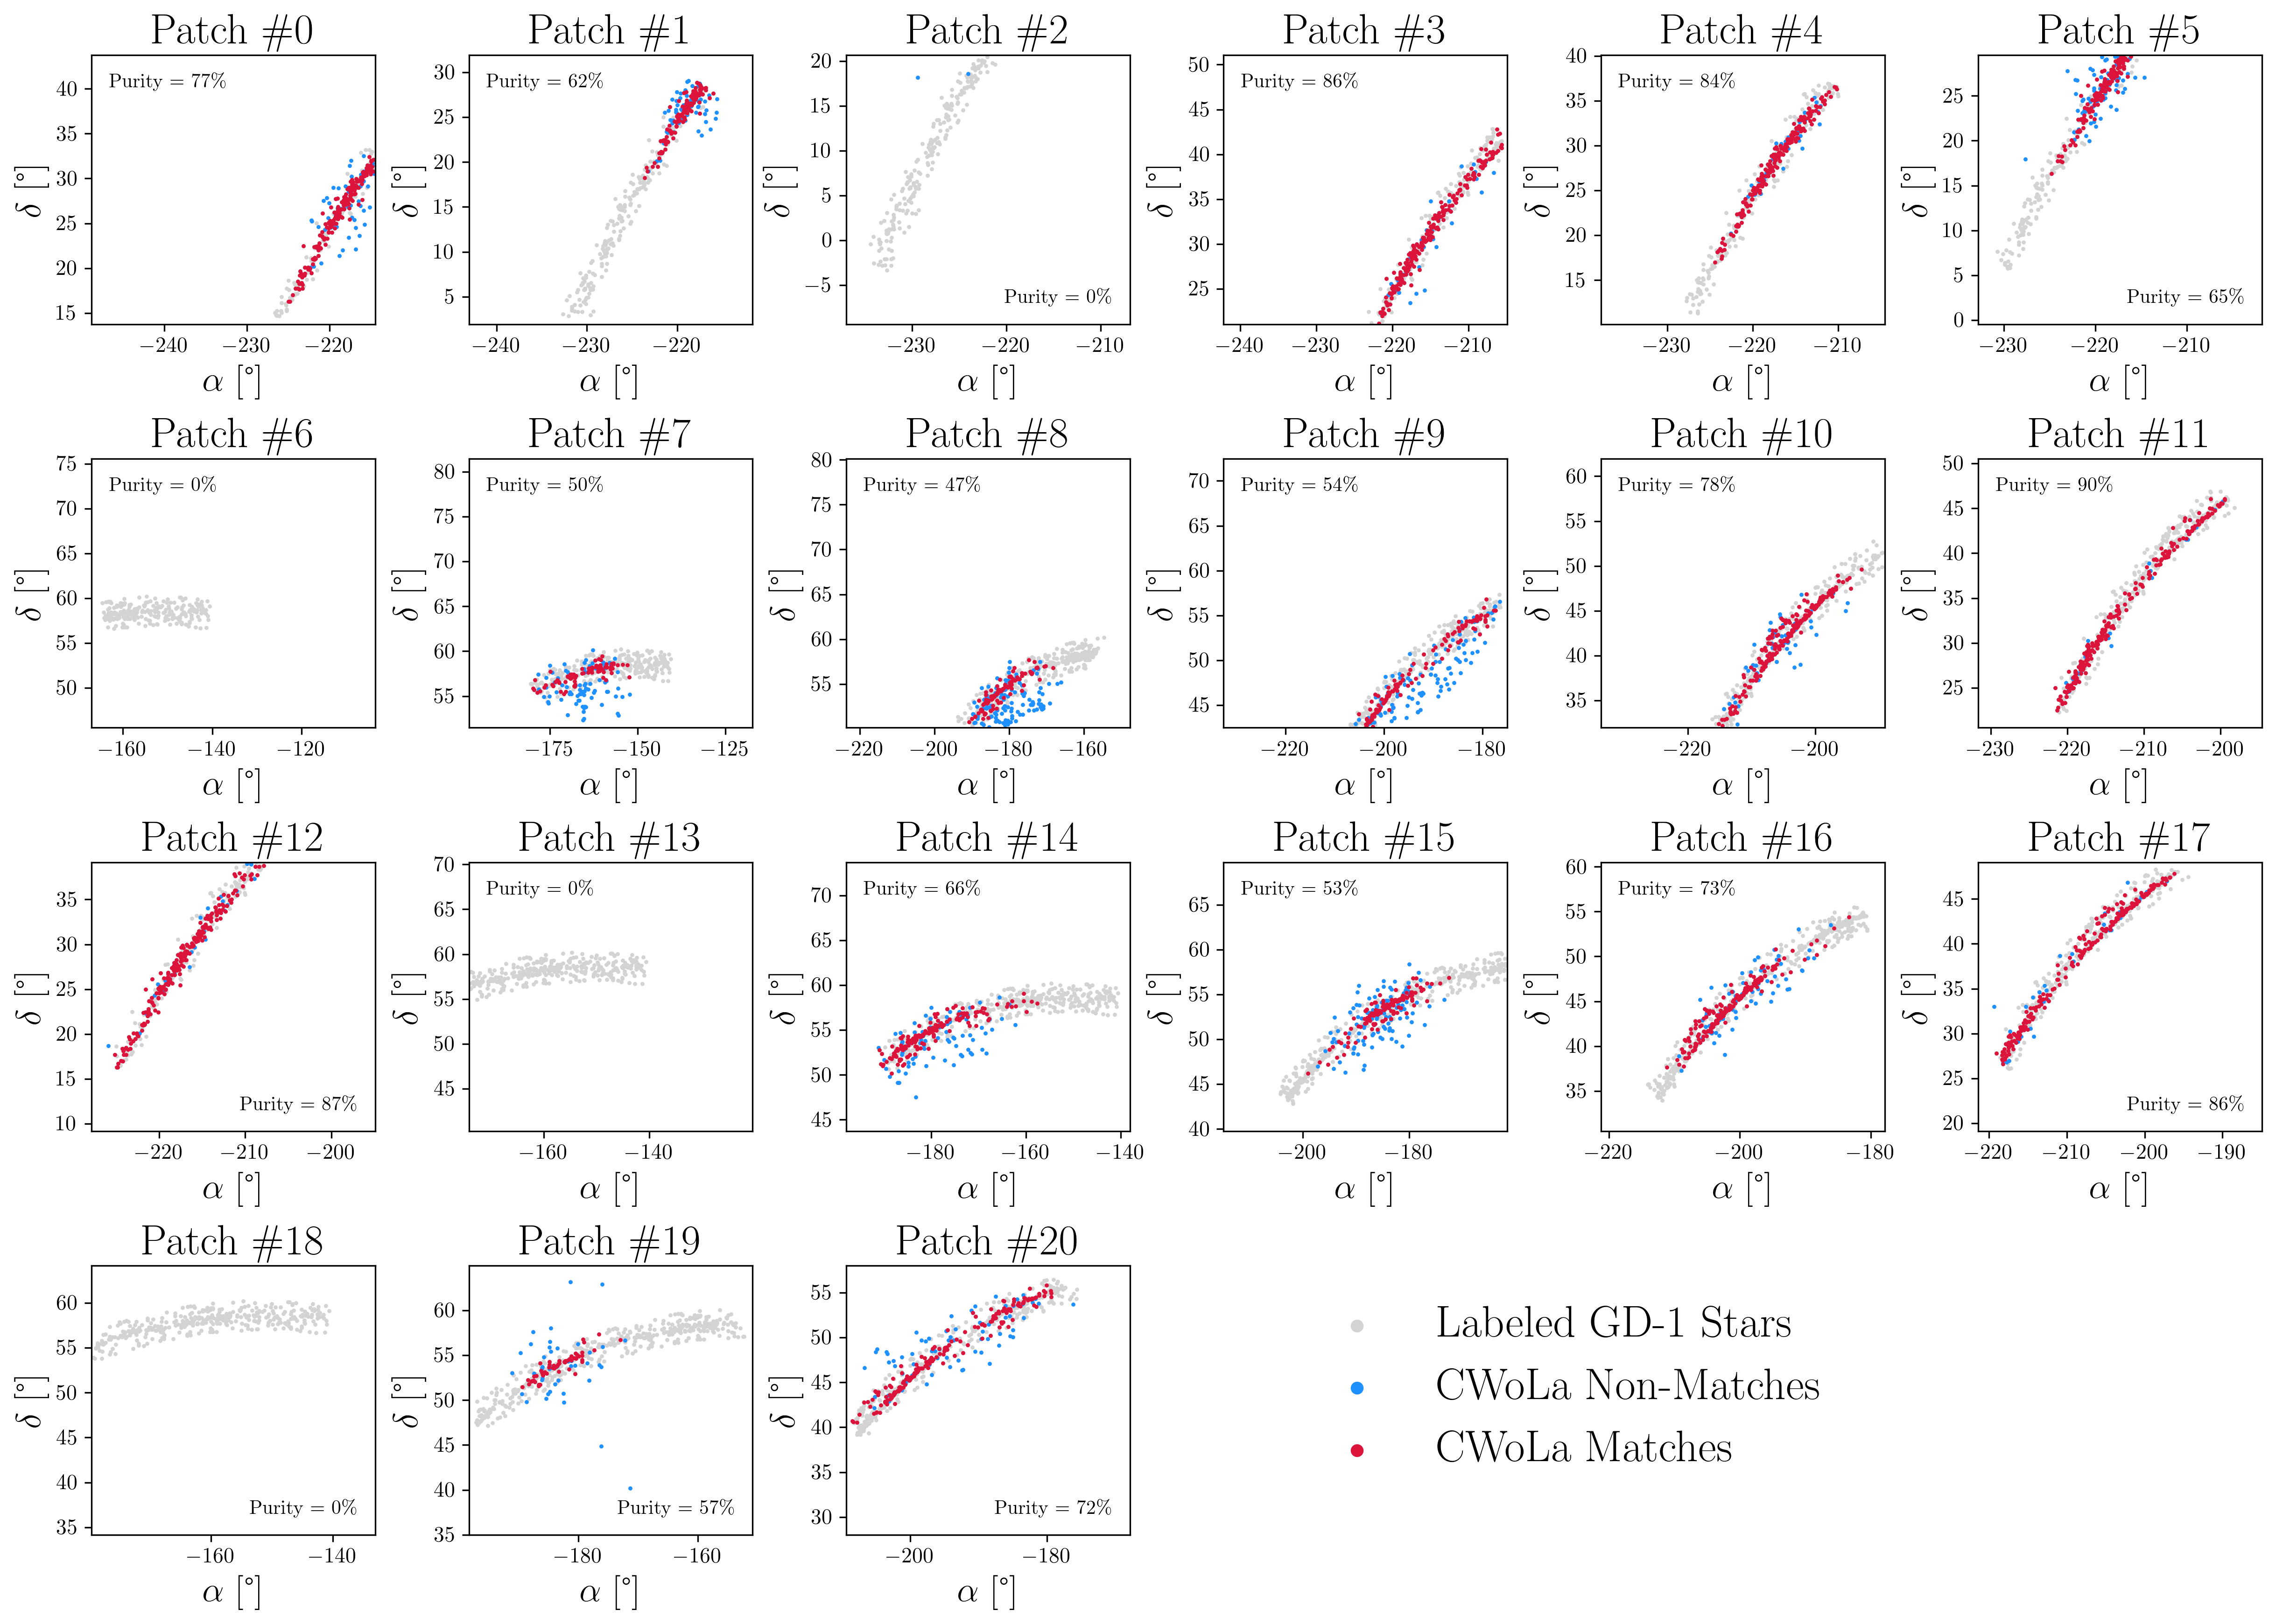

In [9]:
α_limits = []
δ_limits = []

for patch in df_all.patch_id.unique():
    test = df_all[df_all.patch_id == patch]
    α_min, α_max = np.min(test.α_wrapped - 360), np.max(test.α_wrapped - 360)
    δ_min, δ_max = np.min(test.δ), np.max(test.δ)
    α_limits.append([α_min, α_max])
    δ_limits.append([δ_min, δ_max])
    
fig, axs = plt.subplots(figsize=(20,14), nrows=4, ncols=6, dpi=300, tight_layout=False)
plt.subplots_adjust(wspace = 0.33, hspace=0.5) 

for i, ax in zip(np.arange(21), axs.ravel()):
    stream = all_gd1_stars_with_duplicates[all_gd1_stars_with_duplicates.patch_id == i]
    cwola = all_cwola_stars_with_duplicates[all_cwola_stars_with_duplicates.patch_id == i]

    try: 
        purity = 100*len(cwola[cwola.stream])/len(cwola)
        completeness = 100*len(cwola[cwola.stream])/len(stream)    
    except: 
        purity = 0
        completeness = 0

    markersize = 5
    ax.scatter(stream.α_wrapped - 360, stream.δ, marker='.', s=markersize, color="lightgrey", label="Labeled GD-1 Stars")
    ax.scatter(cwola[cwola.stream == False].α_wrapped - 360, cwola[cwola.stream == False].δ, marker='.', s=markersize, color="dodgerblue", label="CWoLa Non-Matches")
    ax.scatter(cwola[cwola.stream].α_wrapped - 360, cwola[cwola.stream].δ, marker='.', s=markersize, color="crimson", label="CWoLa Matches")
    if i == 20: ax.legend(fontsize=23, frameon=False,
              bbox_to_anchor=(1.5, 1.0), markerscale=5,
             )
    ax.set_xlabel(r"$\alpha$ [\textdegree]", fontsize=18);
    ax.set_ylabel(r"$\delta$ [\textdegree]", fontsize=18);
    ax.set_xlim(α_limits[i][0], α_limits[i][1]);
    ax.set_ylim(δ_limits[i][0], δ_limits[i][1]);
    ax.set_title("Patch \#{}".format(i), fontsize=22);
    loc = 'upper left'
    if i in [2,5,12,17,18,19,20]: 
        loc = 'lower right'
    anchored_text = AnchoredText("Purity = {:.0f}\%".format(purity), loc=loc, frameon=False)
    ax.add_artist(anchored_text)

    
fig.delaxes(axs[3][3])
fig.delaxes(axs[3][4])
fig.delaxes(axs[3][5])    
plt.savefig(os.path.join(save_folder,'patch_by_patch.pdf'))

# Figure 6: Stream coordinates histogram

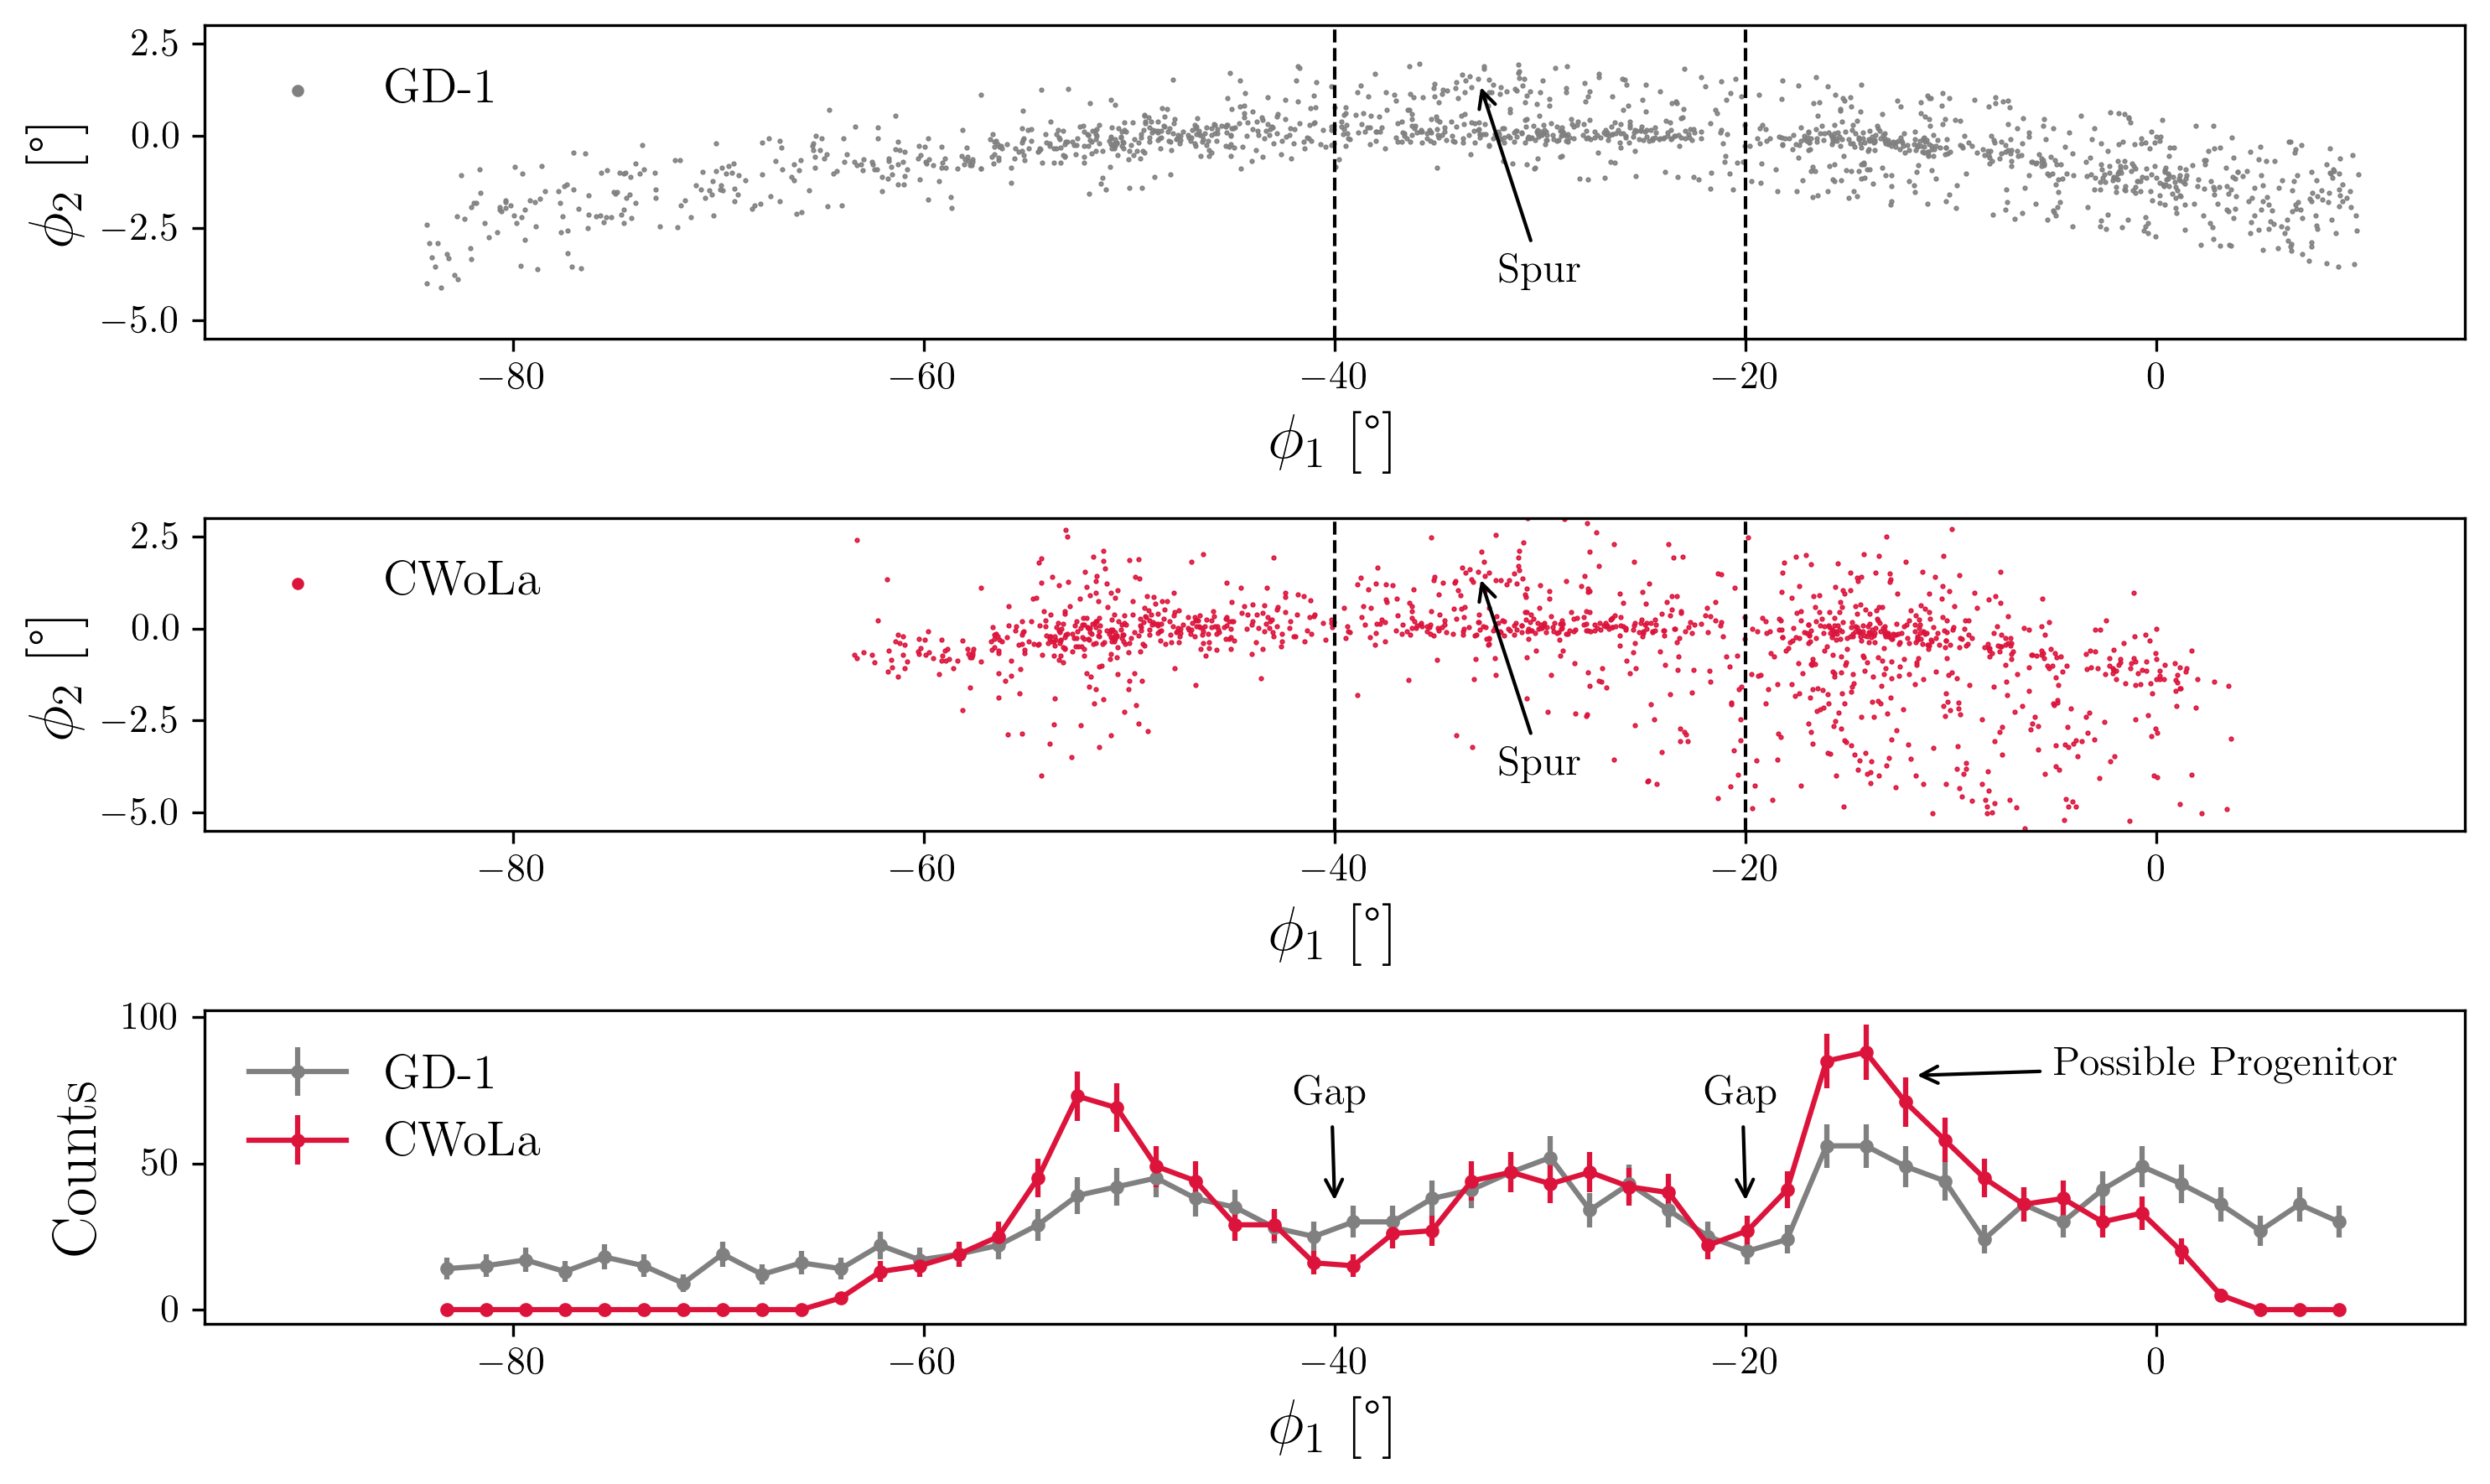

In [40]:
gd1_frame = GD1Koposov10()

### All GD-1 stars
coord_icrs = SkyCoord(ra=(all_gd1_stars['α_wrapped'] - 360)*u.degree, dec=all_gd1_stars.δ*u.degree, frame='icrs')
coord_gd1 = coord_icrs.transform_to(gd1_frame)
all_gd1_stars['ϕ1'] = coord_gd1.phi1.degree
all_gd1_stars['ϕ2'] = coord_gd1.phi2.degree

### CWoLa stars
coord_icrs = SkyCoord(ra=(all_cwola_stars['α_wrapped'] - 360)*u.degree, dec=all_cwola_stars.δ*u.degree, frame='icrs')
coord_gd1 = coord_icrs.transform_to(gd1_frame)
all_cwola_stars['ϕ1'] = coord_gd1.phi1.degree
all_cwola_stars['ϕ2'] = coord_gd1.phi2.degree

markersize = 1
fig, axs = plt.subplots(nrows=3, ncols=1, dpi=300, figsize=(10,6), tight_layout=True)

ax = axs[0]
ax.scatter(all_gd1_stars['ϕ1'], all_gd1_stars['ϕ2'], marker='.', s=markersize, color="gray", label="GD-1")
ax.legend(fontsize=14, frameon=False, markerscale=5)
ax.set_xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
ax.set_ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);
ax.axvline(-40,c='k',linestyle='dashed',lw=1)
ax.axvline(-20,c='k',linestyle='dashed',lw=1)
ax.annotate('Spur', fontsize=12, xy=(-33,1.5), xytext=(-32,-4), arrowprops=dict(arrowstyle='->'))
ax.set_ylim(-5.5,3)
ax.set_xlim(-95,15)

ax = axs[1]
ax.scatter(all_cwola_stars['ϕ1'], all_cwola_stars['ϕ2'], marker='.', s=markersize, color="crimson", label="CWoLa")
ax.legend(fontsize=14, frameon=False, loc='upper left', markerscale=5)
ax.set_xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
ax.set_ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);
ax.set_ylim(-5.5,3)
ax.set_xlim(-95,15)
ax.axvline(-40,c='k',linestyle="dashed",lw=1)
ax.axvline(-20,c='k',linestyle="dashed",lw=1)
ax.annotate('Spur', fontsize=12, xy=(-33,1.5), xytext=(-32,-4), arrowprops=dict(arrowstyle='->'))

ax = axs[2]
ax.set_xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
ax.set_xlim(-95,15);

bins = np.linspace(np.min(all_gd1_stars['ϕ1']),np.max(all_gd1_stars['ϕ1']),50)
counts_gd1, _   = np.histogram(all_gd1_stars['ϕ1'], bins=bins) 
counts_cwola, _ = np.histogram(all_cwola_stars['ϕ1'], bins=bins) 
ax.errorbar(0.5*(bins[1:]+bins[:-1]),counts_gd1, yerr=np.sqrt(counts_gd1),  marker='.',c='gray', label='GD-1')
ax.errorbar(0.5*(bins[1:]+bins[:-1]),counts_cwola, yerr=np.sqrt(counts_cwola), marker='.', c='crimson', label='CWoLa')
ax.legend(loc='upper left', frameon=False, fontsize=14);
ax.annotate('Gap', fontsize=12, xy=(-40,35), xytext=(-42,70), arrowprops=dict(arrowstyle='->'))
ax.annotate('Gap', fontsize=12, xy=(-20,35), xytext=(-22,70), arrowprops=dict(arrowstyle='->'))
ax.annotate('Possible Progenitor', fontsize=12, xy=(-12,80), xytext=(-5,80), arrowprops=dict(arrowstyle='->'))

ax.set_ylabel('Counts', fontsize=18);
plt.savefig(os.path.join(save_folder,"stream_frame.pdf"))

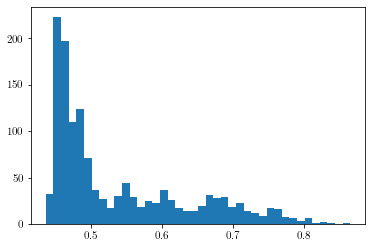

In [47]:
plt.hist(all_cwola_stars.nn_score, bins=40);

In [42]:
all_cwola_stars[all_cwola_stars['ϕ1'] < -60].nn_score

41      0.746771
86      0.678915
111     0.658946
113     0.656522
121     0.644746
144     0.622378
165     0.603255
211     0.561169
223     0.553309
236     0.545977
238     0.544116
243     0.541932
244     0.541213
245     0.540945
334     0.498547
442     0.451211
443     0.443538
885     0.607644
897     0.603099
935     0.585680
1162    0.449405
2379    0.682857
2387    0.679475
2437    0.657137
2505    0.630574
2540    0.612892
Name: nn_score, dtype: float32

# Figure 7: Spur & blob

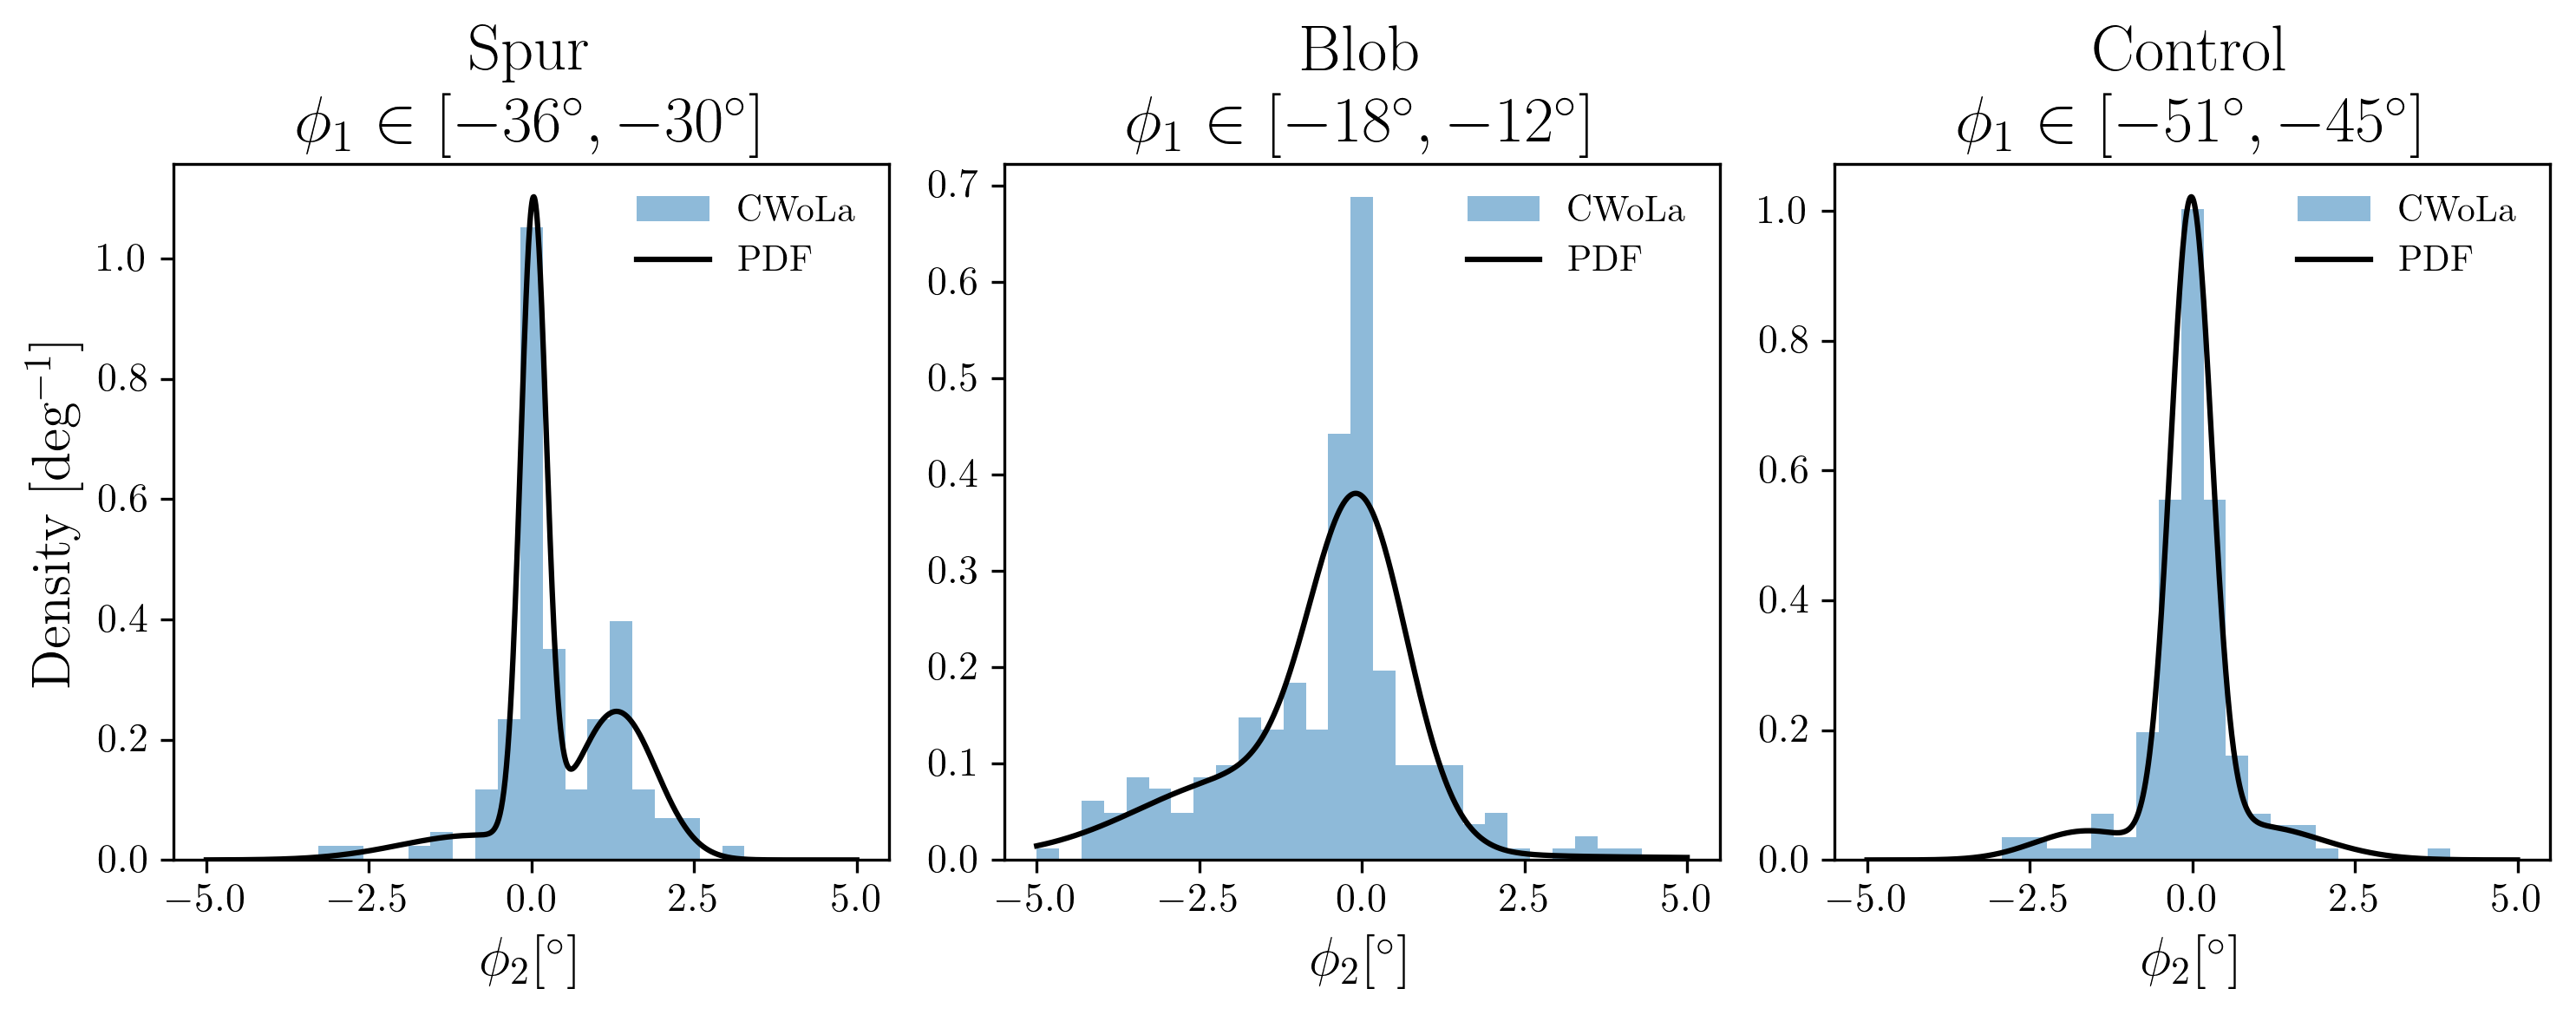

In [11]:
fig, axs = plt.subplots(dpi=300, nrows=1, ncols=3, tight_layout=True, figsize=(10,4))

spur = all_cwola_stars[(-36 <= all_cwola_stars['ϕ1']) & (all_cwola_stars['ϕ1'] <= -30)]
blob = all_cwola_stars[(-18 <= all_cwola_stars['ϕ1']) & (all_cwola_stars['ϕ1'] <= -12)]
control = all_cwola_stars[(-51 <= all_cwola_stars['ϕ1']) & (all_cwola_stars['ϕ1'] <= -45)]

bins = np.linspace(-5,5,30)
ax = axs[0]
ax.hist(spur['ϕ2'],bins=bins, density=True, alpha=0.5, label="CWoLa")
ax.set_title("Spur\n"+r"$\phi_1 \in [-36^{\circ},-30^{\circ}]$",fontsize=18);
ax.set_xlabel("$\phi_2 [^{\circ}]$", fontsize=15);
ax.set_ylabel(r"Density [deg$^{-1}$]", fontsize=15);

X = np.array(spur['ϕ2']).reshape(-1, 1)
gmm = GaussianMixture(n_components=3, ).fit(X)
x = np.linspace(-5, 5, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
ax.plot(x, pdf, '-k', label="PDF")
ax.legend(frameon=False, fontsize=10)

ax = axs[1]
ax.hist(blob['ϕ2'],bins=np.linspace(-5,5,30), density=True, alpha=0.5, label="CWoLa")
ax.set_title("Blob\n"+r"$\phi_1 \in [-18^{\circ},-12^{\circ}]$",fontsize=18);
ax.set_xlabel(r"$\phi_2 [^{\circ}]$", fontsize=15);

X = np.array(blob['ϕ2']).reshape(-1, 1)
gmm = GaussianMixture(3, means_init=np.array([0,-1,-1.5]).reshape(-1, 1)).fit(X)
x = np.linspace(-5, 5, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
ax.plot(x, pdf, '-k', label="PDF")
ax.legend(frameon=False, fontsize=10)

ax = axs[2]
ax.hist(control['ϕ2'],bins=np.linspace(-5,5,30), density=True, alpha=0.5, label="CWoLa")
ax.set_title("Control\n"+r"$\phi_1\in[-51^{\circ},-45^{\circ}]$",fontsize=18);
ax.set_xlabel(r"$\phi_2 [^{\circ}]$", fontsize=15);
X = np.array(control['ϕ2']).reshape(-1, 1)
gmm = GaussianMixture(3).fit(X)
x = np.linspace(-5, 5, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
ax.plot(x, pdf, '-k', label="PDF")
ax.legend(frameon=False, fontsize=10)

plt.savefig(os.path.join(save_folder,"gmm_3_component.pdf"))

# Figure 8: Cocoon

Bin width: -4.82
Sigmas from GMM: [[0.85394026]] [[0.999944]]


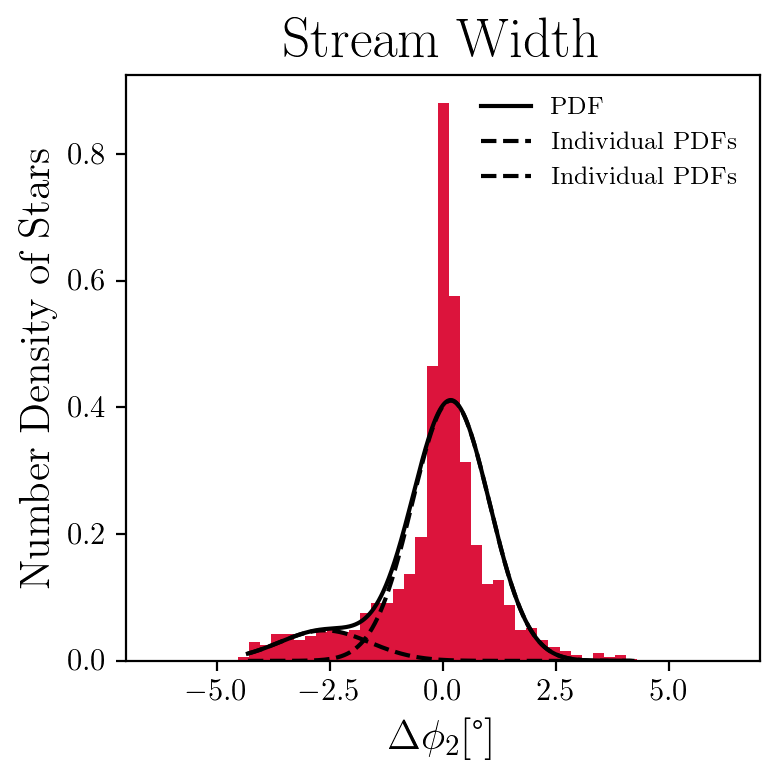

In [12]:
### make median-centered dataframe
n_bins = 15
bin_edges = np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(),n_bins)
print("Bin width: {:.2f}".format(bin_edges[0]-bin_edges[1]))
medians = []
stds = []
dfs = []
for i in range(len(bin_edges)-1):
    bin_min, bin_max = bin_edges[i], bin_edges[i+1]
    phi_bin = all_cwola_stars[(bin_min <= all_cwola_stars['ϕ1']) & (all_cwola_stars['ϕ1'] <= bin_max)].copy()
    medians.append(np.median(phi_bin['ϕ2']))
    stds.append(np.std(phi_bin['ϕ2']))
    phi_bin['ϕ2'] -= np.median(phi_bin['ϕ2'])
    dfs.append(phi_bin)
df = pd.concat(dfs)

### 3 sigma selection
df = df[np.abs(df['ϕ2']) < 3*df['ϕ2'].std()]

plt.figure(dpi=200, figsize=(4,4), tight_layout=True)
plt.hist(df['ϕ2'], bins=np.linspace(-6,6,50), density=True, color='crimson')
X = np.array(df['ϕ2']).reshape(-1, 1)
gmm = GaussianMixture(2, precisions_init=np.array([.1,1]).reshape(-1,1,1)).fit(X)
x = np.linspace(df['ϕ2'].min(),df['ϕ2'].max(), 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.plot(x, pdf, '-k', label="PDF")
plt.plot(x, pdf_individual, '--k', label="Individual PDFs")
plt.xlabel(r'$\Delta\phi_2$[\textdegree]',fontsize=15)
plt.title("Stream Width",fontsize=20)
plt.ylabel("Number Density of Stars", fontsize=15)
plt.xlim(-7,7);
plt.legend(frameon=False, fontsize=9);
plt.savefig(os.path.join(save_folder,"stream_width.pdf"))

gmm_stds = np.sqrt(gmm.covariances_)
print("Sigmas from GMM:", gmm_stds[0],gmm_stds[1])

Overdensities are centered at: [[-30.0523951 ]
 [-11.32937928]
 [-50.8794995 ]]


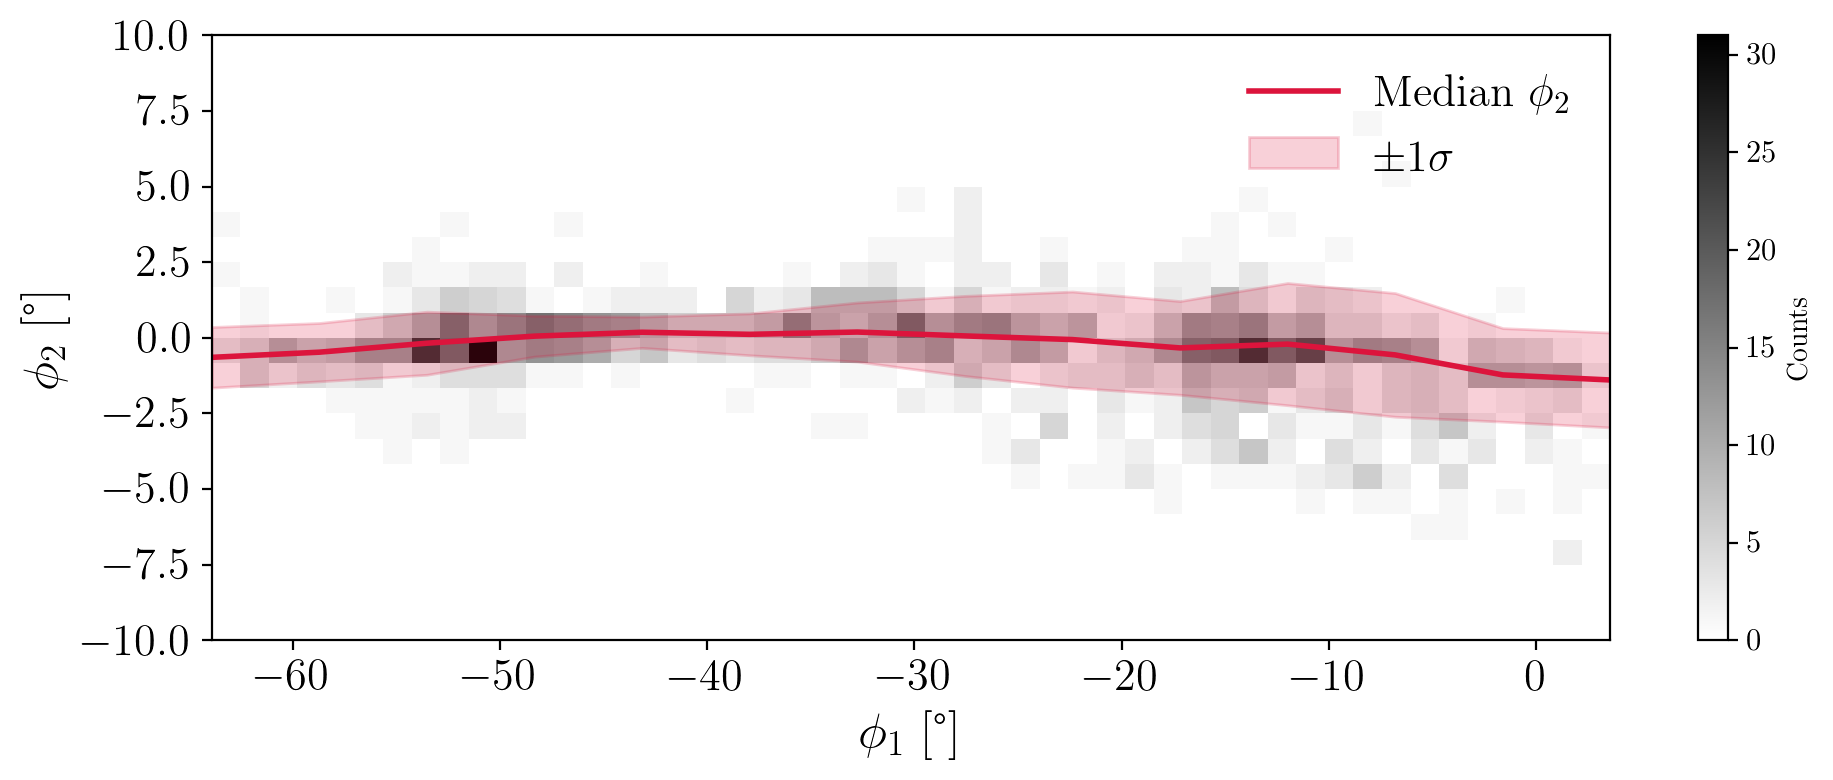

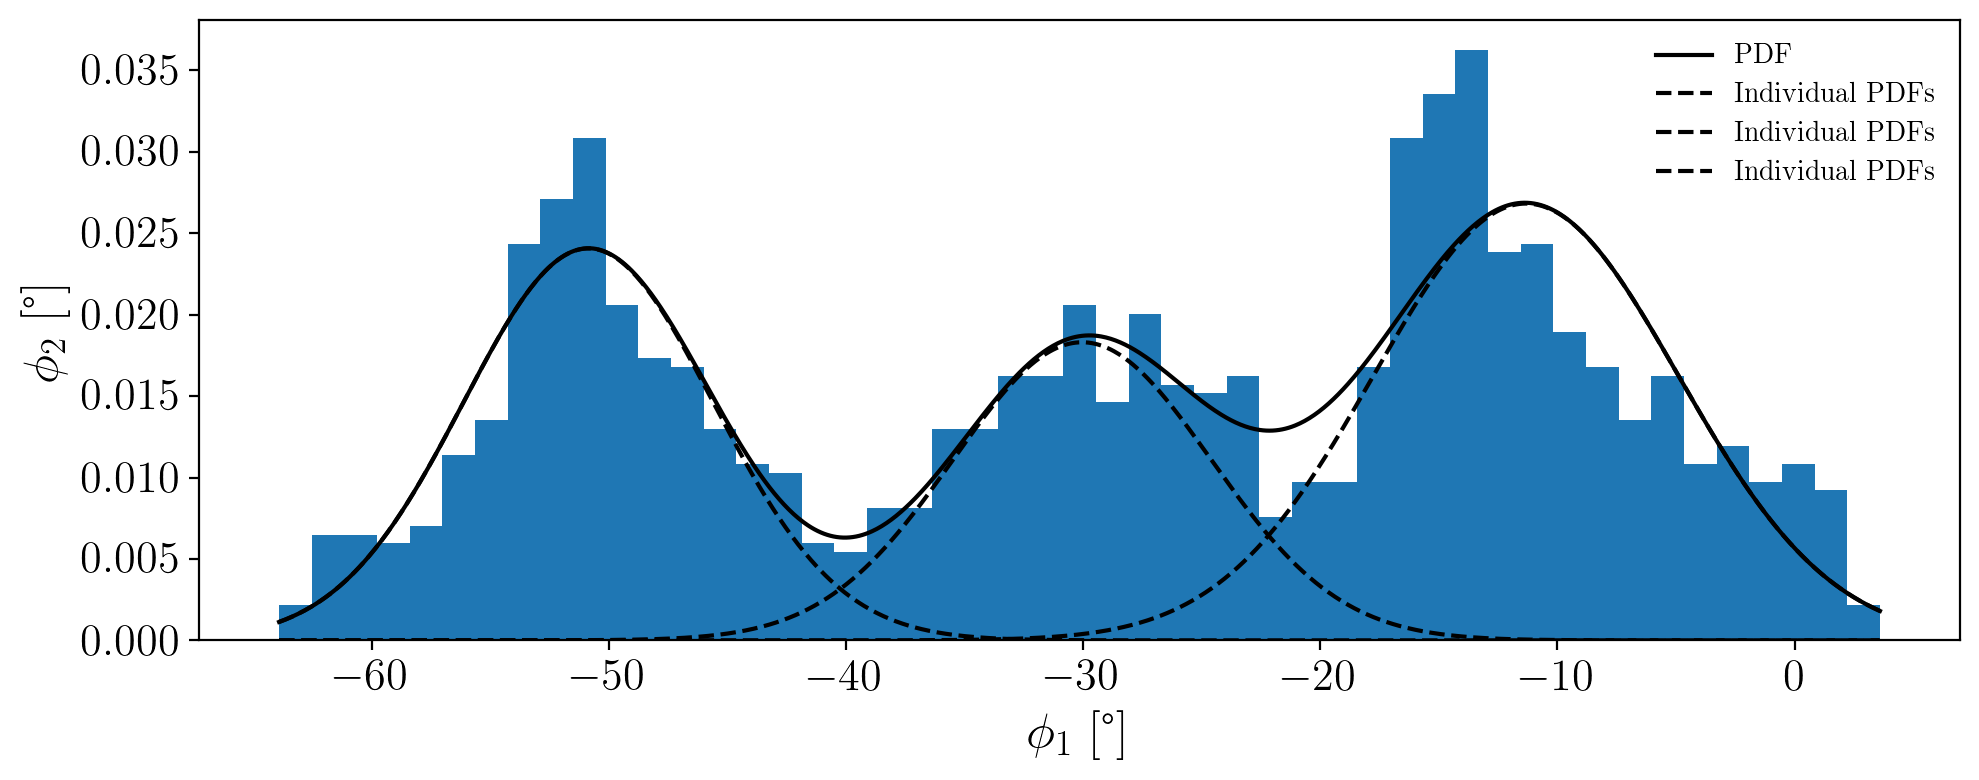

In [13]:
markersize = 5
x = np.histogram(all_cwola_stars['ϕ1'], bins=n_bins-2)[1]

plt.figure(dpi=200, figsize=(10,4), tight_layout=True)
my_cmap = copy.copy(matplotlib.cm.get_cmap('binary')) # copy the default cmap
my_cmap.set_bad((1,1,1))
plt.hist2d(all_cwola_stars['ϕ1'], all_cwola_stars['ϕ2'], 
           bins=[np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(),50),np.linspace(-10,10,25)], 
          cmap=my_cmap)
plt.plot(x, medians, color='crimson', alpha=1, linewidth=2, label=r"Median $\phi_2$")
plt.fill_between(x, np.array(medians), np.array(medians) - np.array(stds), color='crimson', alpha=0.2, label=r'$\pm 1\sigma$')
plt.fill_between(x, np.array(medians), np.array(medians) + np.array(stds), color='crimson', alpha=0.2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(frameon=False, labelcolor='k', fontsize=16)
plt.xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);
plt.colorbar(label="Counts")
plt.savefig(os.path.join(save_folder,"cwola_hist_median.pdf"))

plt.figure(dpi=200, figsize=(10,4), tight_layout=True)
plt.hist(df['ϕ1'], bins=np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(),50), density=True)#, #marker='.', s=markersize, color="crimson", label="CWoLa")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);
X = np.array(df['ϕ1']).reshape(-1, 1)
gmm = GaussianMixture(3).fit(X)
print("Overdensities are centered at:",gmm.means_)
x = np.linspace(all_cwola_stars['ϕ1'].min(),all_cwola_stars['ϕ1'].max(), 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
plt.plot(x, pdf, '-k', label="PDF")
plt.plot(x, pdf_individual, '--k', label="Individual PDFs")
plt.legend(frameon=False, fontsize=10);

# Figure 9: Promising GD-1 star candidates

60 promising GD-1 candidate stars found.


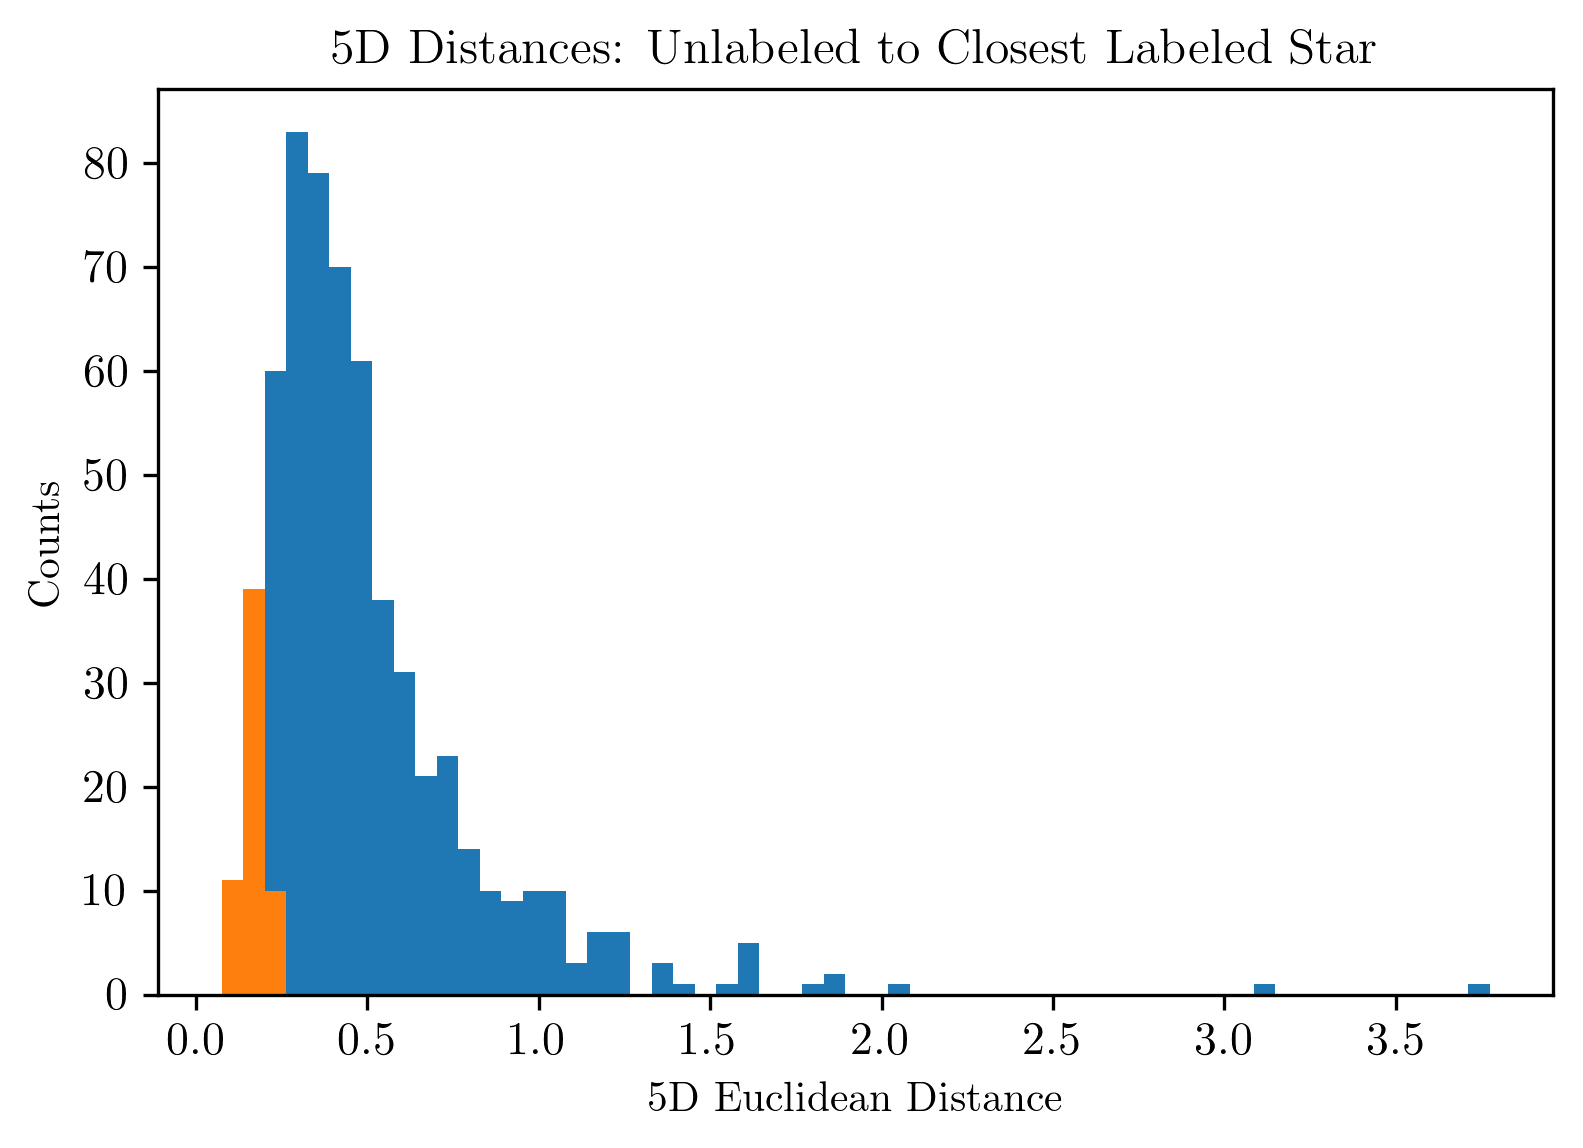

In [14]:
cols = ["μ_ϕcosλ", "δ", "α", "b-r", "g"]
for col in cols: 
    all_cwola_stars[col+"_normalized"] = (all_cwola_stars[col] - all_cwola_stars[col].mean())/all_cwola_stars[col].std()

cols_normalized = [key for key in all_cwola_stars.keys() if "normalized" in key]

labeled = all_cwola_stars[all_cwola_stars.stream == True]
unlabeled = all_cwola_stars[all_cwola_stars.stream == False]

dists = distance_matrix(labeled[cols_normalized].to_numpy(), unlabeled[cols_normalized].to_numpy())
closest_labeled = labeled.iloc[dists.argmin(axis=0)]
deltas = unlabeled[cols_normalized].to_numpy()-closest_labeled[cols_normalized].to_numpy()
distances = np.sqrt(np.sum(deltas**2, axis=1))
unlabeled['5d_distance'] = distances

promising = unlabeled[(unlabeled['5d_distance'] < unlabeled['5d_distance'].quantile(0.1))] # restrict to the top 100*x percent (so 0.1 = top 10%) 
print("{} promising GD-1 candidate stars found.".format(len(promising)))

plt.figure(dpi=300)
bins = np.linspace(np.min(unlabeled["5d_distance"]), np.max(unlabeled["5d_distance"]), 60)
plt.hist(unlabeled["5d_distance"], bins=bins)
plt.hist(promising["5d_distance"], bins=bins)
plt.title("5D Distances: Unlabeled to Closest Labeled Star");
plt.ylabel("Counts")
plt.xlabel("5D Euclidean Distance");
plt.savefig(os.path.join(save_folder,"5d_distance.png"))

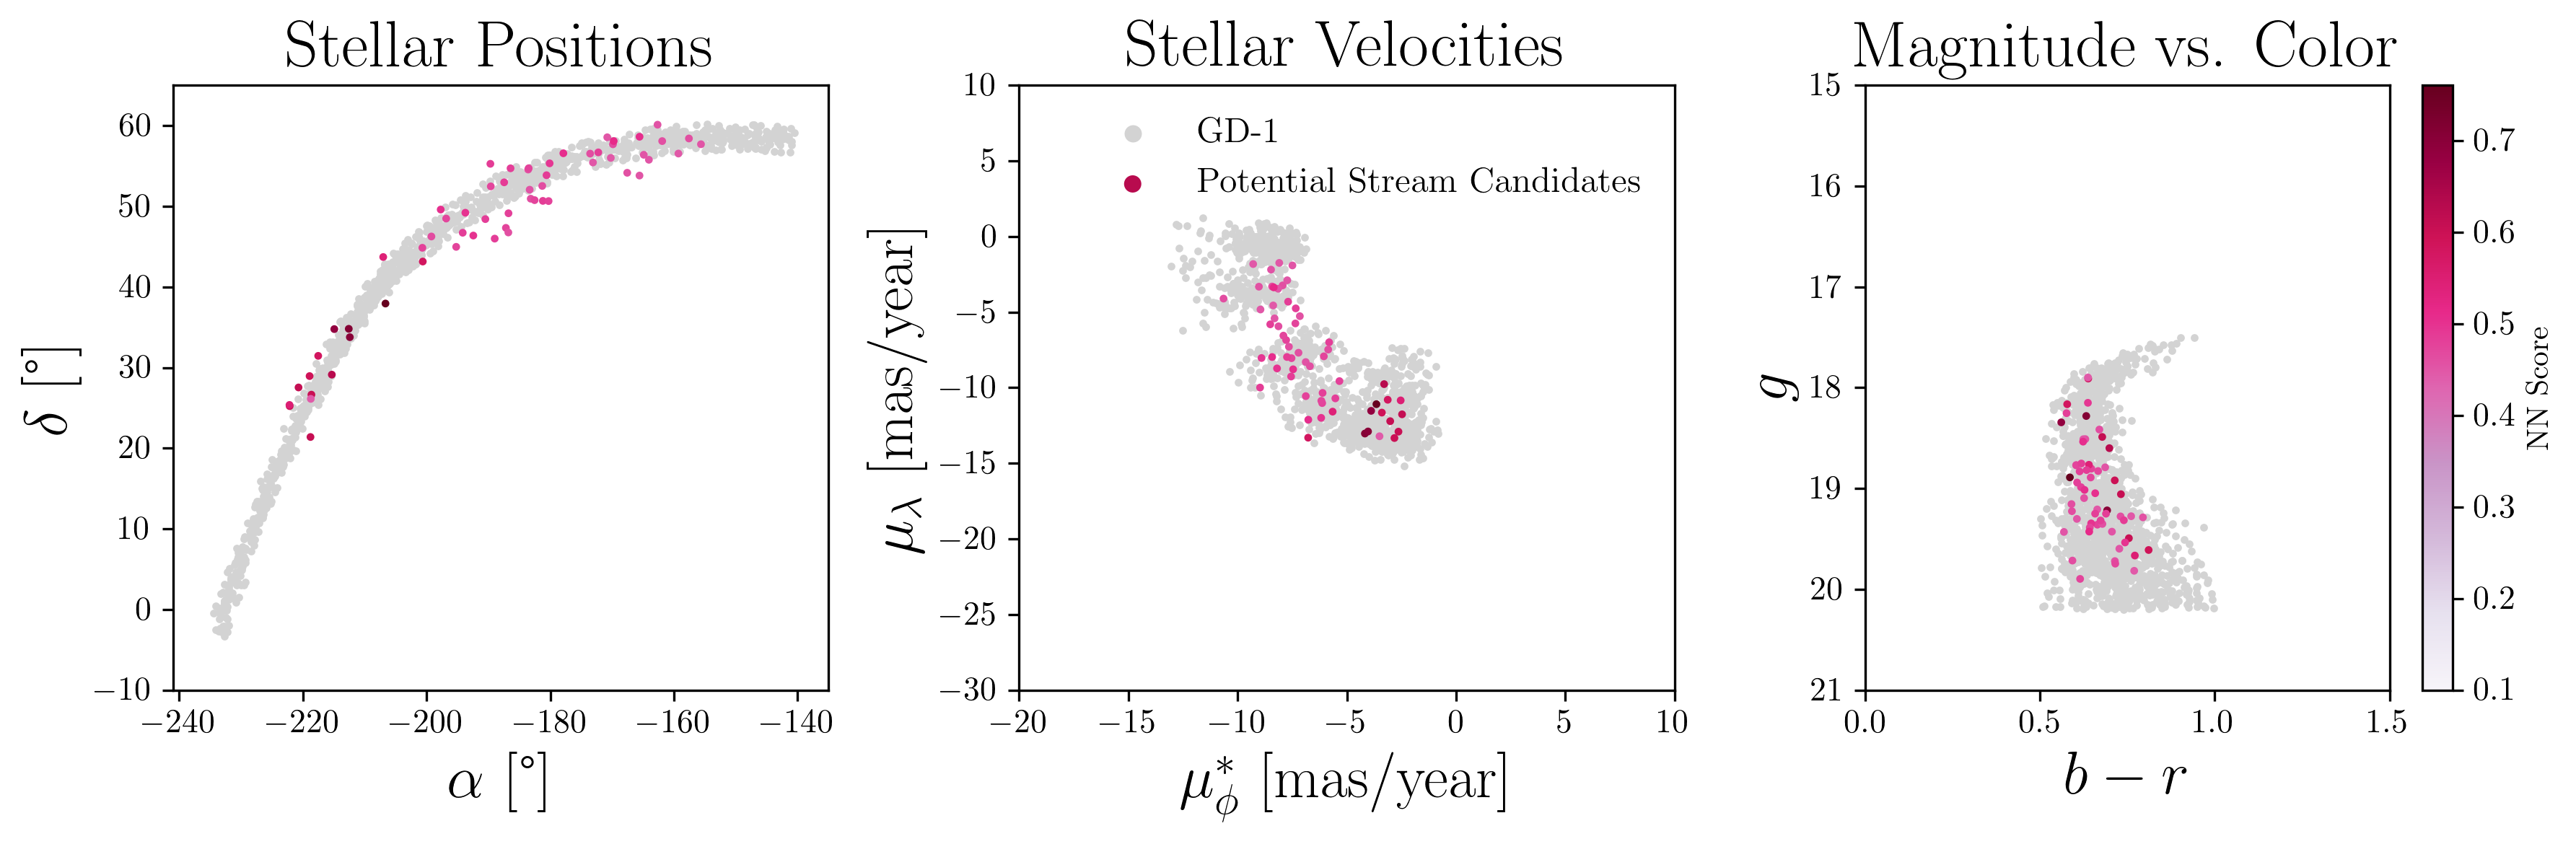

In [15]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(12,4), dpi=300, tight_layout=True)

markersize=10

ax = axs[0]
ax.set_title("Stellar Positions", fontsize=22)
ax.scatter(all_gd1_stars.α_wrapped - 360, all_gd1_stars.δ, color = "lightgray", marker='.', s=markersize, label="GD-1")
ax.scatter(promising.α_wrapped - 360, promising.δ, marker='.', 
           c = promising.nn_score,
           cmap="PuRd", vmin=0.1,
           s=markersize, label="Potential Stream Candidates")
ax.set_xlim(-241,-135);
ax.set_ylim(-10,65);
ax.set_xlabel(r"$\alpha$ [\textdegree]", fontsize=20)
ax.set_ylabel(r"$\delta$ [\textdegree]", fontsize=20);

ax = axs[1]
ax.set_title("Stellar Velocities", fontsize=22)
ax.scatter(all_gd1_stars['μ_ϕcosλ'], all_gd1_stars.μ_λ,  s=markersize, color = "lightgray", marker='.', label="GD-1")
ax.scatter(promising['μ_ϕcosλ'], promising.μ_λ, marker='.', s=markersize, 
           c = promising.nn_score,
           cmap="PuRd", vmin=0.1,
           label="Potential Stream Candidates")
ax.set_xlim(-20,10);
ax.set_ylim(-30,10);
ax.set_xlabel(r"$\mu_{\phi}^*$ [mas/year]", fontsize=20)
ax.set_ylabel(r"$\mu_{\lambda}$ [mas/year]", fontsize=20);
ax.legend(frameon=False, fontsize=12, markerscale=3);

ax = axs[2]
ax.set_title("Magnitude vs. Color", fontsize=22)
ax.scatter(all_gd1_stars['b-r'], all_gd1_stars.g, s=markersize, color = "lightgray", marker='.', label="GD-1")
scatter = ax.scatter(promising['b-r'], promising.g, marker='.', s=markersize, 
           c = promising.nn_score,
           cmap="PuRd", vmin=0.1,
           label="Potential Stream Candidates")
ax.set_xlabel(r"$b-r$", fontsize=20)
ax.set_ylabel(r"$g$", fontsize=20);
ax.set_xlim(0,1.5);
ax.set_ylim(15,21);
ax.invert_yaxis();

fig.colorbar(scatter, label="NN Score");
plt.savefig(os.path.join(save_folder,"promising_triptych.pdf"))

In [16]:
promising_to_save = promising[["patch_id","α_wrapped","δ","μ_ϕcosλ","μ_λ","b-r","g","5d_distance","nn_score"]]
promising_to_save = promising_to_save.sort_values('nn_score',ascending=False)
promising_to_save.reset_index(inplace=True, drop=True)
promising_to_save.to_hdf("promising_stars.h5", "df")
pd.read_hdf("promising_stars.h5")

patch_id   α_wrapped          δ    μ_ϕcosλ        μ_λ       b-r  \
0          3  153.343750  37.944386  -3.648079 -11.087369  0.585669   
1          3  147.407532  34.807056  -4.174263 -13.030541  0.632448   
2          3  147.581451  33.771442  -4.031364 -12.893708  0.692181   
3          3  145.067444  34.774712  -3.889829 -11.528839  0.560968   
4          0  144.668640  29.123871  -3.294825  -9.761044  0.698603   
5          0  139.284058  27.534752  -2.474001 -11.759004  0.678160   
6          0  141.217377  21.388325  -3.016653 -12.211497  0.731615   
7          0  141.366760  26.641132  -2.638692 -12.904817  0.754404   
8          0  137.850464  25.221642  -2.823553 -13.327346  0.713997   
9          0  141.072662  28.944424  -3.398272 -11.644784  0.810871   
10        10  159.375610  43.155155  -6.771805 -13.304443  0.577917   
11         0  142.465027  31.453848  -3.129723 -10.795928  0.638067   
12         0  137.821594  25.365973  -2.537415 -10.836835  0.771456   
13        10  152.977966  43.714725  -5.651521 -11.580858  0.640087   
14        14  190.253159  58.102585  -8.347640  -3.359662  0.640982   
15        14  194.429871  58.634842  -8.420991  -7.967748  0.623426   
16        15  182.109512  56.585564  -6.765204 -12.116959  0.627577   
17        16  162.275238  49.602287  -7.460149  -8.779883  0.658072   
18        16  166.262054  49.207397  -8.196286  -8.721247  0.743465   
19         9  167.548462  46.377983  -6.176190 -11.992228  0.646498   
20        14  179.886322  55.335400  -8.907069  -8.033201  0.637199   
21        15  172.536072  52.980537  -7.740779  -7.965540  0.740067   
22        15  170.305725  55.276653  -8.972501  -9.987629  0.618397   
23         8  178.793396  50.679008  -7.688651  -4.308014  0.688902   
24        19  179.387024  53.861988  -7.553021  -9.258564  0.633465   
25        14  173.568787  54.718918  -8.506504  -5.805184  0.657850   
26         9  169.494263  48.418388  -6.111476 -10.342608  0.673502   
27         8  187.757996  56.693752  -7.339619  -4.749725  0.576080   
28         9  165.833618  46.725655  -5.527166 -10.702893  0.613531   
29         9  171.009125  45.997330  -5.812016  -6.994314  0.617441   
30         9  173.235535  49.141151  -5.340712  -9.560485  0.606213   
31         8  179.718201  50.653923  -7.778558  -6.846837  0.664310   
32         9  159.310638  44.860550  -6.879270 -10.555117  0.646944   
33         9  164.777161  44.976212  -6.129719 -11.014638  0.603947   
34         9  176.500488  54.726501  -7.533120  -8.043803  0.614882   
35        19  177.458374  50.769260  -7.356768  -5.745450  0.645157   
36         9  172.817383  47.330818  -6.053680  -7.922386  0.642633   
37         9  163.159119  48.486298  -6.168635 -10.865490  0.666342   
38        15  170.374420  52.475494  -7.904741  -6.552203  0.715446   
39         9  160.771454  46.261520  -5.855455  -7.474462  0.591482   
40         7  186.439041  56.541378 -10.644468  -4.102360  0.592939   
41         8  178.696075  52.531986  -7.652631  -7.286445  0.669975   
42         7  190.129303  57.698757  -8.130330  -5.936471  0.590197   
43         8  176.834106  50.947758  -7.213428  -7.684932  0.678570   
44         9  173.211731  46.760998  -6.690597  -8.577130  0.730625   
45         7  202.413101  58.419315  -8.423603  -3.303266  0.626270   
46         7  198.092728  58.096100  -7.937617  -3.228269  0.629757   
47         8  176.415344  54.566105  -7.152437  -5.265400  0.794621   
48         7  192.434601  54.163914  -9.025725  -3.314333  0.714384   
49         7  197.343521  60.127289  -8.470557  -2.185798  0.705921   
50         8  176.661682  52.064625  -6.882434  -8.300988  0.686596   
51         7  194.420959  53.819744  -7.492790  -1.907870  0.605728   
52         7  195.111771  56.396278  -8.144449  -3.451988  0.727108   
53         7  204.361725  57.704208  -8.309439  -5.412242  0.568638   
54         7  195.939850  55.778358  -7.729141  -2.890564  0.624128   
55         7  189.208954  58

# Figure 10: Example scan

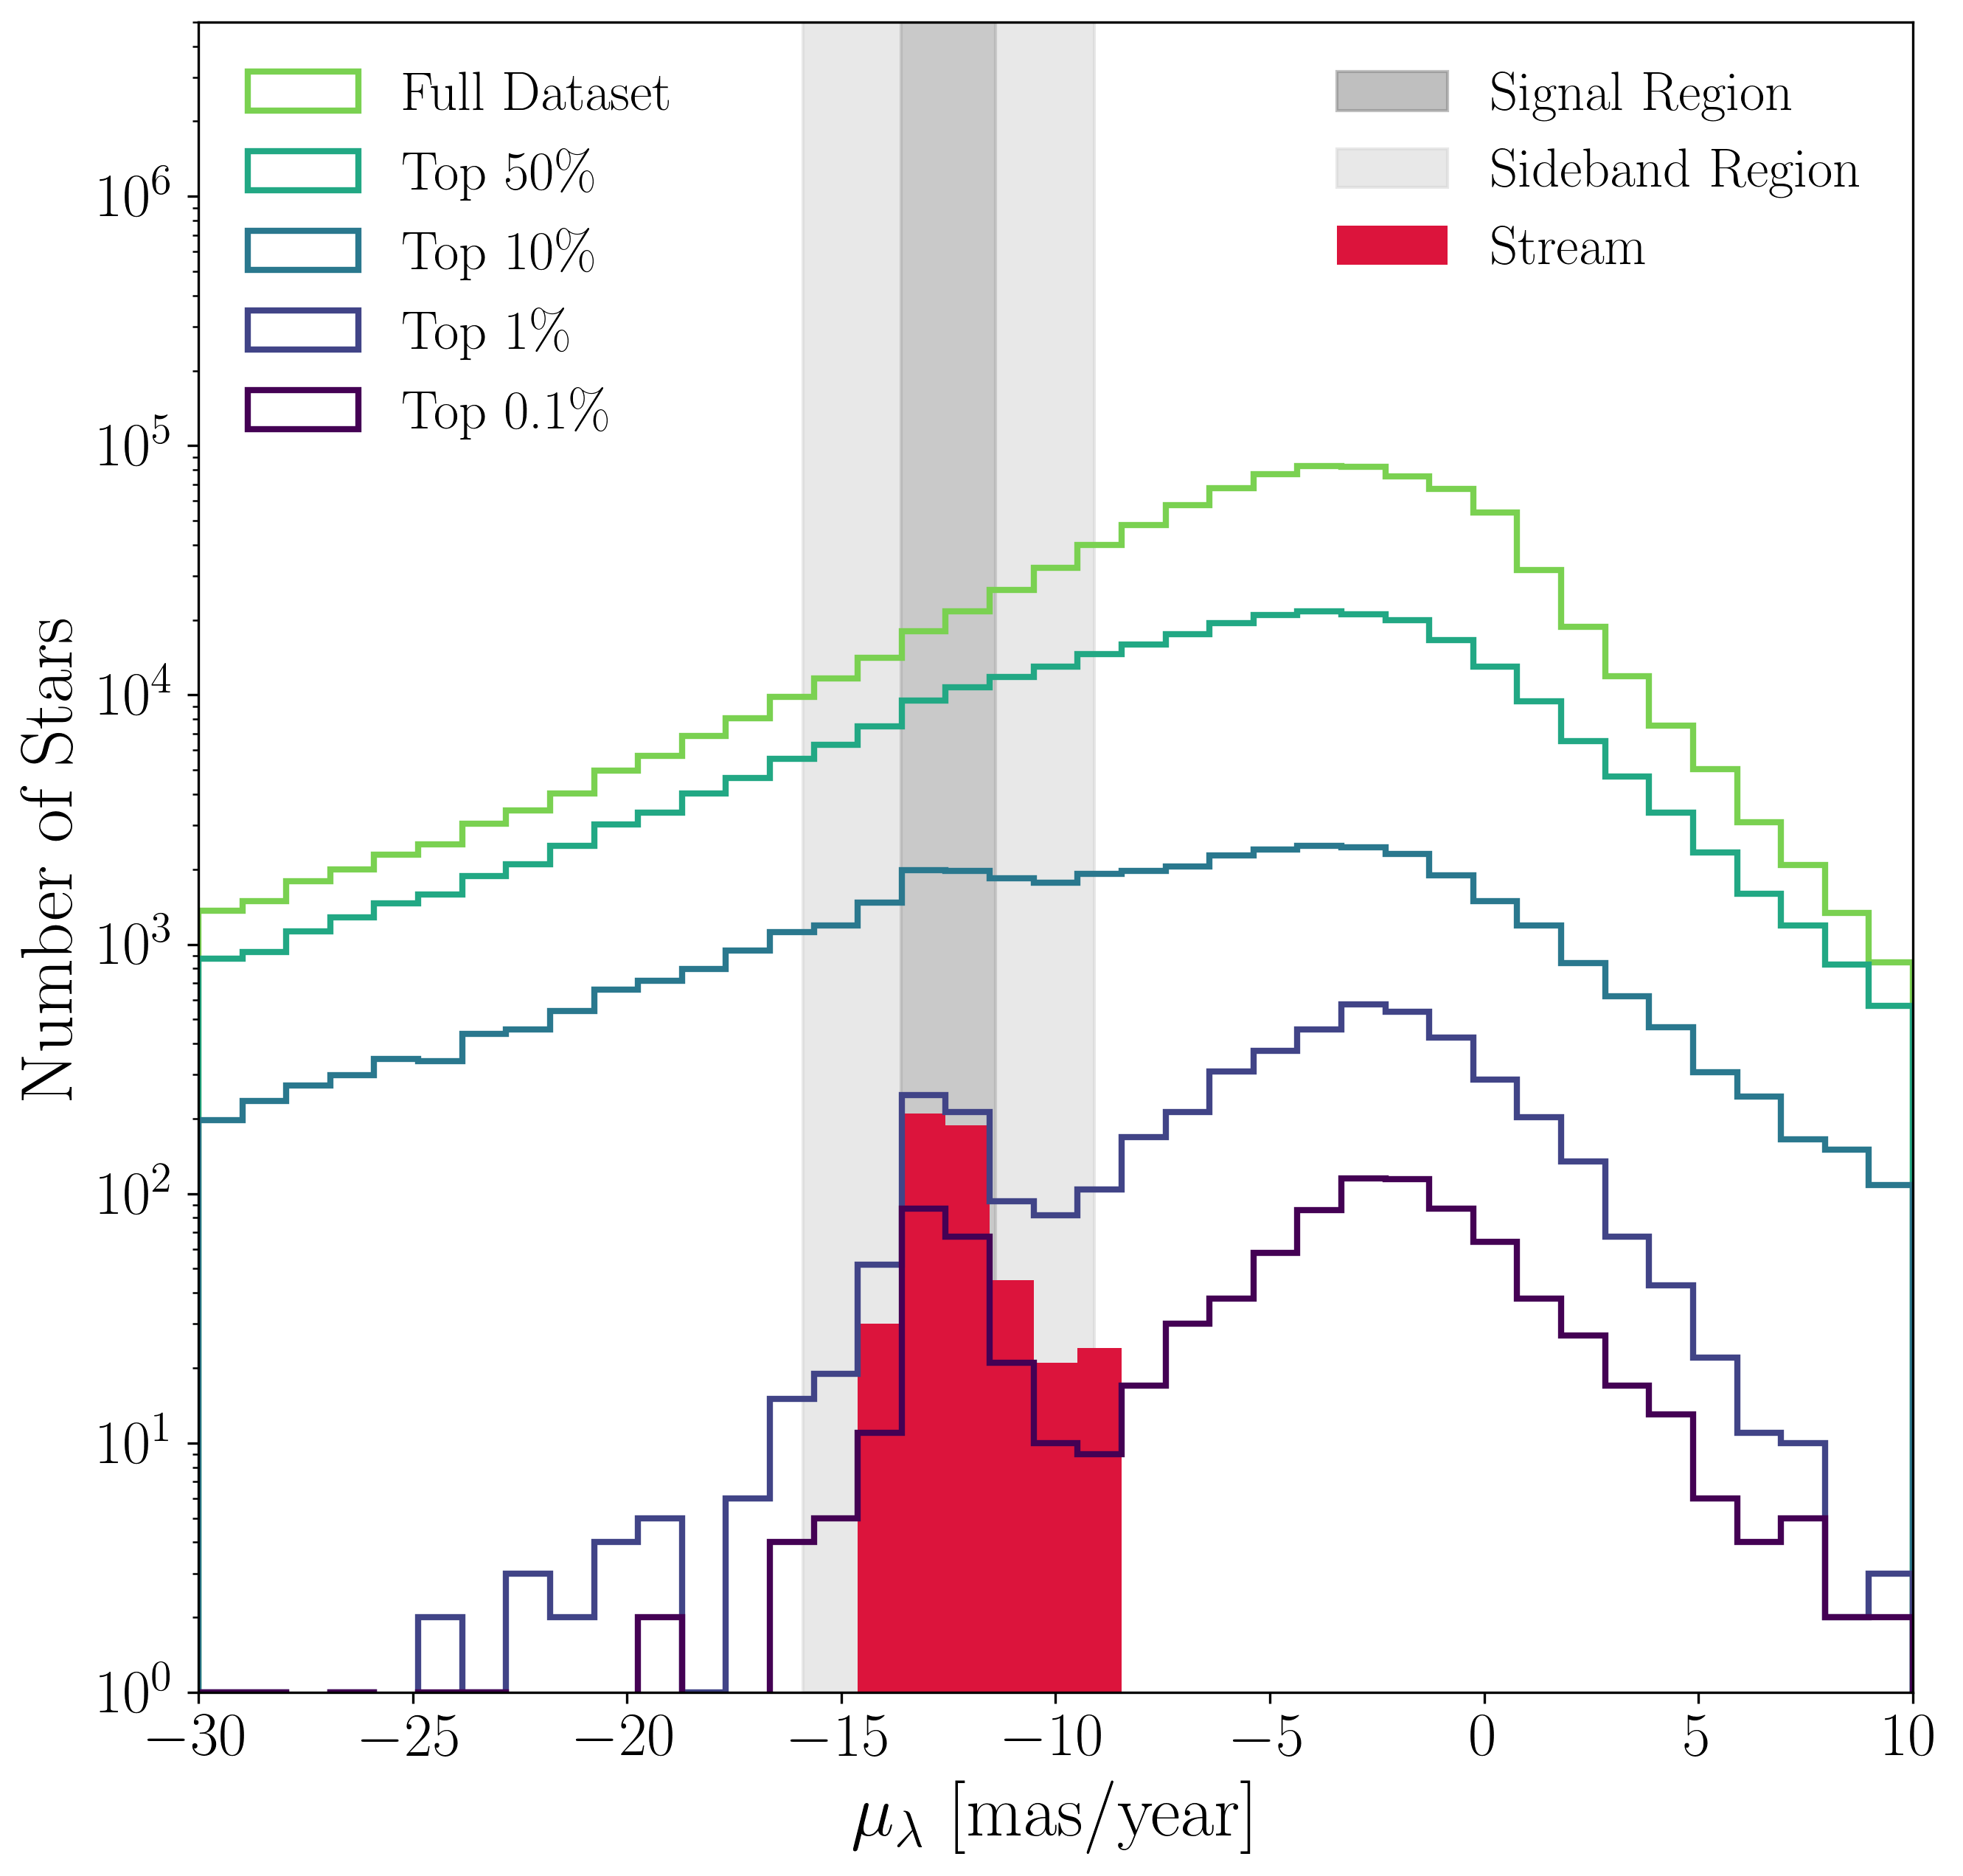

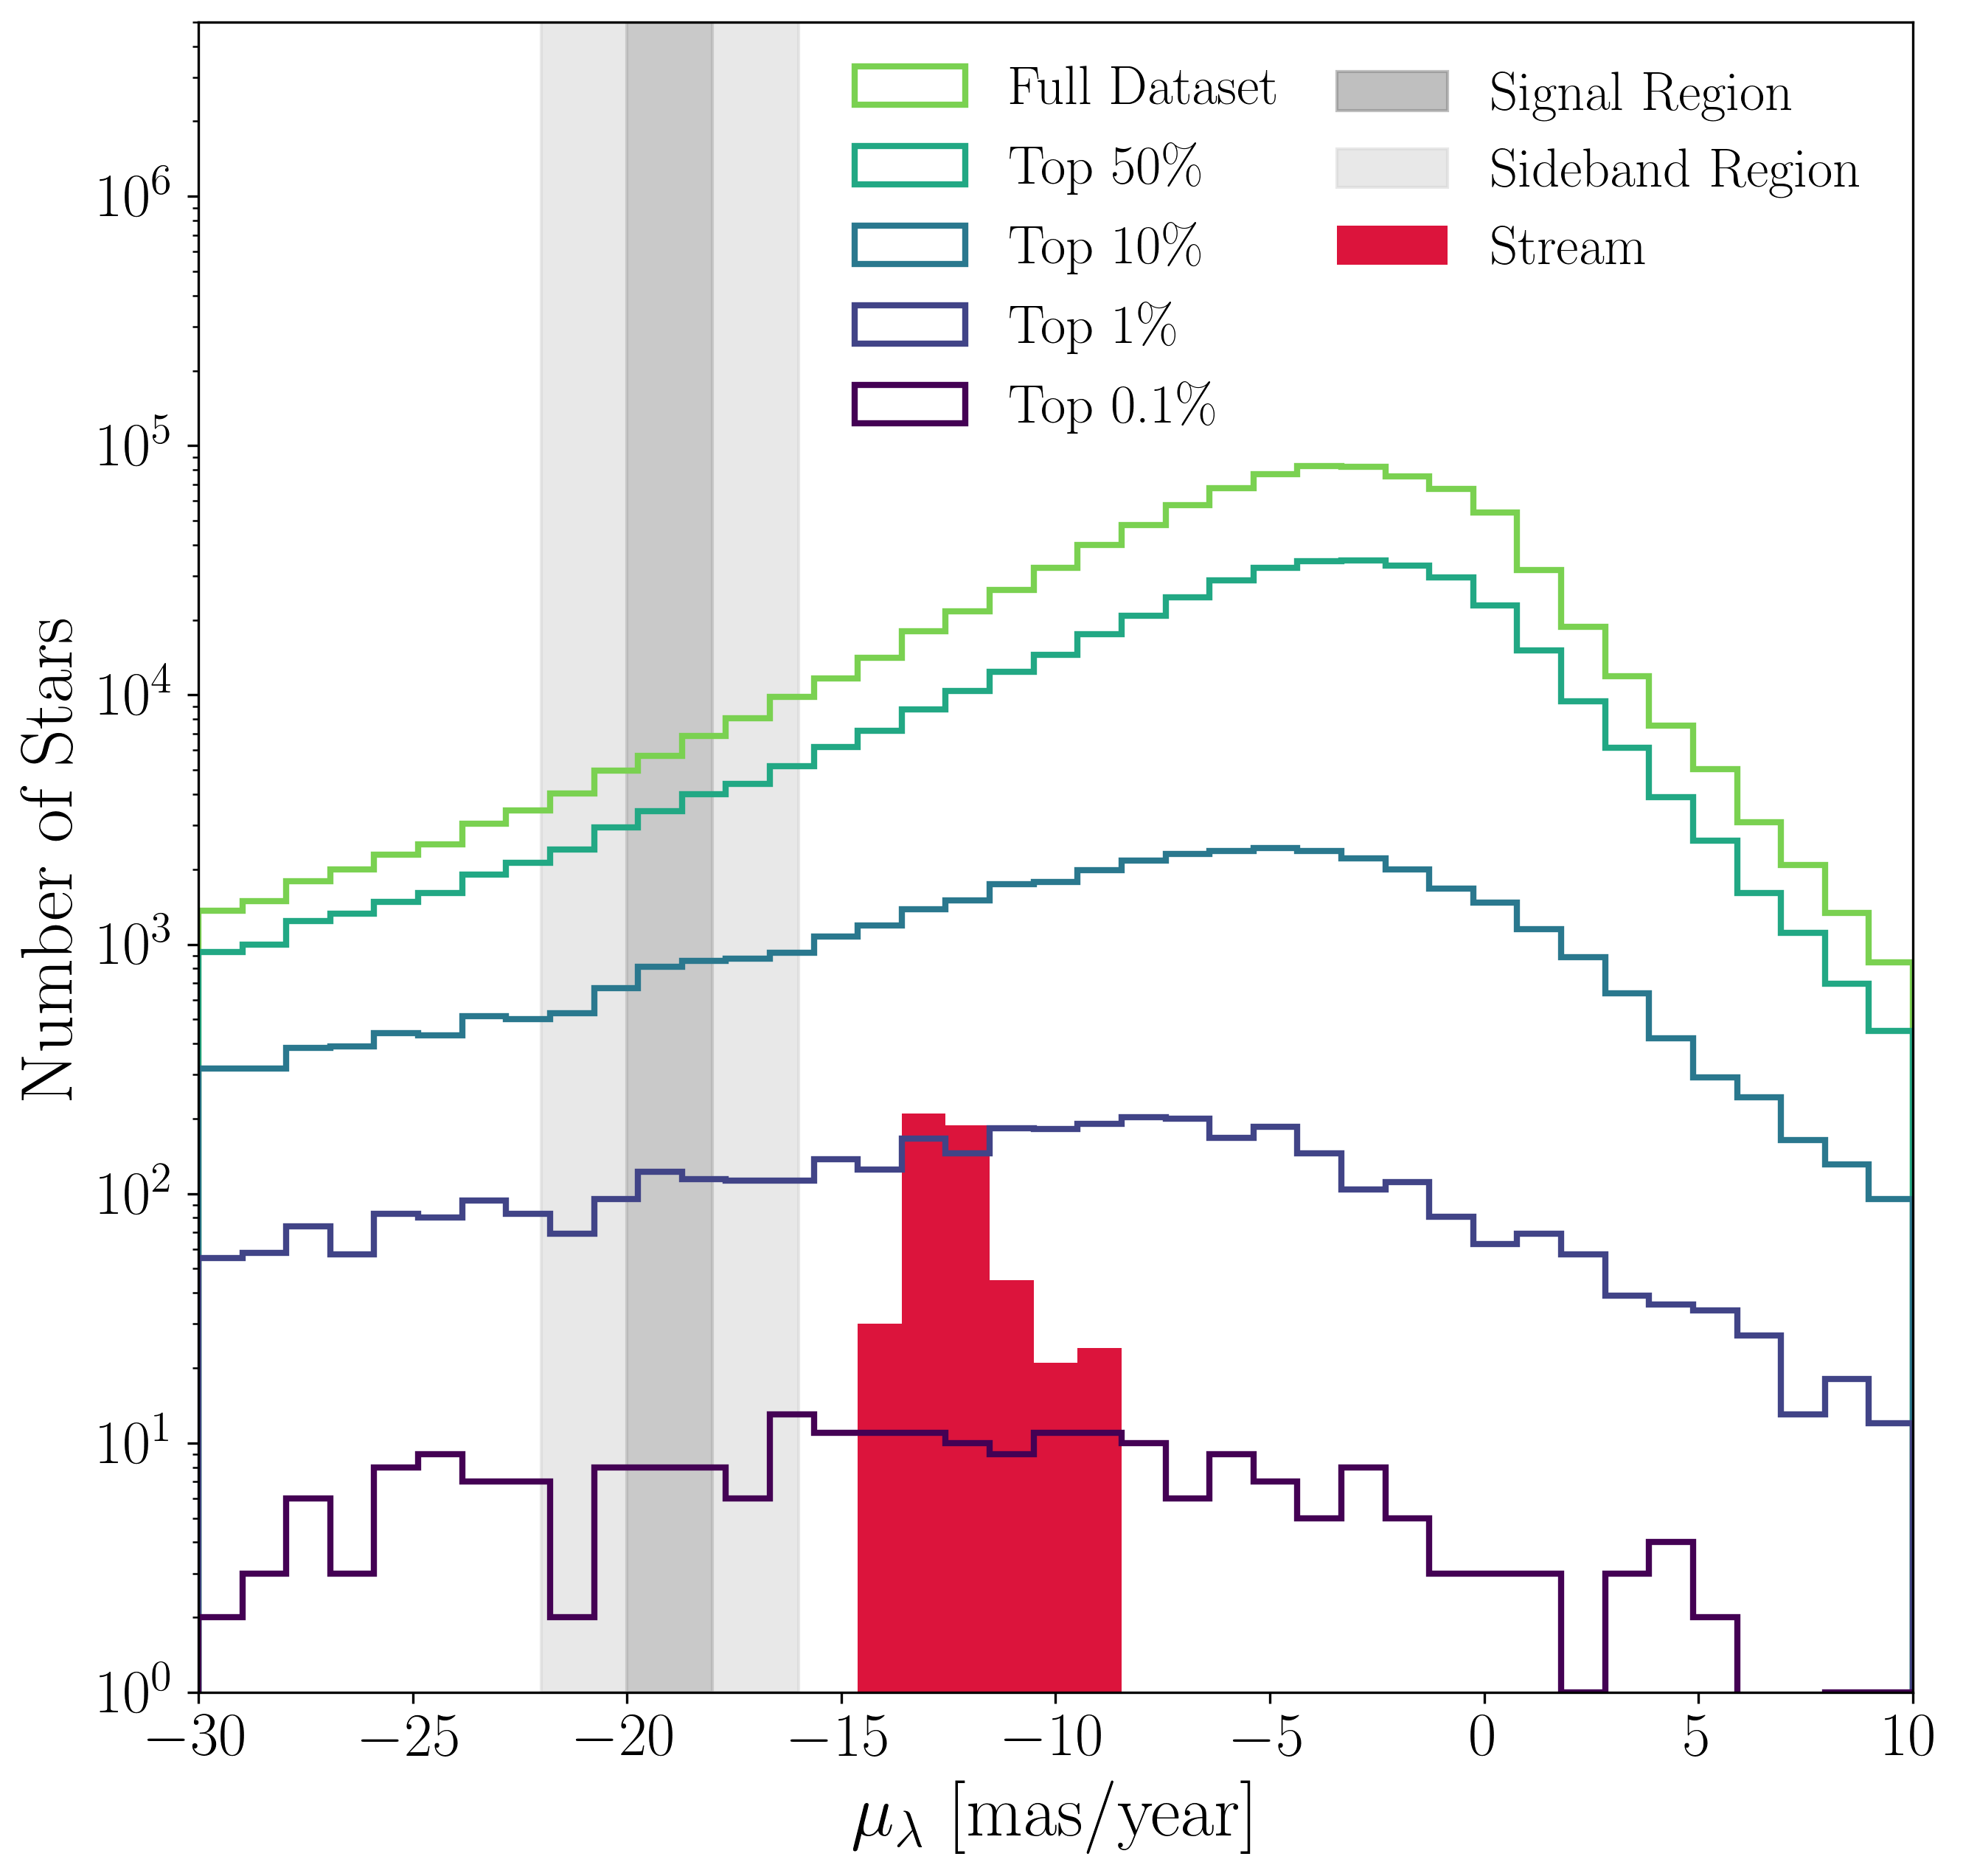

In [17]:
### With bump 
df = pd.read_hdf('../gaia_data/scan_bump_cwola.h5')
cuts = [0.,0.5,0.9,0.99, 0.999]

plt.figure(figsize = (10, 10), dpi = 300)
bins = np.linspace(-30, 10, 40)

l1 = plt.axvspan(-13.6, -11.4, alpha=0.5, color='gray', label = 'Signal Region')
l2 = plt.axvspan(-15.9, -9.1, alpha = 0.5, color = 'lightgray', label = 'Sideband Region')
plt.xlabel(r'$\mu_\lambda$ [mas/year]', fontsize = 24)
plt.ylabel('Number of Stars', fontsize = 24)
plt.xlim(-30, 10)
plt.ylim([1, 5e6])
plt.yscale('log')
plt.tick_params(labelsize=20)

labels = ['Full Dataset', 'Top 50\%', 'Top 10\%', 'Top 1\%', 'Top 0.1\%']
thresholds = [0.1032368540763855, 0.3231506943702698, 0.3529723048210144, 0.4468141984939546, 0.6058574247360222]
cmap = plt.cm.get_cmap('viridis')
cut_legend = []
for j in range(len(cuts)):
    cut = cuts[j]
    X_pass_all = df[(df["nn_score_avg"] > thresholds[j])]
    l = plt.hist(X_pass_all.μ_λ, bins = bins, color = cmap(0.8 - j/5), alpha = 1, histtype = 'step', label = labels[j], lw = 2)[2][0]
    cut_legend.append(l)
l3 = plt.hist(df[df.stream].μ_λ, bins = bins, label = 'Stream', color = 'Crimson')[2][0]
first_legend = plt.legend(handles = [l1, l2, l3], fontsize = 18, loc = 'upper right', frameon = False)
plt.legend(handles = cut_legend, fontsize = 18, loc = 'upper left', frameon = False)
plt.gca().add_artist(first_legend)
plt.savefig(os.path.join(save_folder,'scanning_bump.pdf'))

### Without bump
original_df = pd.read_hdf('../gaia_data/scan_no_bump_cwola.h5')
cuts = [0.,0.5,0.9,0.99, 0.999]

plt.figure(figsize = (10, 10), dpi = 300)
bins = np.linspace(-30, 10, 40)
l1 = plt.axvspan(-20, -18, alpha=0.5, color='gray', label = 'Signal Region')
l2 = plt.axvspan(-22, -16, alpha = 0.5, color = 'lightgray', label = 'Sideband Region')

plt.xlabel(r'$\mu_\lambda$ [mas/year]', fontsize = 24)
plt.ylabel('Number of Stars', fontsize = 24)
plt.xlim(-30, 10)
plt.ylim([1, 5e6])
plt.tick_params(labelsize=20)
plt.yscale('log')

labels = ['Full Dataset', 'Top 50\%', 'Top 10\%', 'Top 1\%', 'Top 0.1\%']

thresholds = [0.1737157106399536, 0.33078449964523315, 0.3556396961212158, 0.3877868682146073, 0.41244418650865555, ]
cmap = plt.cm.get_cmap('viridis')
cut_legend = []
for j in range(len(cuts)):
    cut = cuts[j]
    X_pass_all = original_df[(original_df["nn_score_avg"] > thresholds[j])]
    l = plt.hist(X_pass_all.μ_λ, bins = bins, color = cmap(0.8 - j/5), alpha = 1, histtype = 'step', label = labels[j], lw = 2)[2][0]
    cut_legend.append(l)
l3 = plt.hist(original_df[original_df.stream].μ_λ, bins = bins, label = 'Stream', color = 'Crimson')[2][0]
first_legend = plt.legend(handles = [l1, l2, l3], fontsize = 18, loc = 'upper right', frameon = False)
plt.legend(handles = cut_legend, fontsize = 18, loc = (0.37, 0.74), frameon = False)
plt.gca().add_artist(first_legend)
plt.savefig(os.path.join(save_folder,'scanning_no_bump.pdf'))

# (Appendix) Figures 11 - 13: Mock streams

In [18]:
save_folder = "../plots/simulated"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

SR factor: 0.25
SB factor: 0.5
Scanning over μ_λ
Sideband region: [-7.6,-6.3) & (-3.8,-2.6]
Signal region: [-6.3,-3.8]
Total counts: SR = 175,789, SB = 171,400
Signal region has 1,124 stream and 174,665 bkg events (0.64%).
Sideband region has 1,127 stream and 346,062 bkg events (0.33%).
f_sig = 2.0X f_sideband.


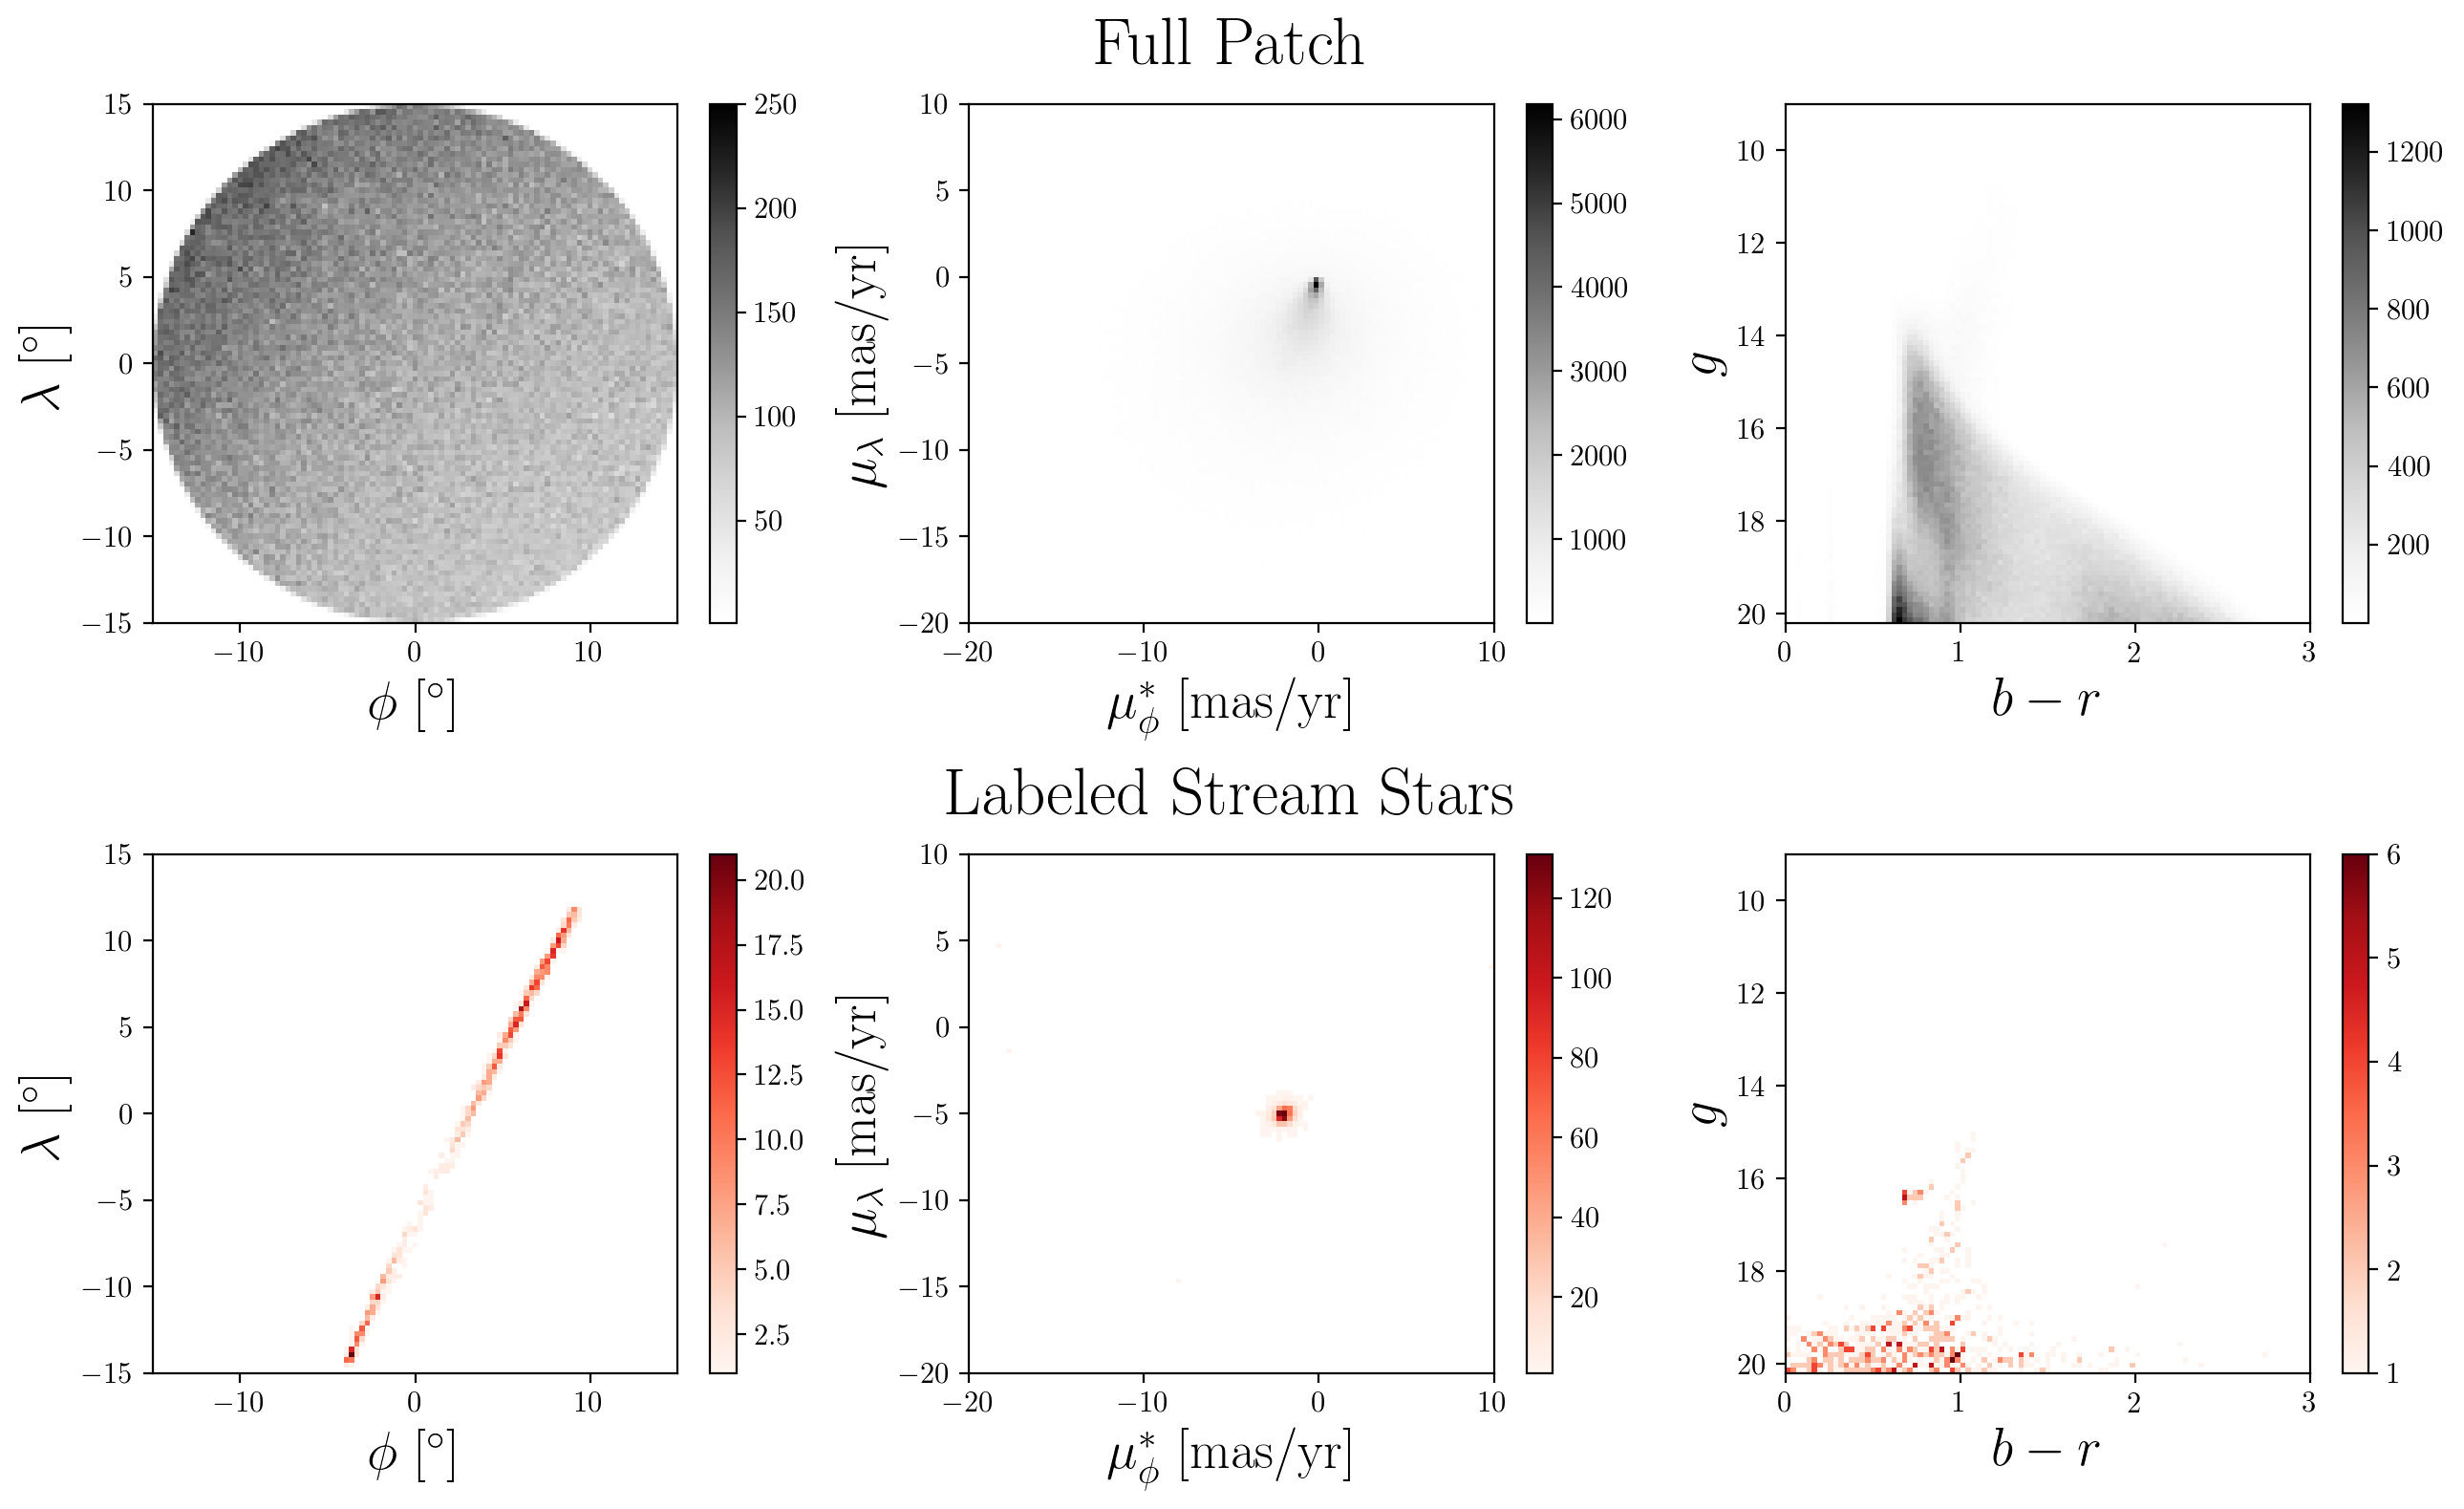

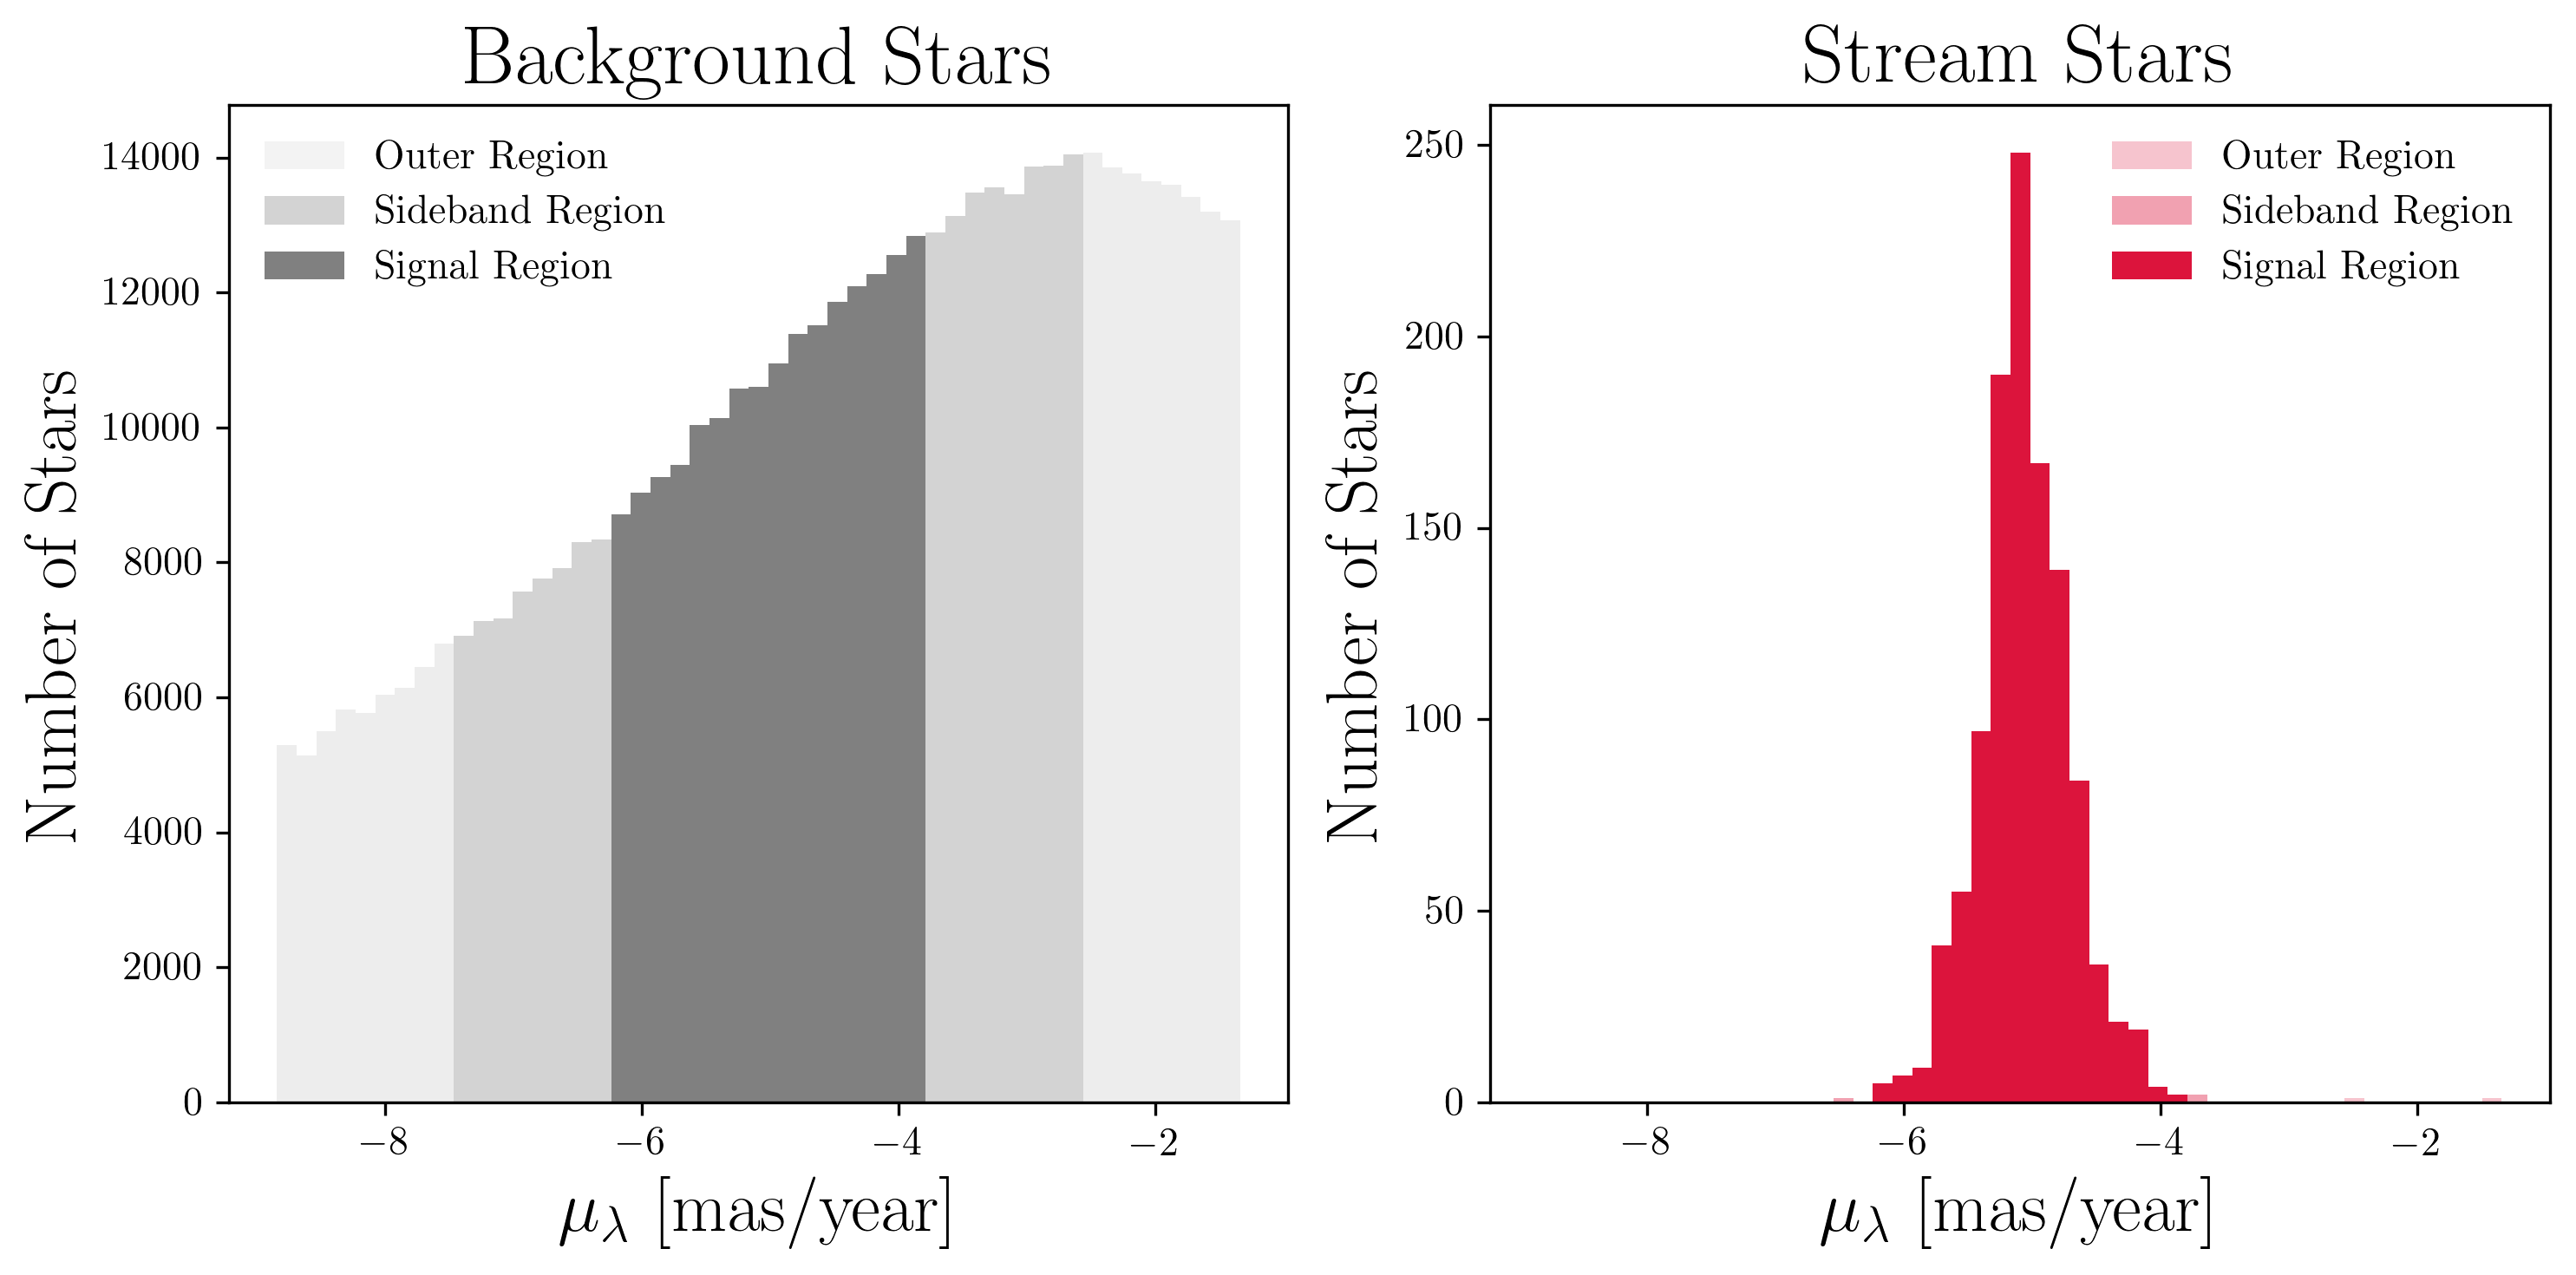

In [19]:
df = pd.read_hdf("../gaia_data/simulated_patch.h5")
make_plots(df, save_folder = save_folder)
df_slice = signal_sideband(df, save_folder = save_folder, sr_factor=0.25, sb_factor=0.5)

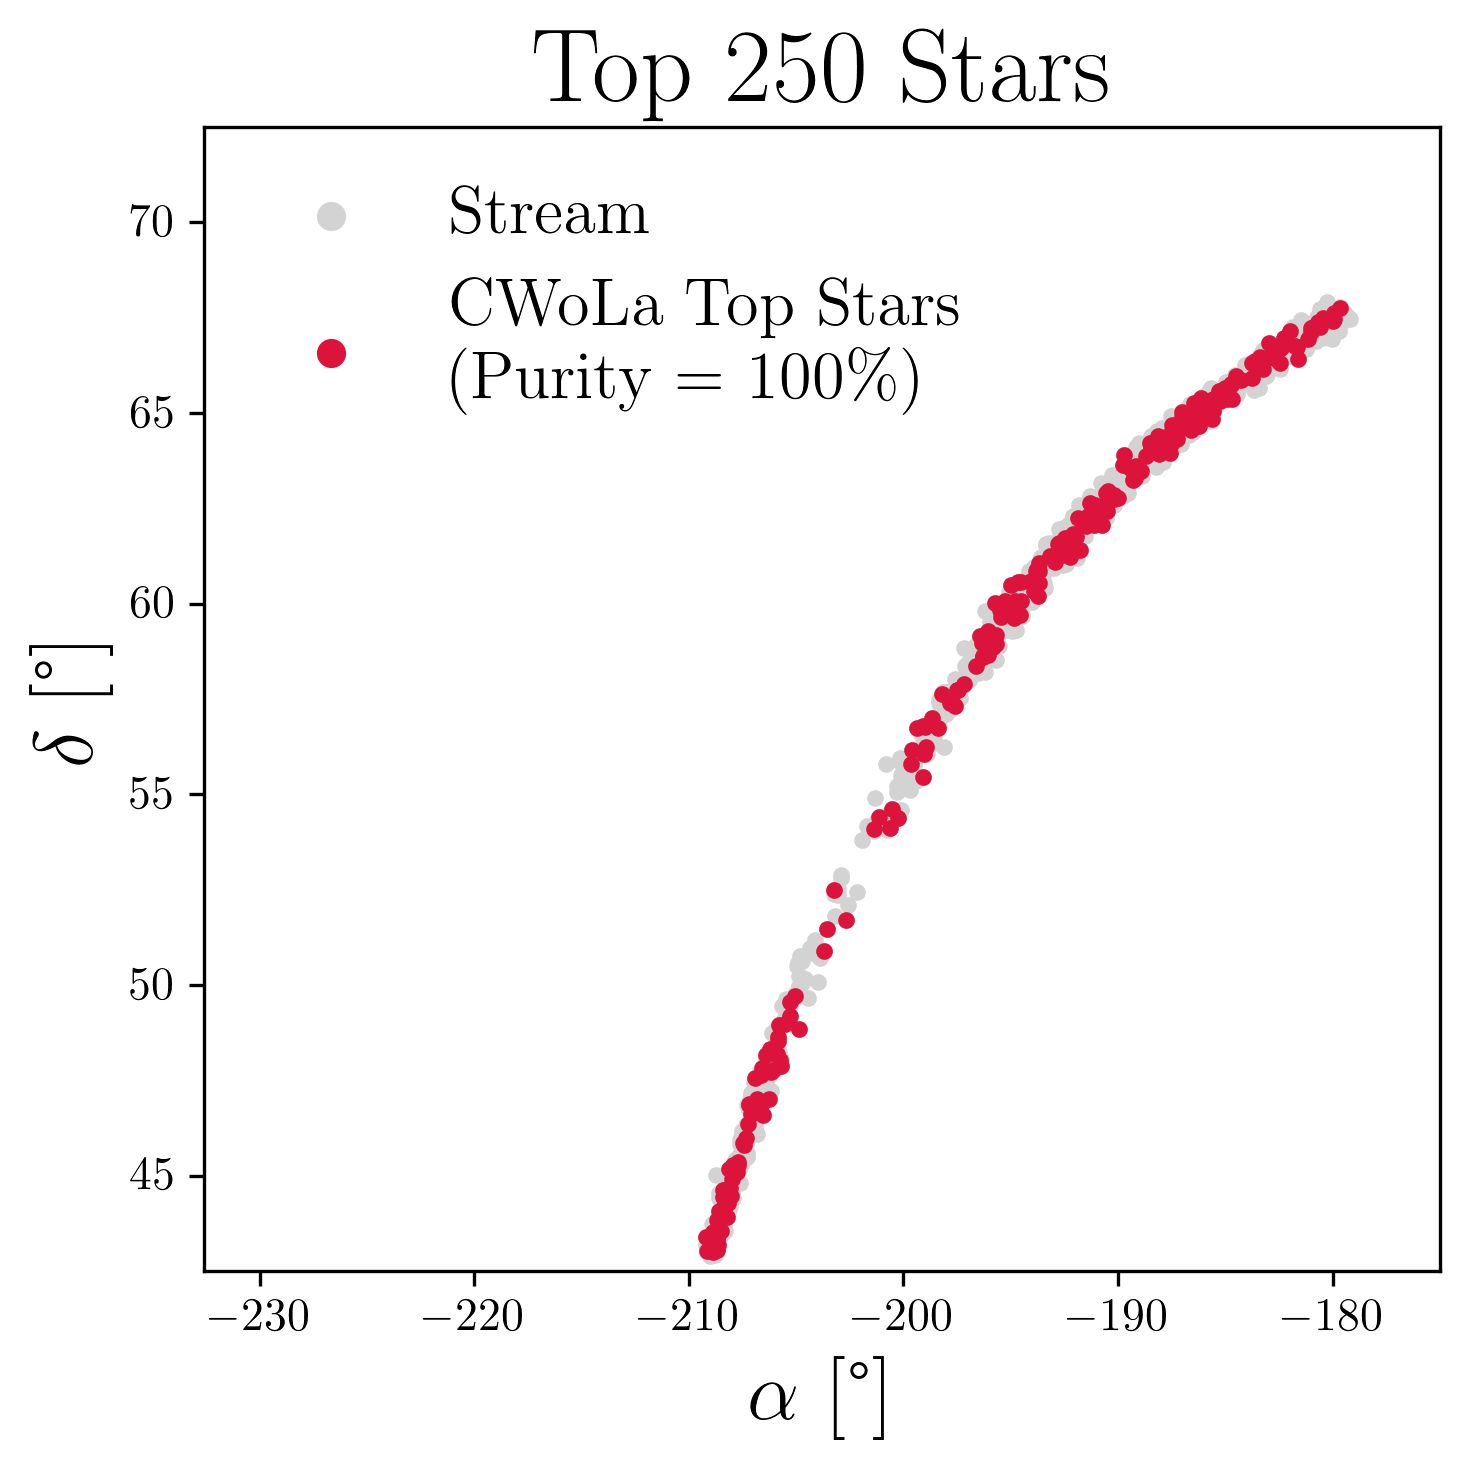

In [20]:
test = pd.read_hdf("../gaia_data/simulated_patch_cwola.h5")
n_top_stars = 250
top_stars = test.sort_values('nn_score',ascending=False)[:n_top_stars]
n_perfect_matches = top_stars.stream.value_counts()[True] 
n_perfect_matches/len(top_stars)*100

plt.figure(figsize=(5,5), dpi=300, tight_layout=True) 
plt.title('Top {} Stars'.format(n_top_stars), fontsize=25)
if "stream" in test.keys():
    stream_stars_in_test_set = test[test.stream == True]
    plt.scatter(stream_stars_in_test_set.α_wrapped - 360, stream_stars_in_test_set.δ, marker='.', 
            color = "lightgray",
            label='Stream')
    if True in top_stars.stream.unique(): 
        plt.scatter(top_stars[top_stars.stream].α_wrapped - 360, top_stars[top_stars.stream].δ, marker='.', 
                color = "crimson",
                label="CWoLa Top Stars\n(Purity = {:.0f}\%)".format(n_perfect_matches/len(top_stars)*100))
else:
    plt.scatter(top_stars.α_wrapped - 360, top_stars.δ, marker='.', 
            color = "crimson",
            label="CWoLa Top Stars") 
plt.legend(loc='upper left', markerscale=2, frameon=False, fontsize=16)
plt.xlim(test.α_wrapped.min() - 360,test.α_wrapped.max()- 360)
plt.ylim(test.δ.min(),test.δ.max())
plt.xlabel(r"$\alpha$ [\textdegree]", fontsize=20)
plt.ylabel(r"$\delta$ [\textdegree]", fontsize=20)
plt.savefig(os.path.join(save_folder,"simulated_top_250.pdf"))

### Summarize performance across 100 streams:

In [21]:
df_all = pd.read_hdf("../gaia_data/simulated_100_patches.h5")
n_top_stars = 250
mock_purities = []

for i in tqdm(df_all.file.unique()):
    df = df_all[df_all.file == i]
    top_stars = df.sort_values('nn_score',ascending=False)[:n_top_stars]
    try: 
        n_perfect_matches = top_stars.stream.value_counts()[True] 
    except:
        n_perfect_matches = 0
    purity = n_perfect_matches/len(top_stars)*100
    mock_purities.append(purity)

100%|██████████| 100/100 [00:05<00:00, 16.77it/s]


In [22]:
first_pass_purities = [98, 94, 96, 100, 0, 98, 36, 82, 40, 0, 100, 0, 86, 0, 98, 74, 100, 0, 0, 70, 86, 86, 0, 100, 0, 92, 10, 0, 12, 10, 86, 0, 0, 0, 94, 96, 56, 44, 42, 64, 100, 82, 56, 0, 96, 98, 100, 90, 100, 88, 100, 88, 34, 94, 100, 10, 82, 0, 66, 86, 100, 0, 78, 57, 2, 98, 100, 72, 0, 14, 0, 0, 14, 56, 48, 100, 0, 4, 70, 14, 84, 76, 0, 54, 6, 88, 74, 44, 84, 82, 88, 98, 8, 100, 78, 0, 2, 0, 0, 0,]
print("After one pass:")
print("{:.0f}% of simulated streams are found with a nonzero purity.".format(
    len([purity for purity in first_pass_purities if purity > 0])))
print("Of these, {:.0f}% are found with purity > 50%.".format(
    100*len([purity for purity in first_pass_purities if purity > 50])/len([purity for purity in first_pass_purities if purity > 0])))
print("The median stream purity is {:.0f}%.\n".format(np.median(first_pass_purities)))

print("After two passes:")
print("{:.0f}% of simulated streams are found with a nonzero purity.".format(
    len([purity for purity in mock_purities if purity > 0])))
print("Of these, {:.0f}% are found with purity > 50%.".format(
    100*len([purity for purity in mock_purities if purity > 50])/len([purity for purity in mock_purities if purity > 0])))
print("The median stream purity is {:.0f}%.".format(np.median(mock_purities)))

After one pass:
76% of simulated streams are found with a nonzero purity.
Of these, 75% are found with purity > 50%.
The median stream purity is 68%.

After two passes:
96% of simulated streams are found with a nonzero purity.
Of these, 69% are found with purity > 50%.
The median stream purity is 86%.


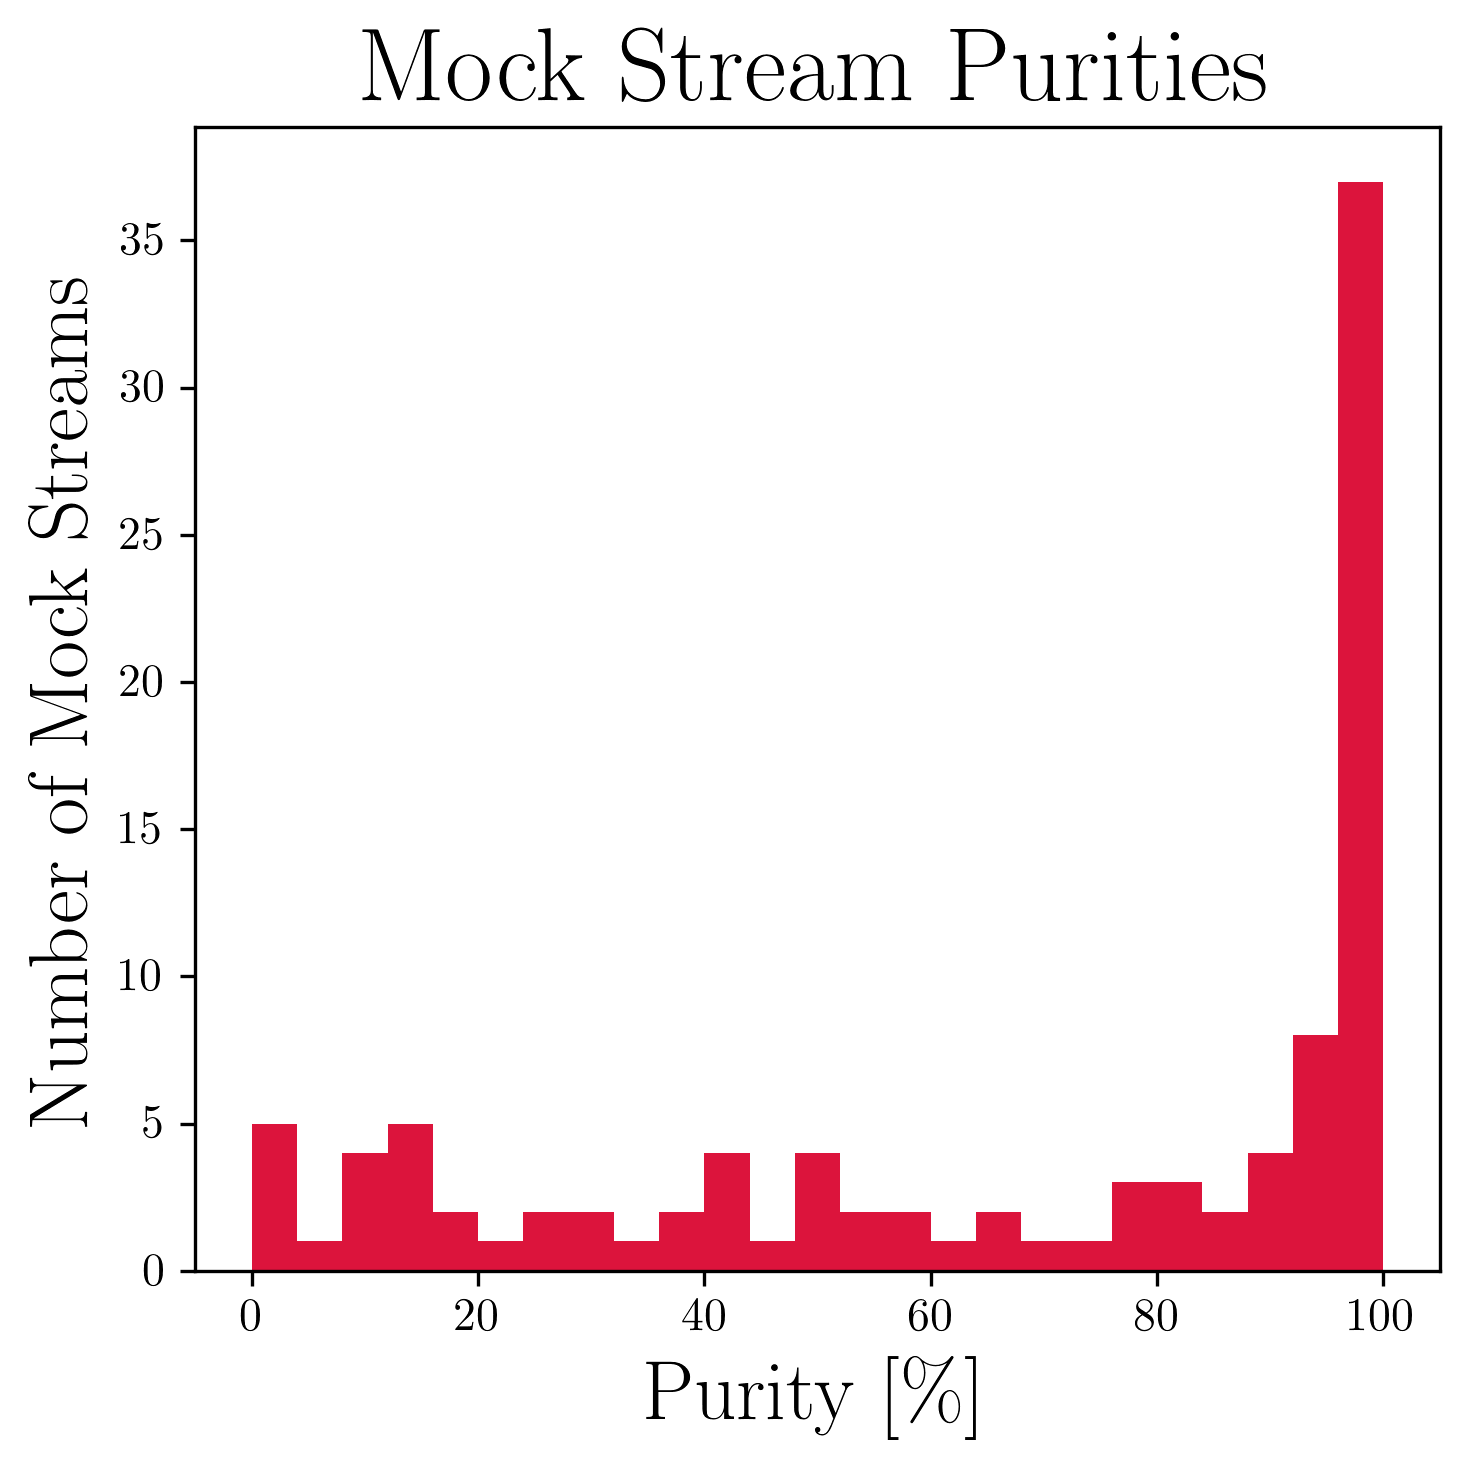

In [23]:
plt.figure(dpi=300, figsize=(5,5), tight_layout=True)
plt.hist(mock_purities, bins=25, color='crimson')
plt.xlabel("Purity [\%]", fontsize=20);
plt.ylabel("Number of Mock Streams", fontsize=20)
plt.title("Mock Stream Purities", fontsize=25);
plt.savefig(os.path.join(save_folder,'simulated_purities_hist.pdf'))